In [35]:
import numpy as np
import pandas as pd
import qspems
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("~/Data/dj_health_data.csv")
# Encode days of the week as integers
df = df.replace(
    {
        "Monday": 1,
        "Tuesday": 2,
        "Wednesday": 3,
        "Thursday": 4,
        "Thurday": 4,
        "Friday": 5,
        "Saturday": 6,
        "Sunday": 7
    }
)

df = df.astype('float')

In [60]:
# This doesn't work. Raises "LinAlgError: SVD did not converge"
# qspems.inf_via_LCCF(df.values.T, 10, max_lag=10)

In [61]:
df.corr().style.background_gradient(cmap='coolwarm')

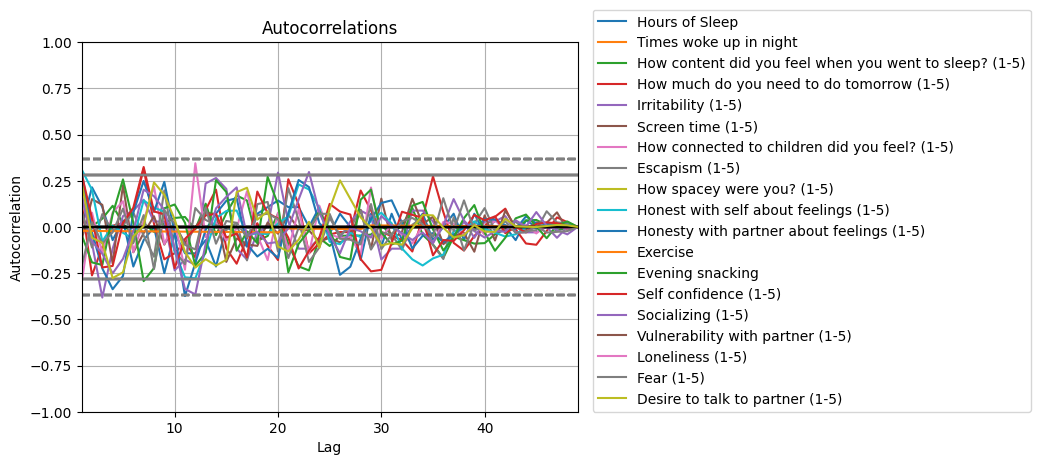

In [62]:
for c in df.columns:
    if c not in ["Day", "Day of Week"]:
        pd.plotting.autocorrelation_plot(df.loc[:, c], label=c)
    
    
plt.title(f"Autocorrelations")
plt.legend(loc=(1.03, 0.))

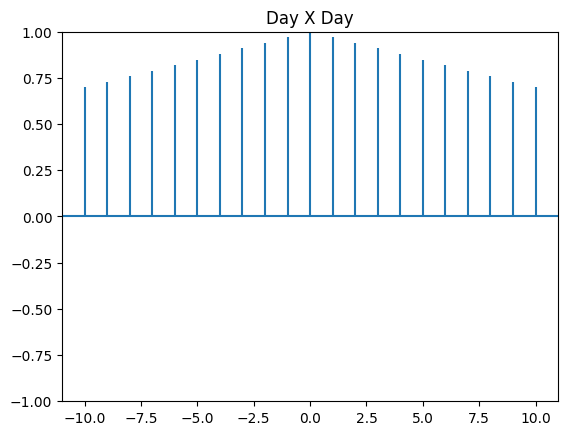

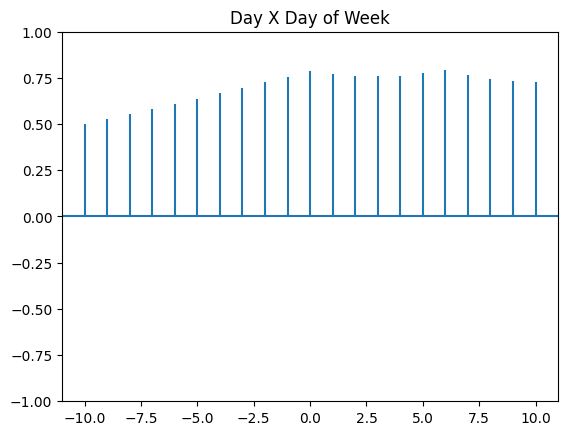

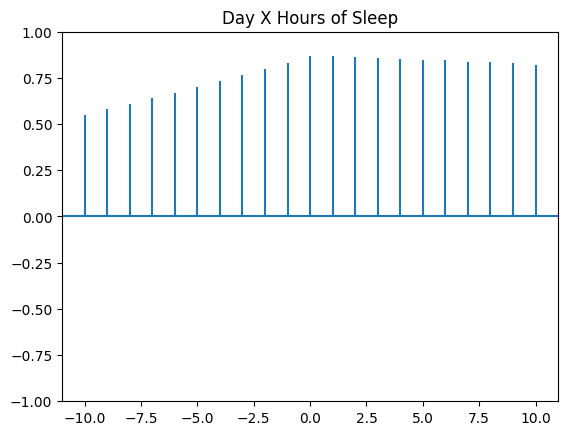

/Users/djpassey/Projects/ModelingNetworkedDynamics/net_dyn_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


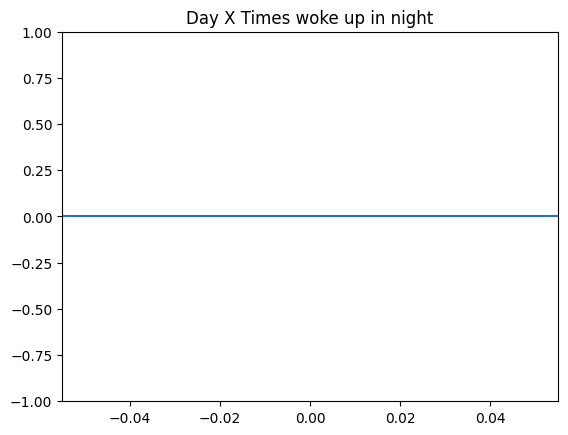

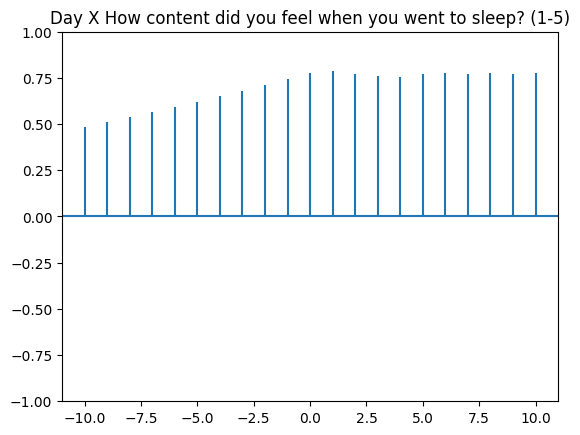

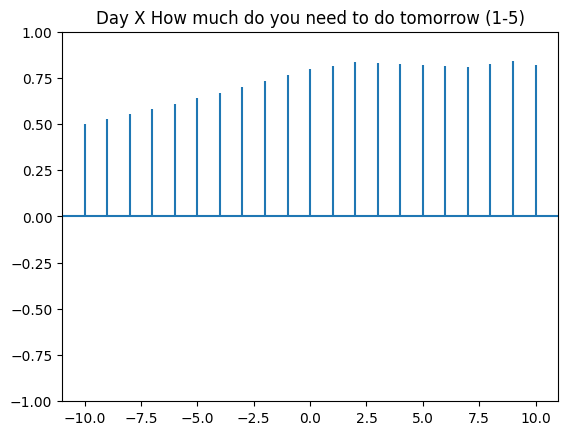

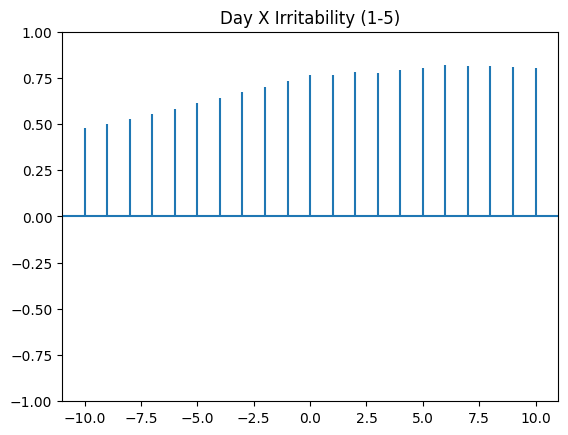

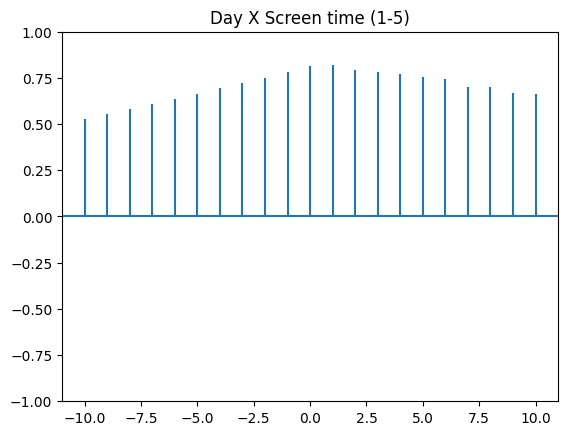

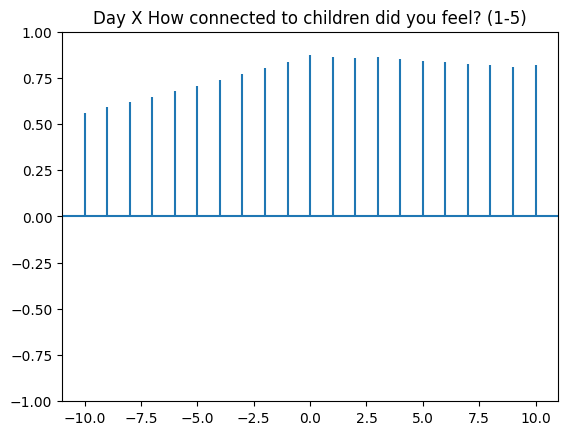

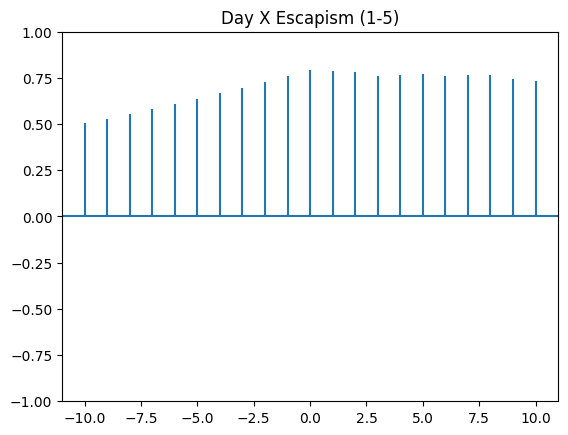

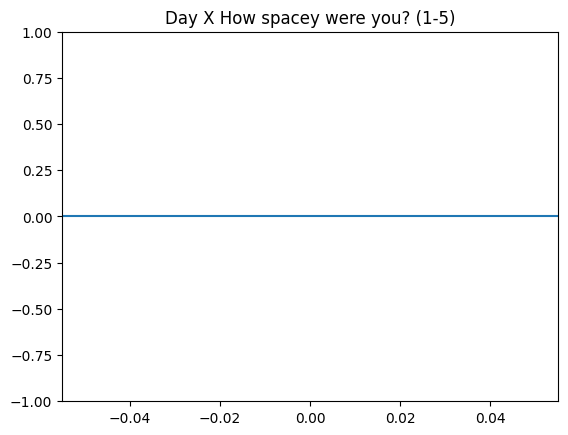

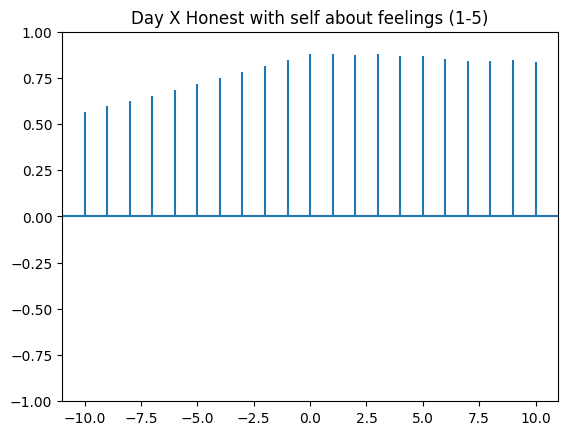

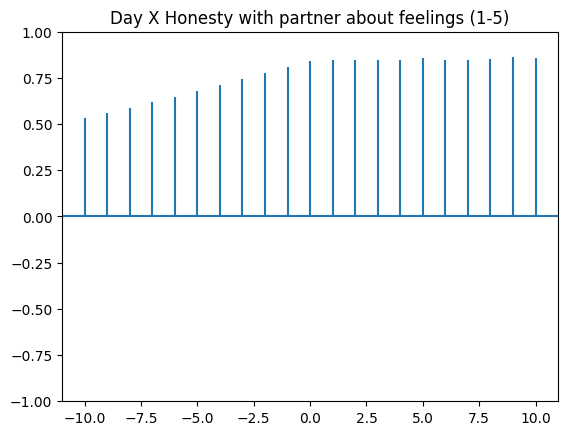

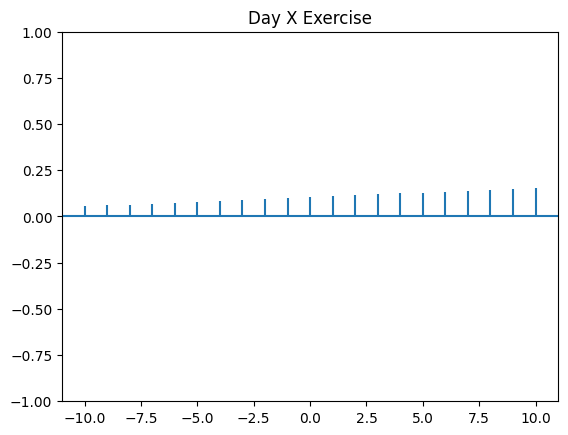

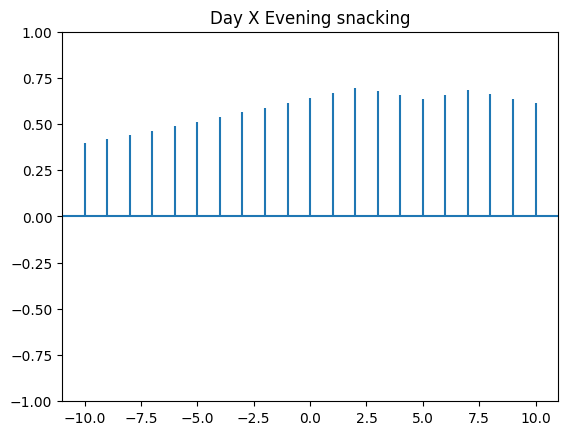

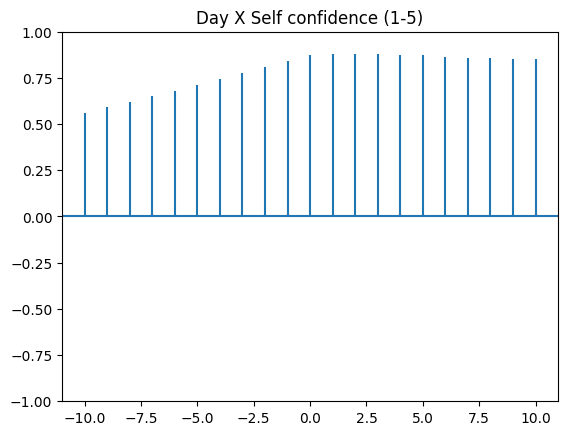

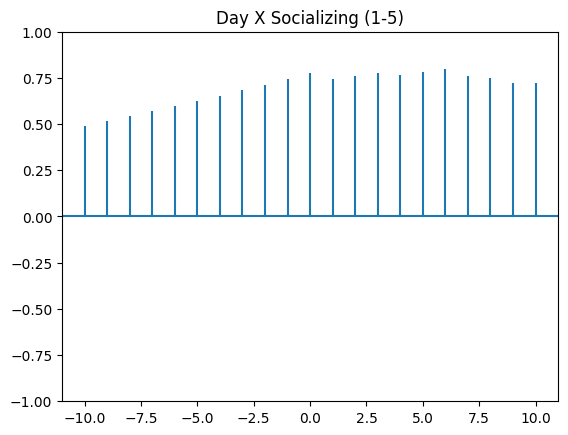

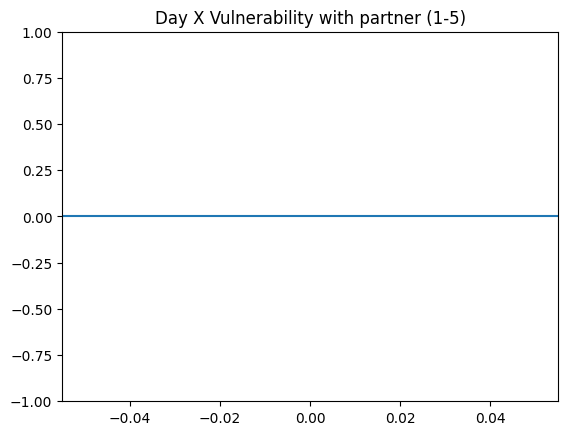

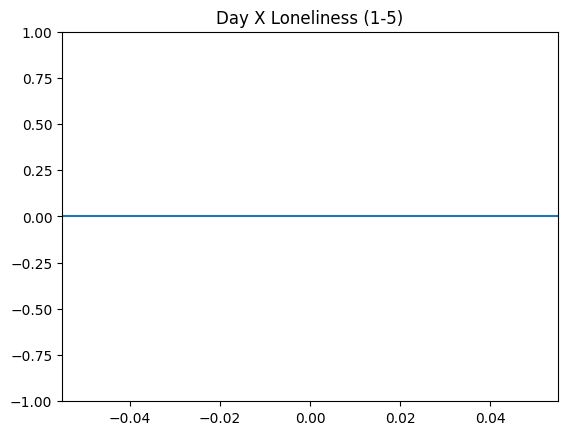

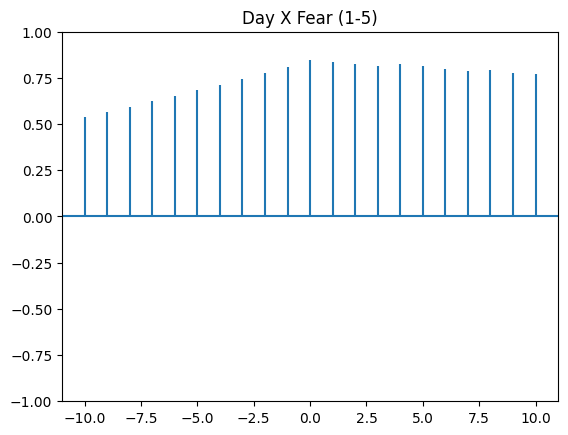

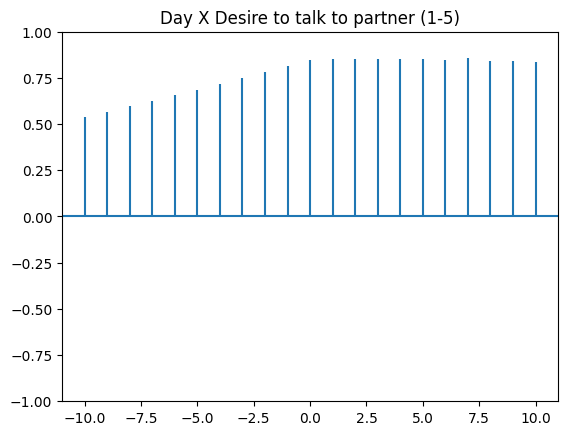

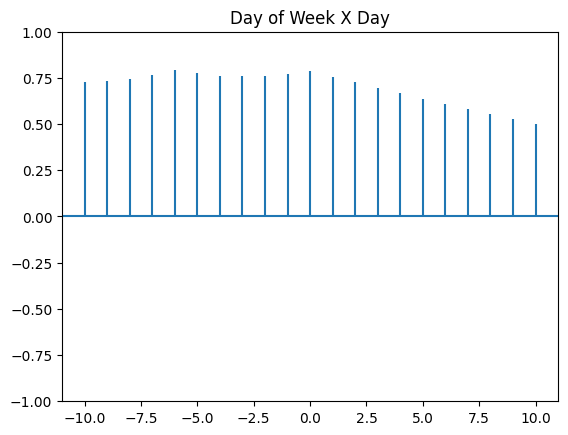

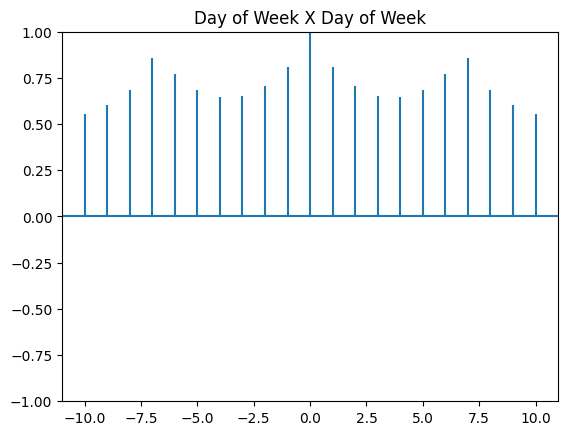

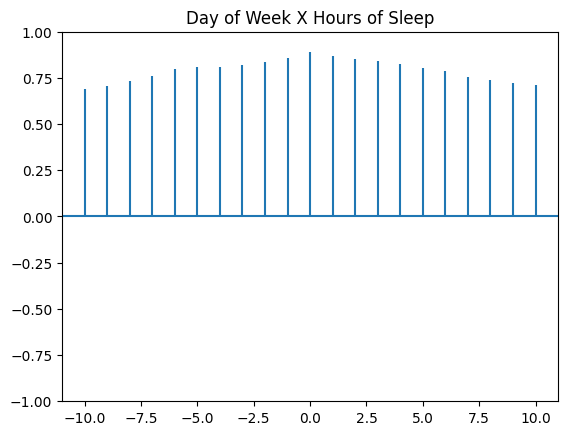

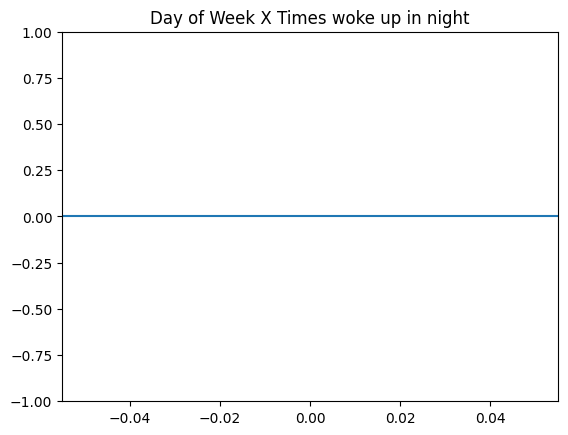

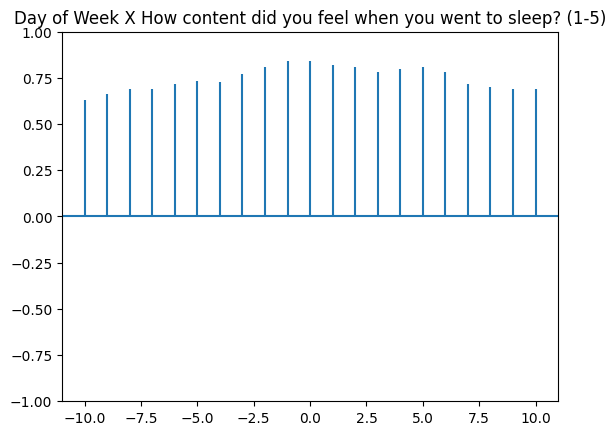

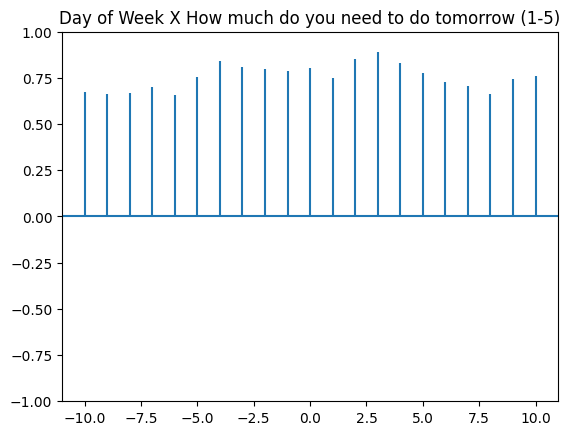

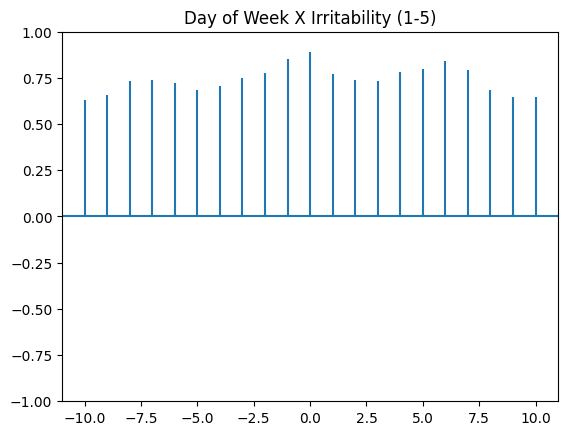

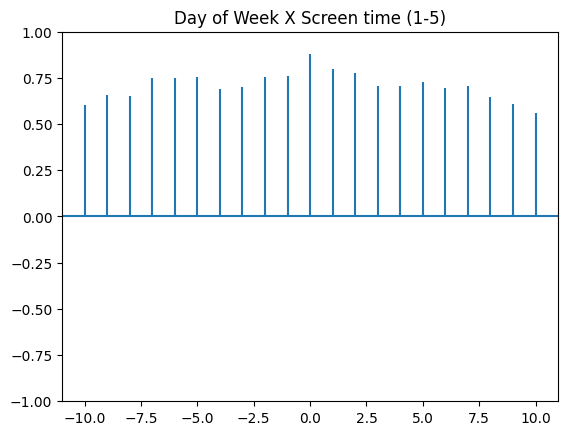

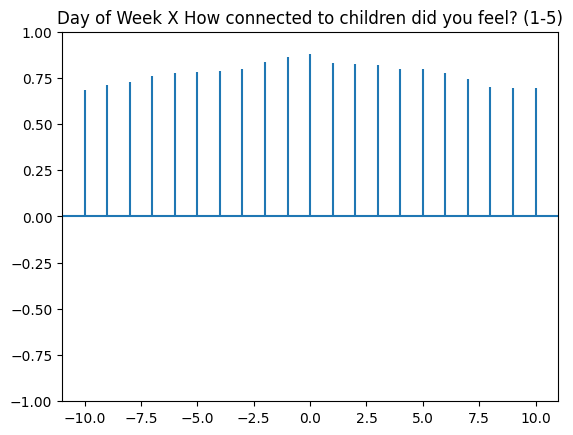

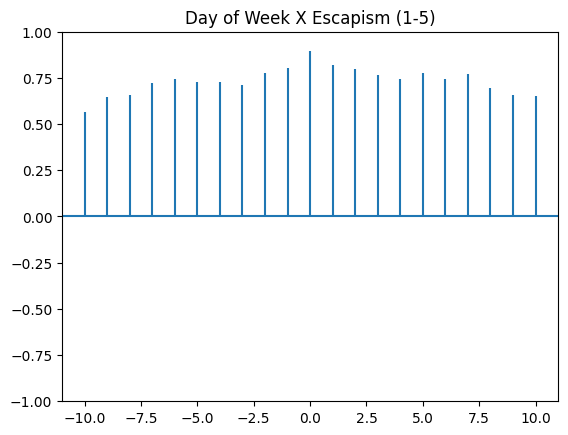

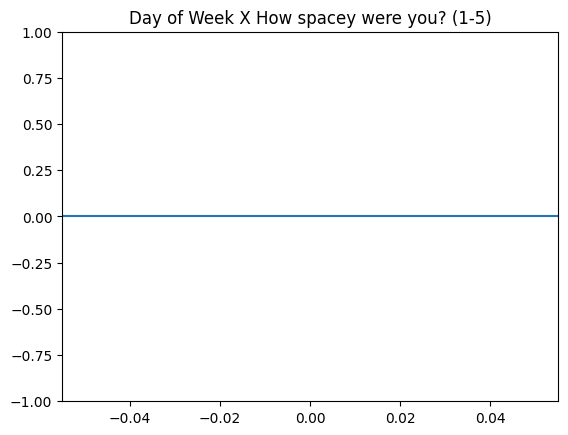

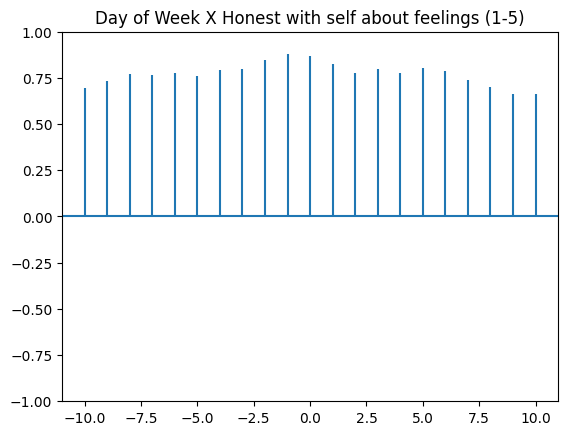

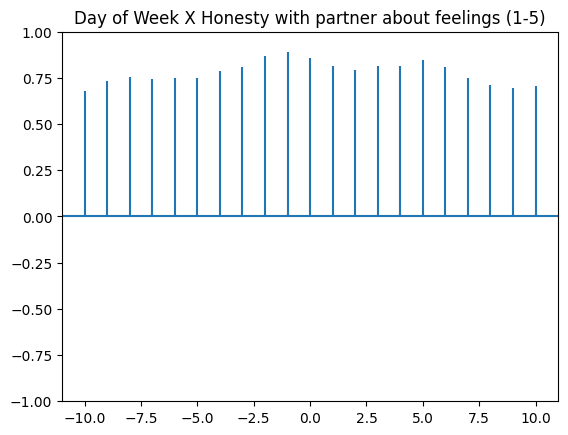

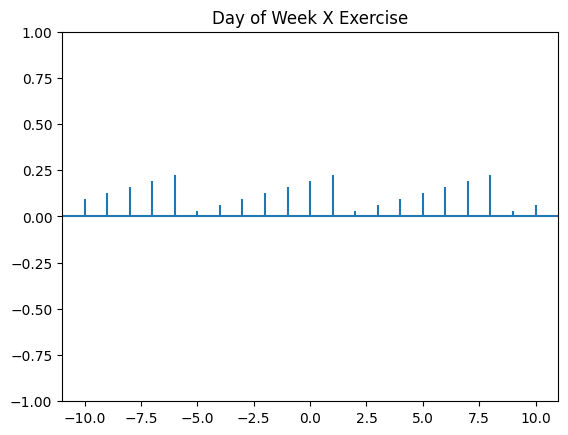

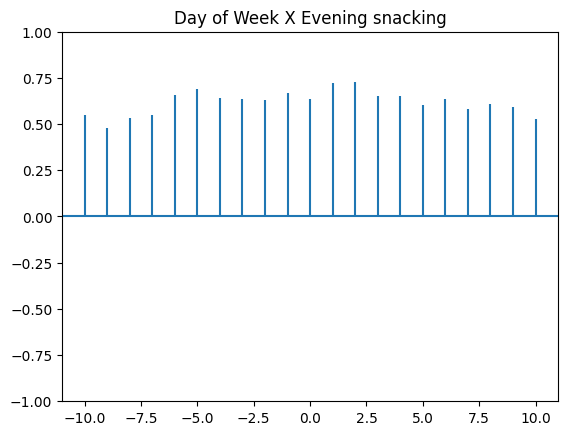

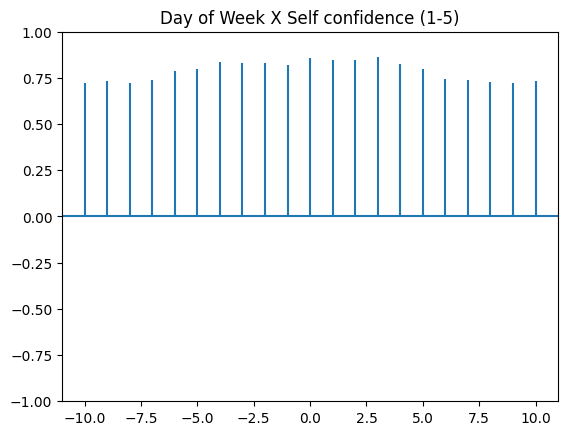

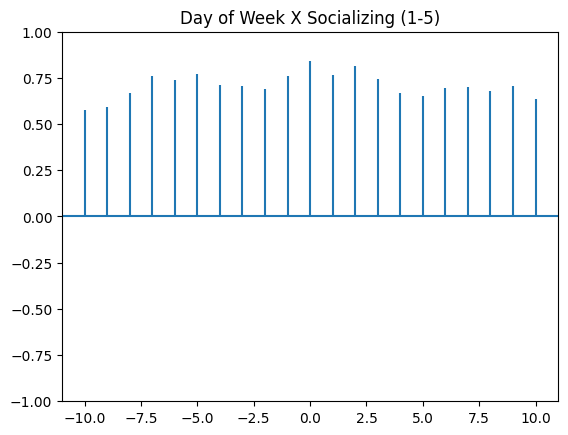

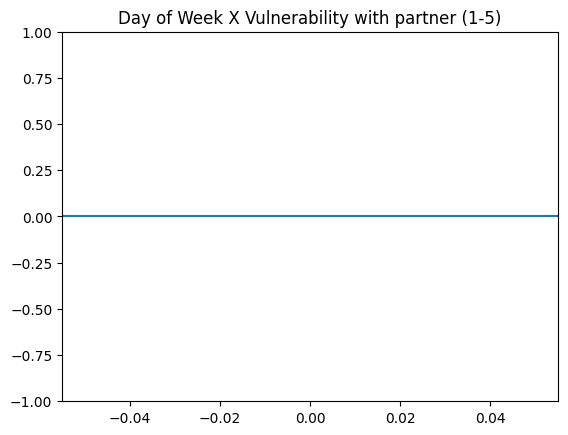

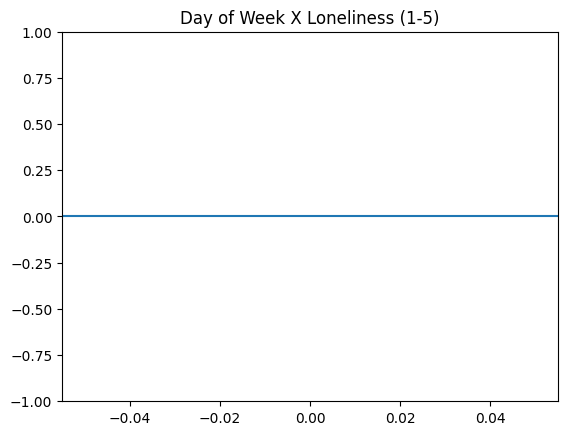

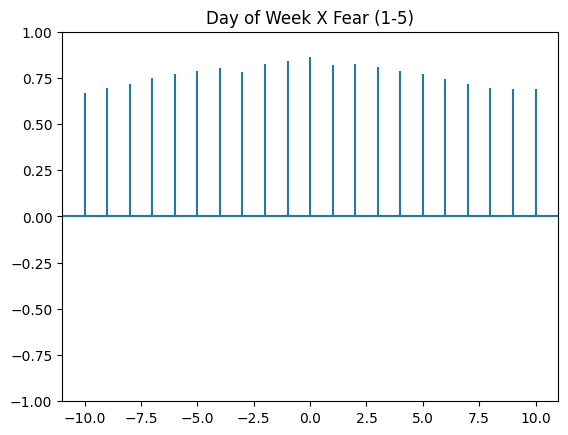

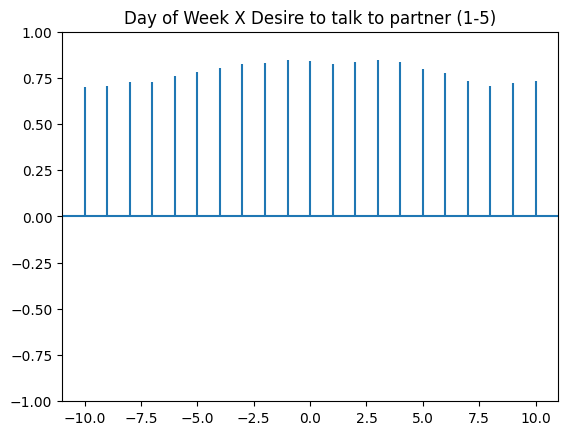

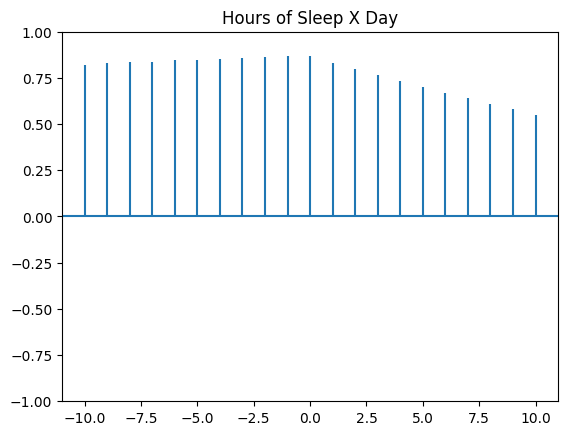

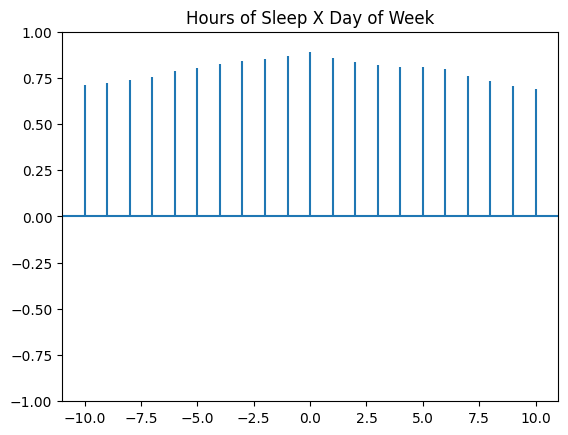

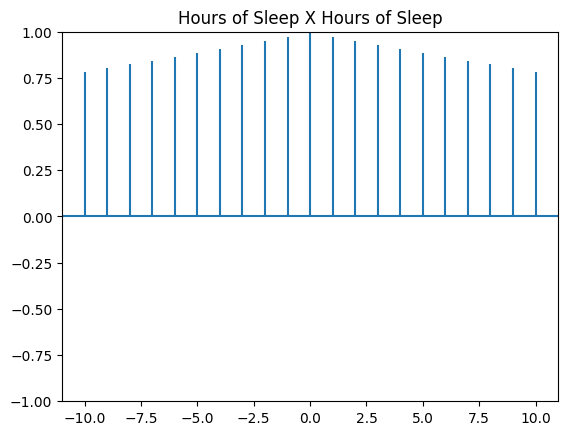

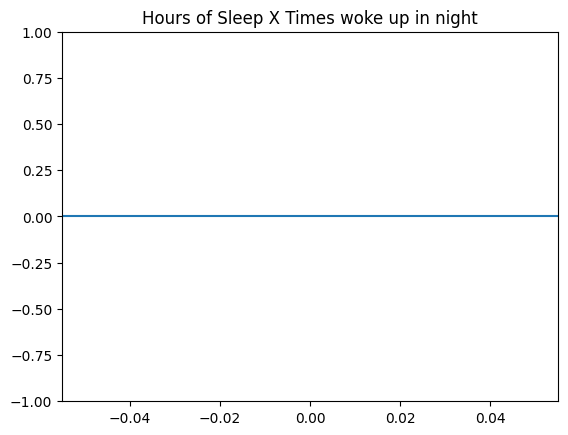

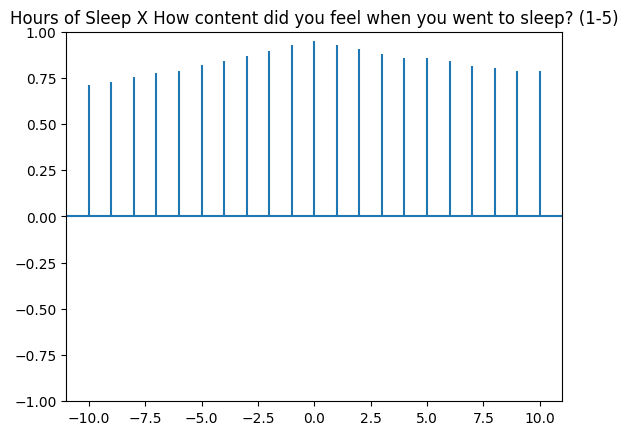

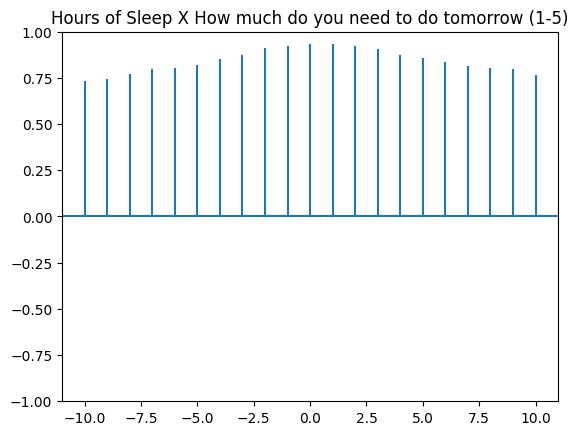

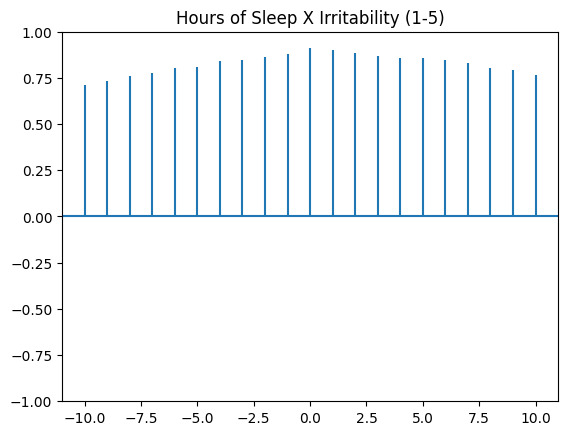

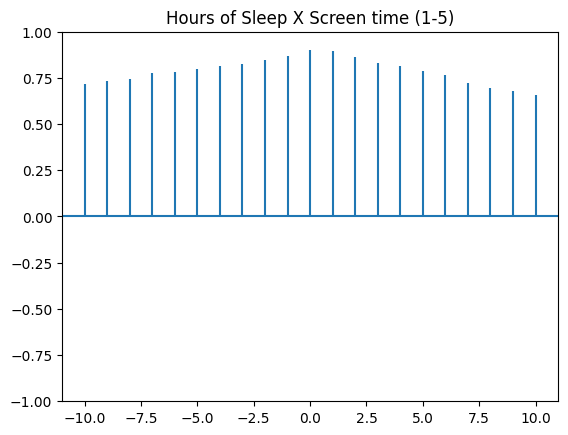

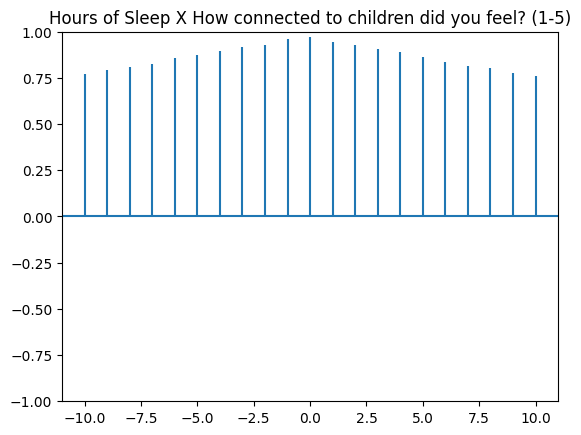

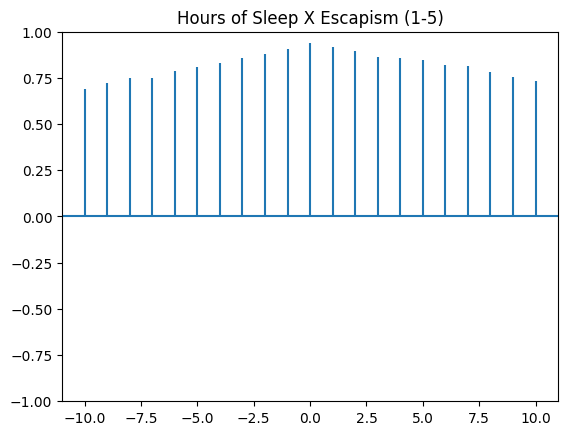

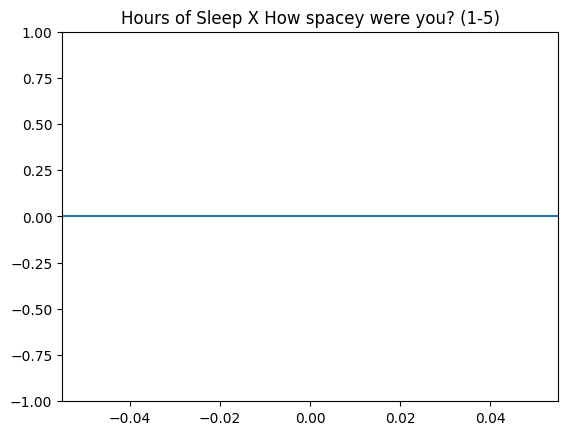

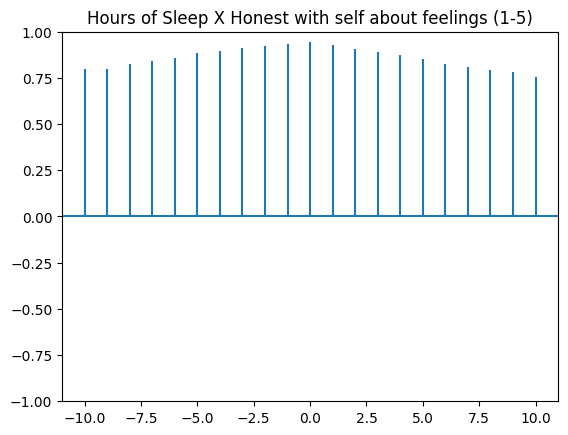

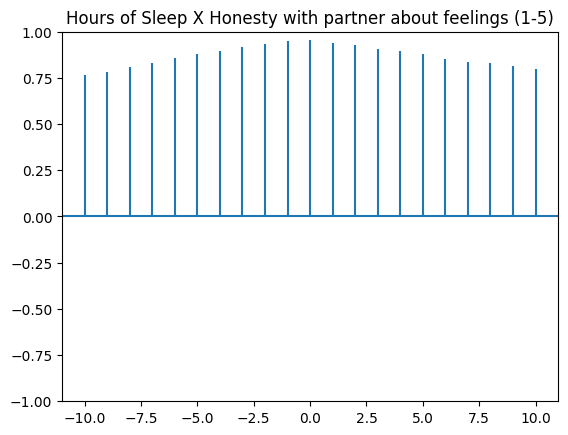

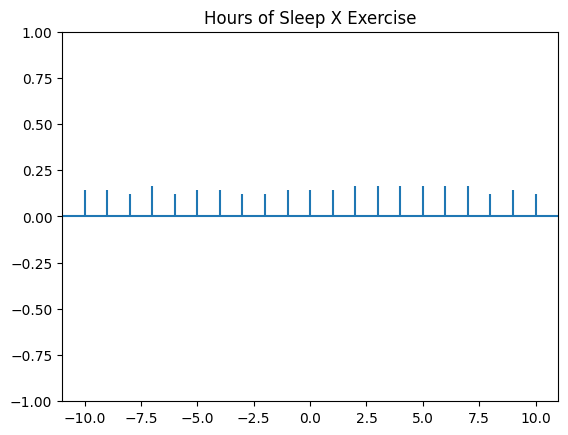

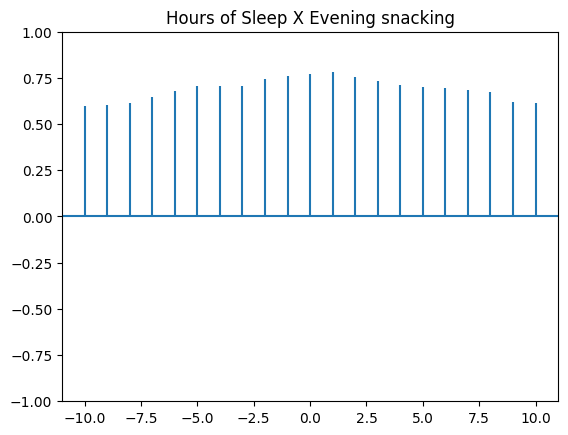

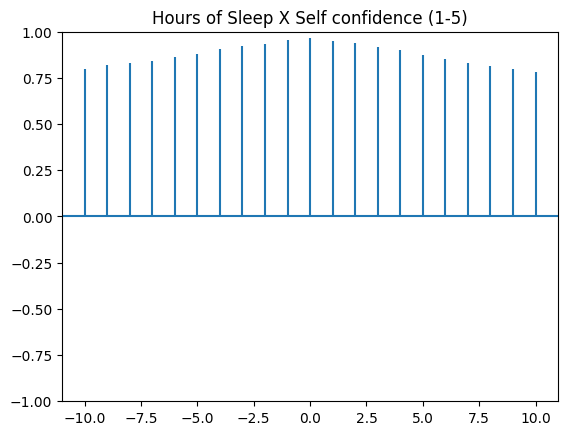

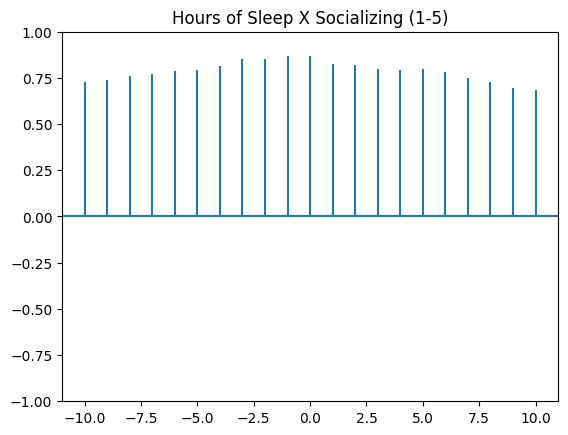

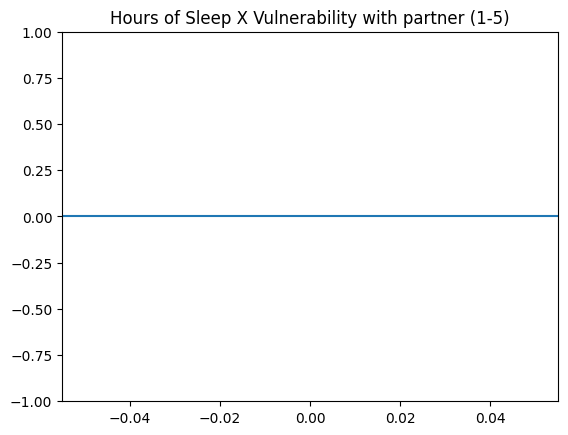

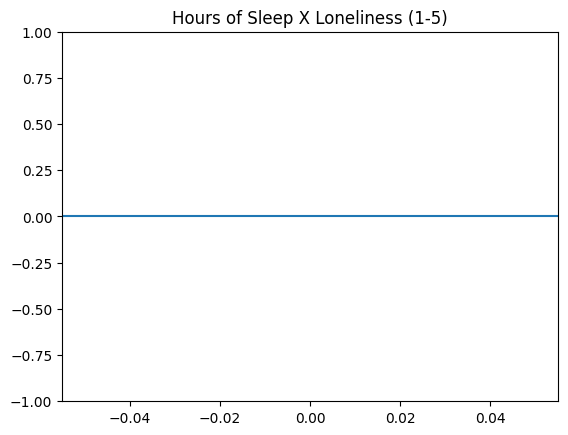

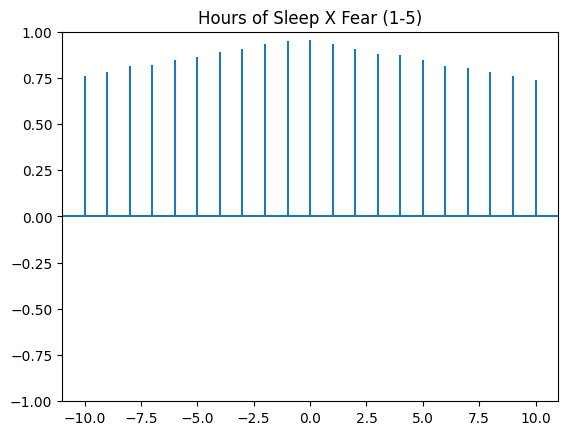

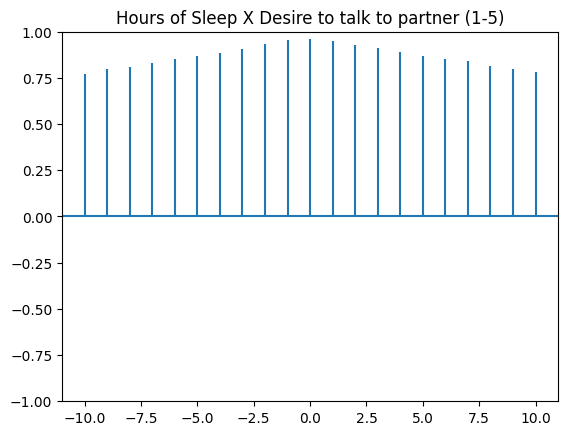

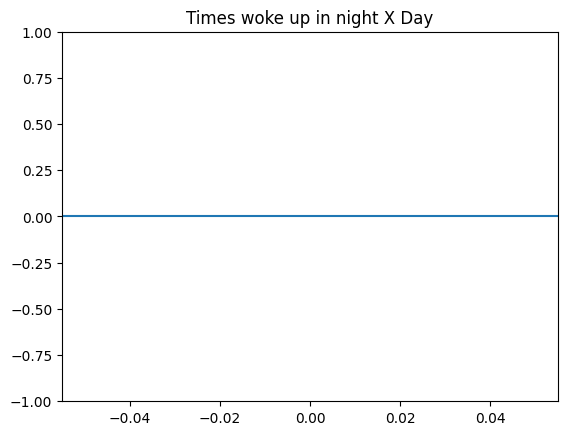

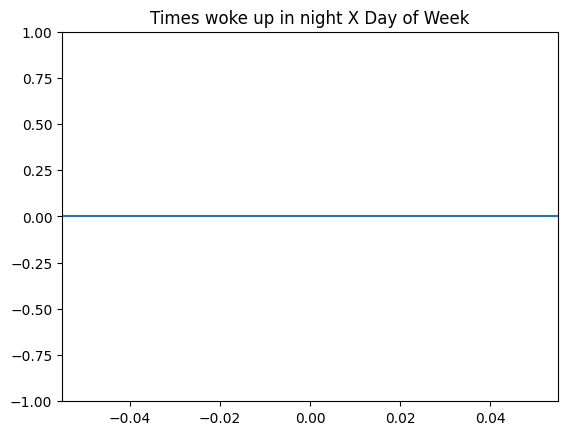

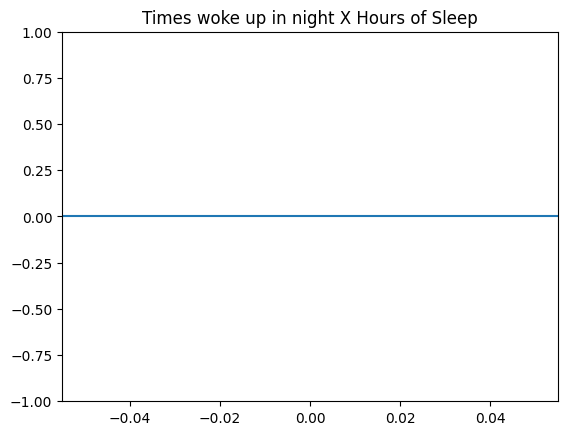

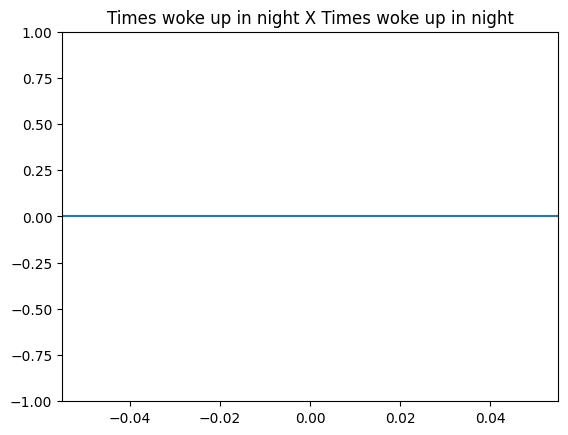

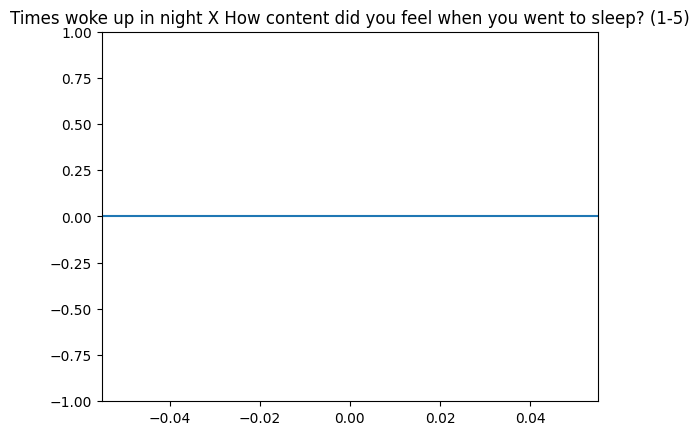

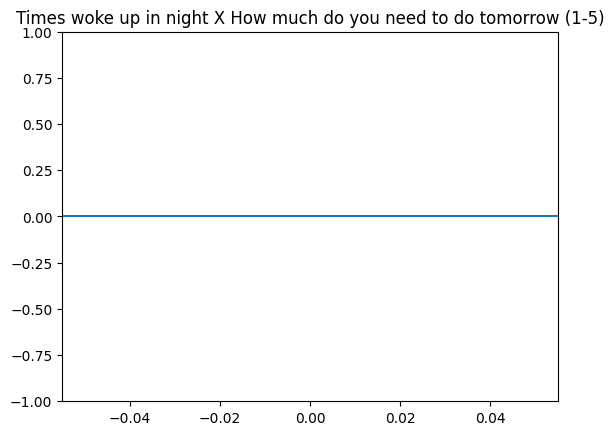

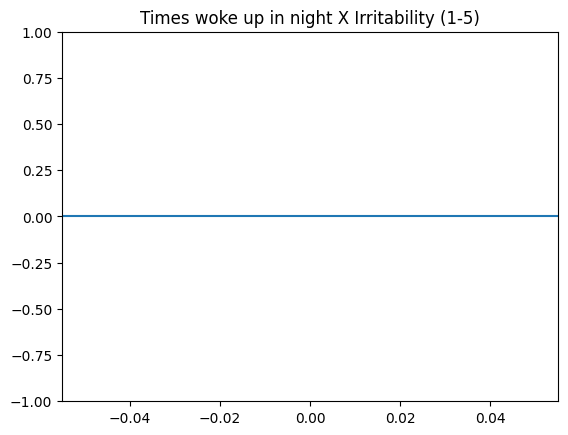

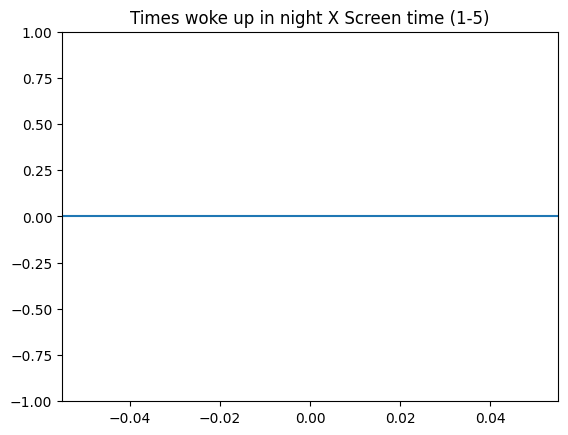

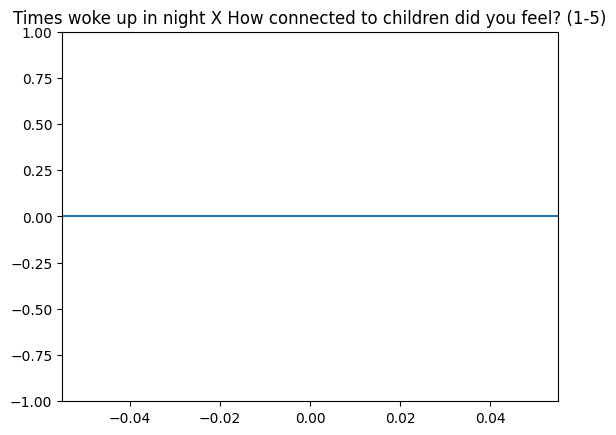

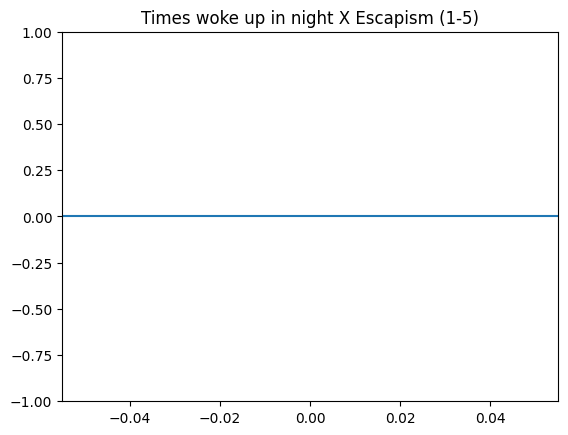

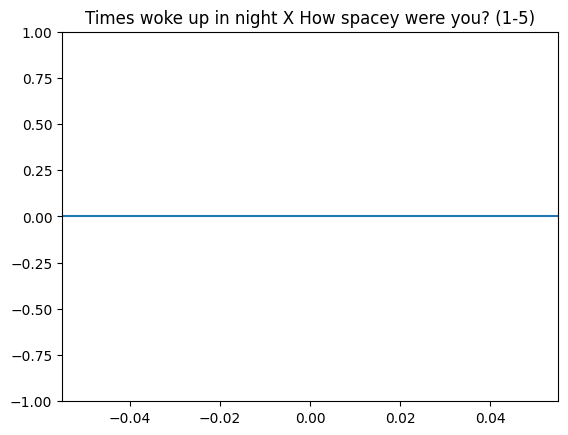

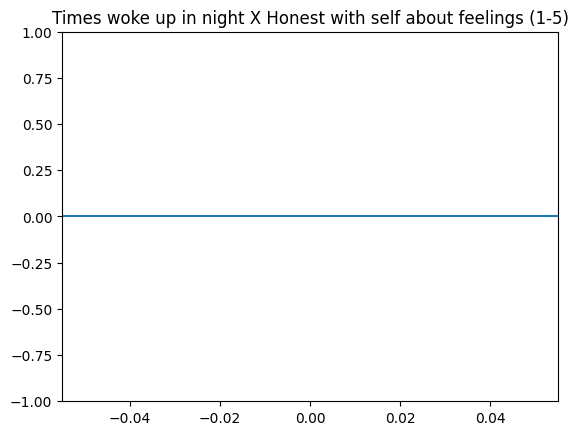

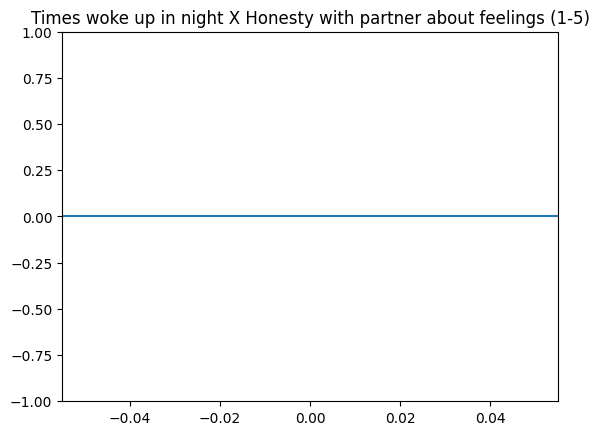

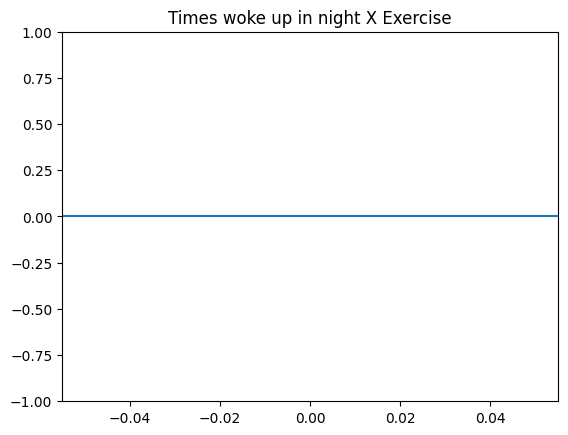

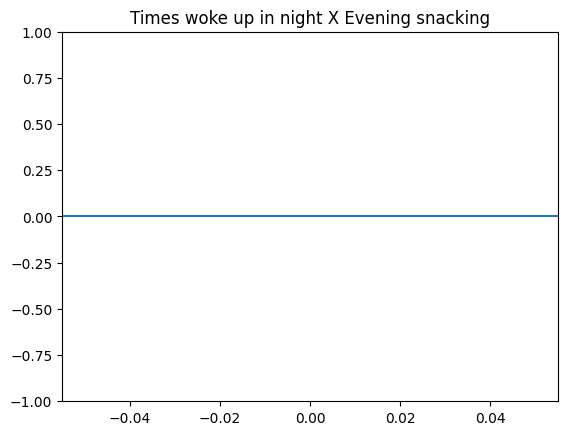

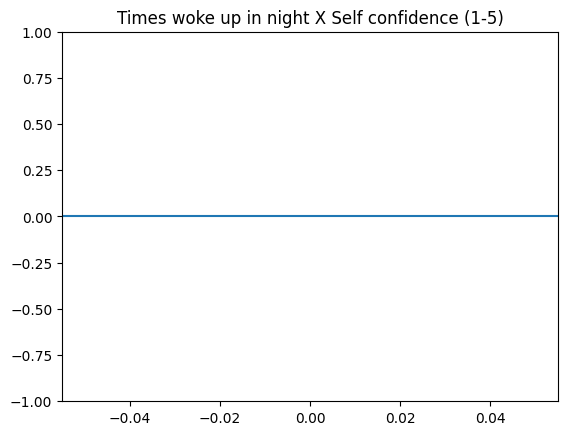

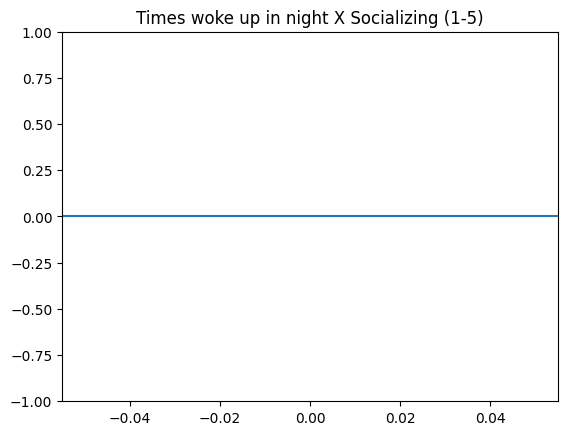

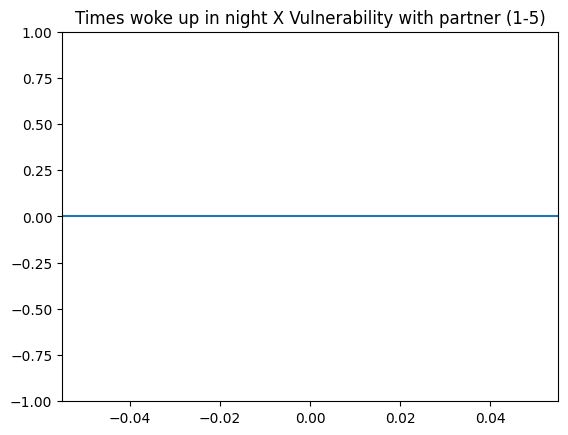

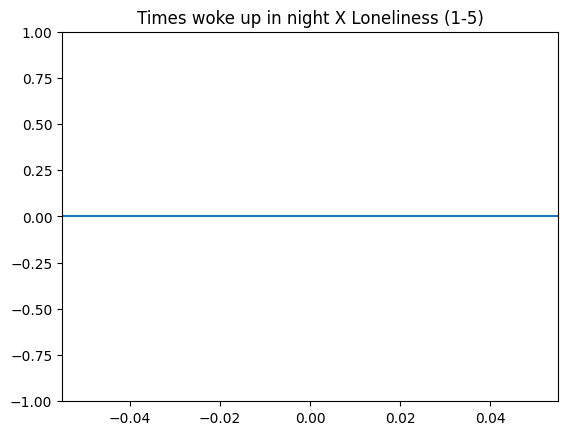

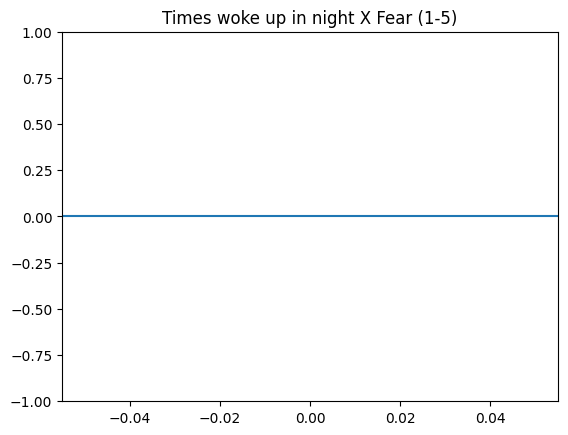

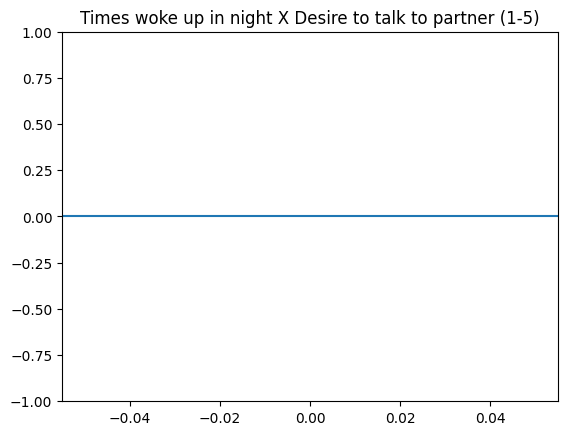

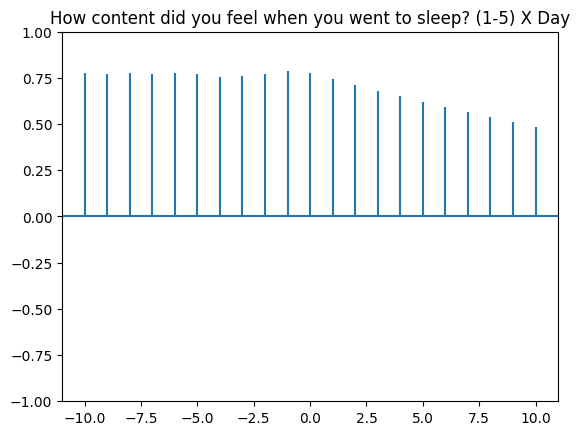

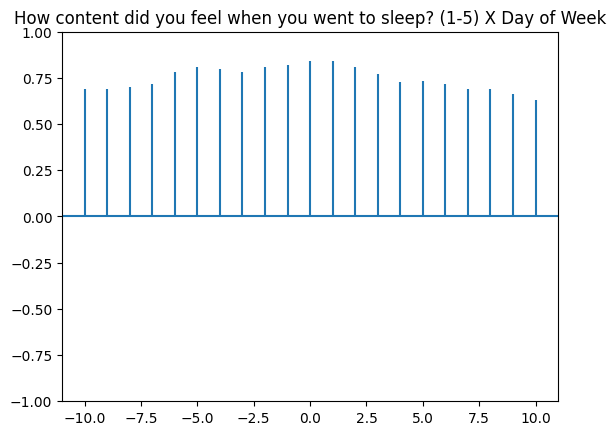

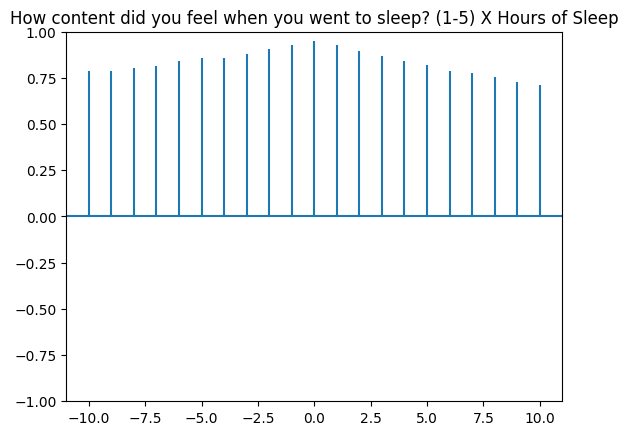

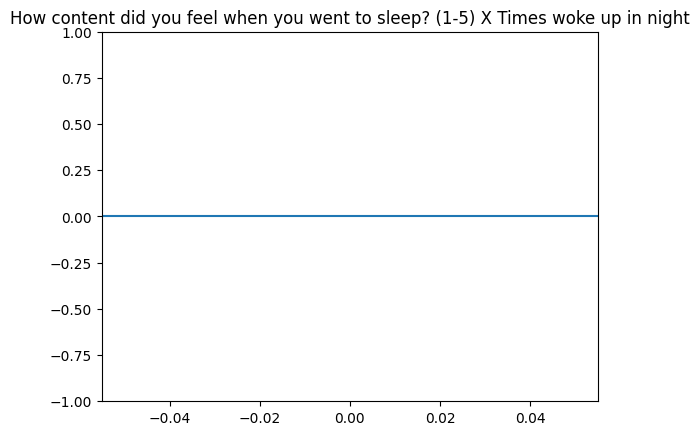

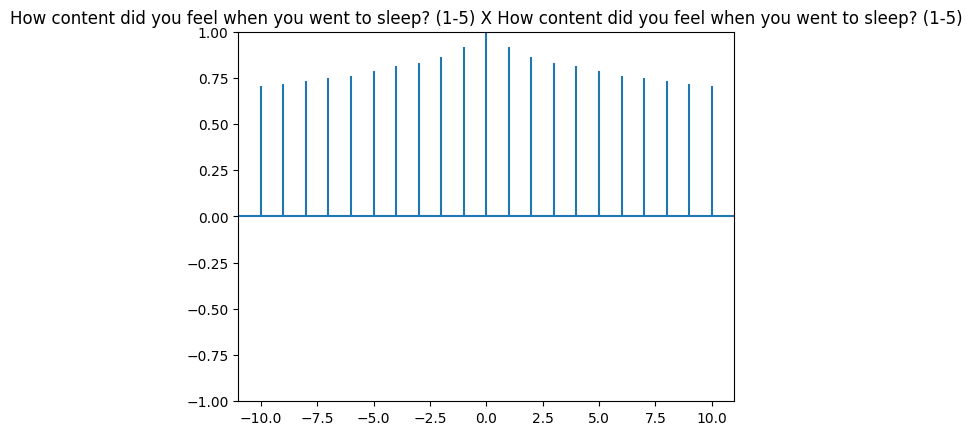

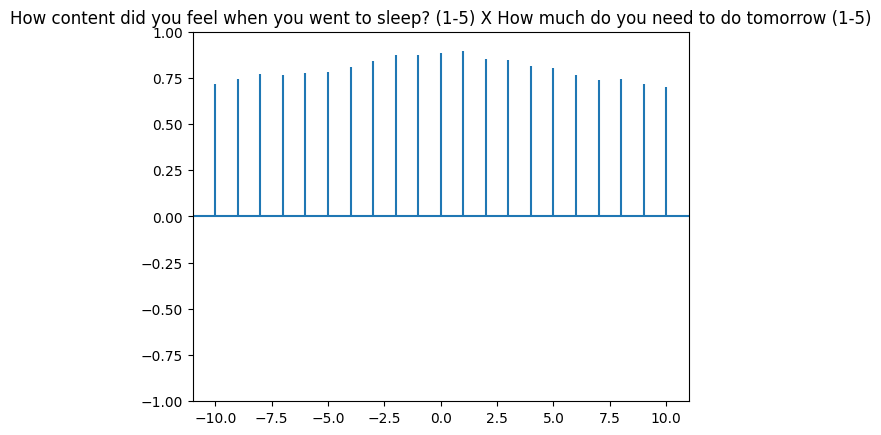

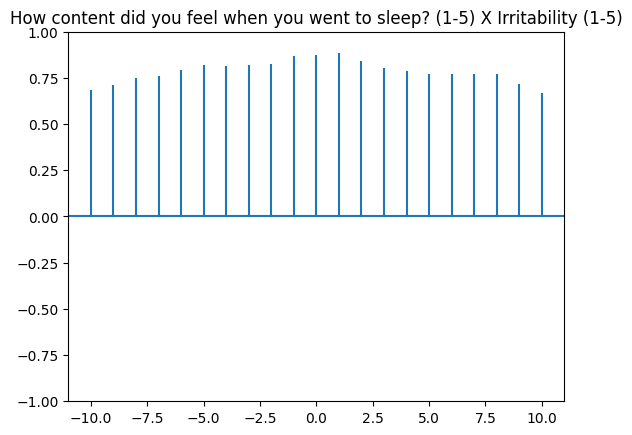

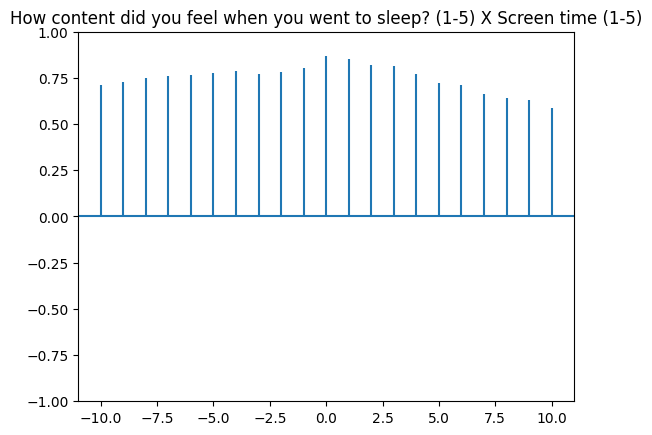

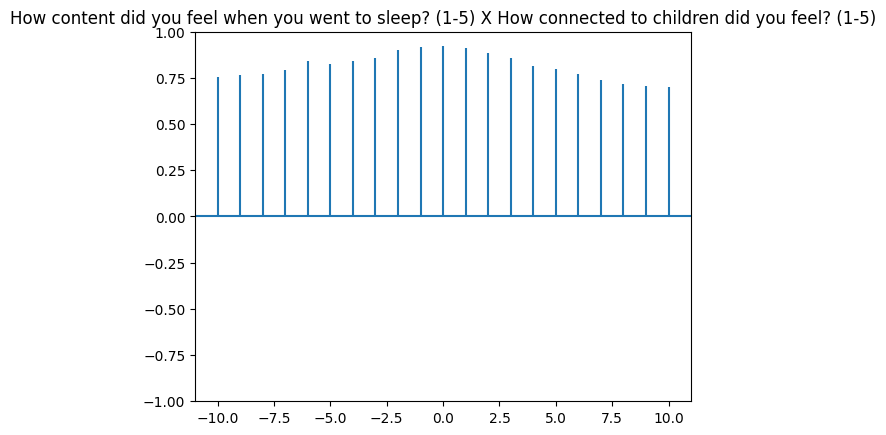

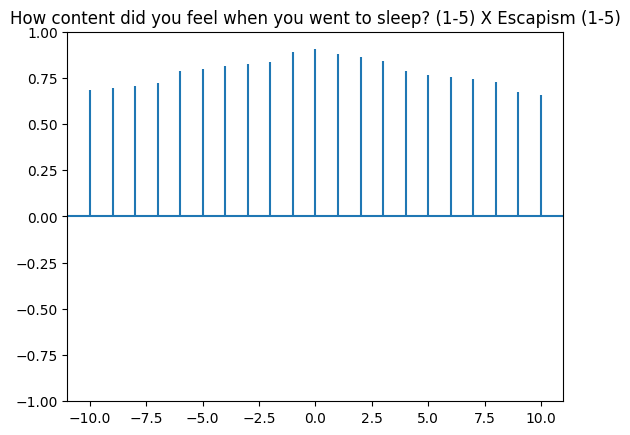

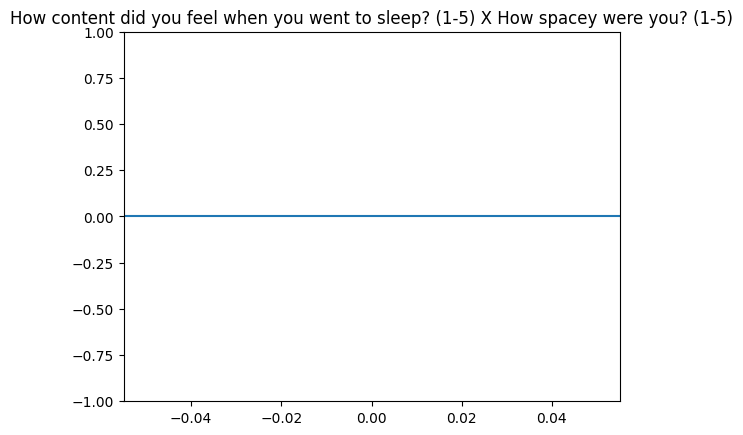

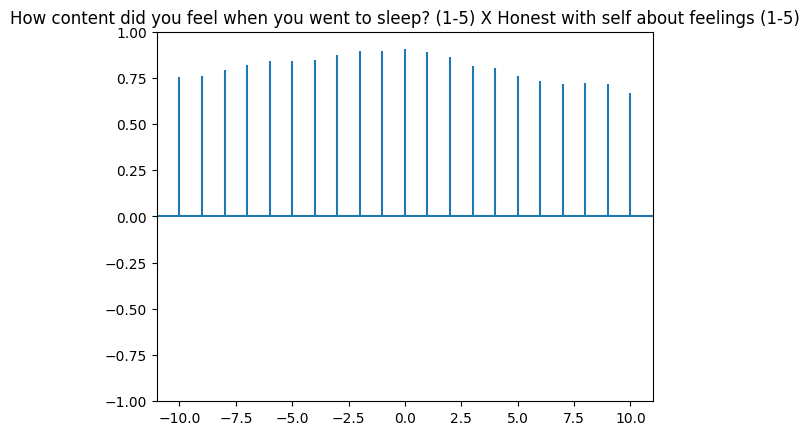

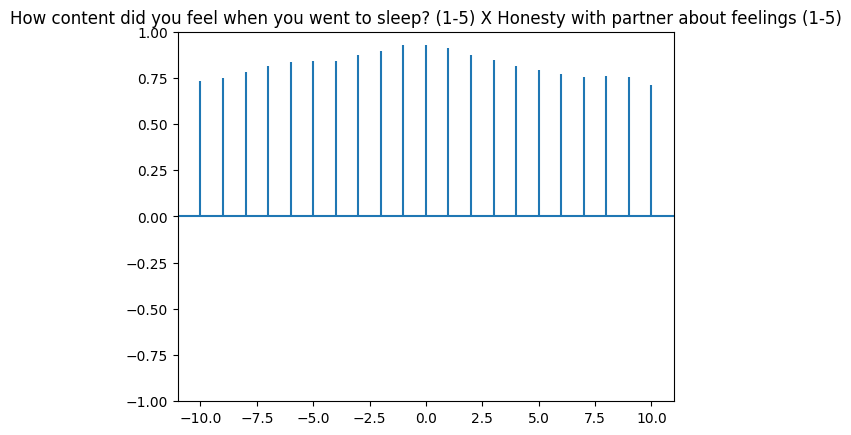

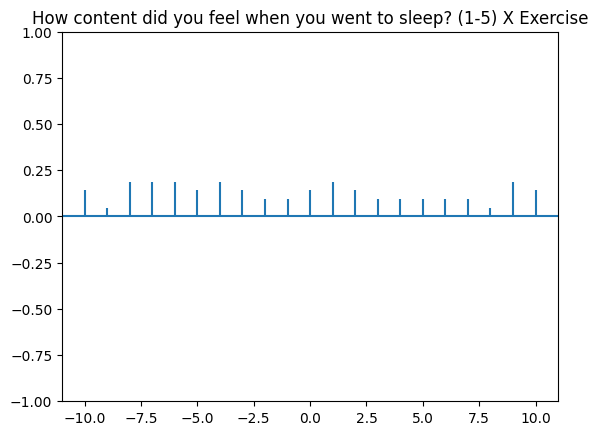

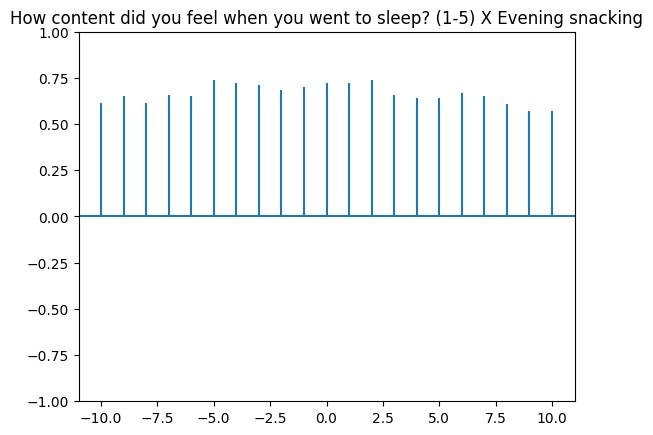

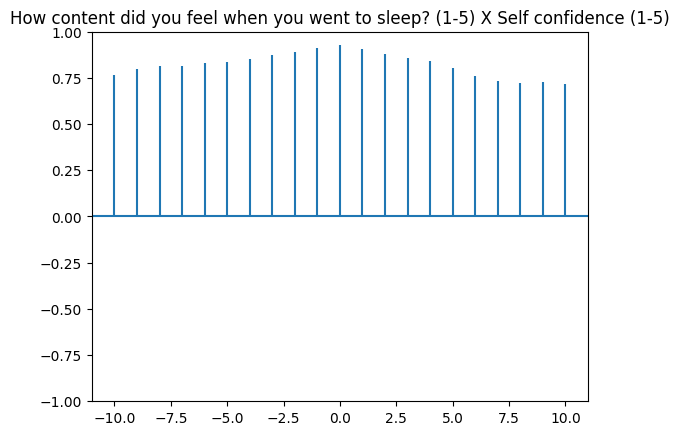

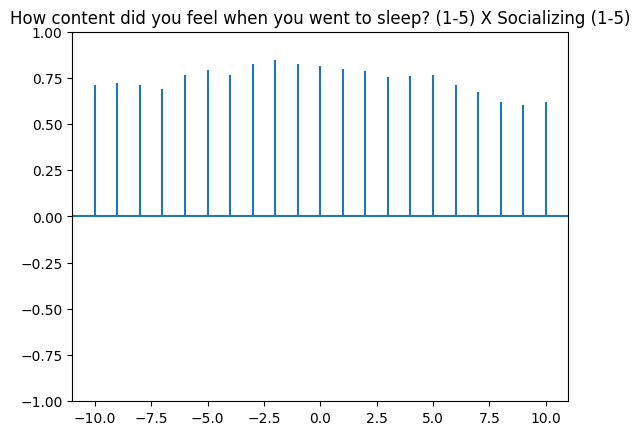

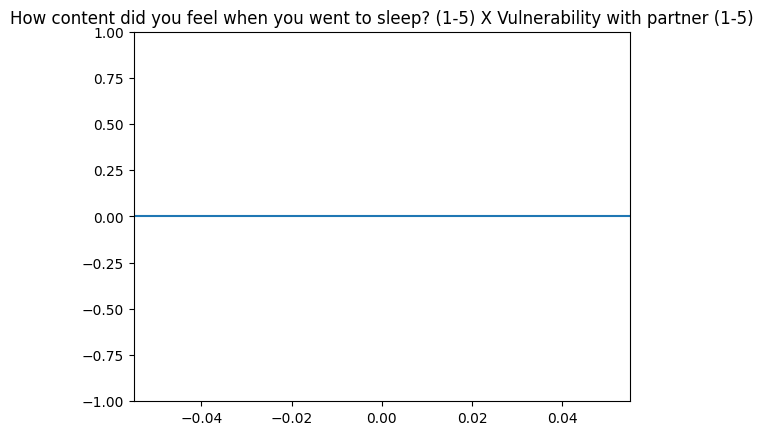

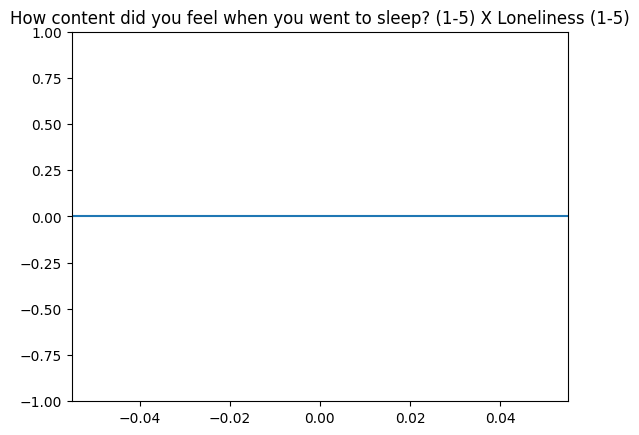

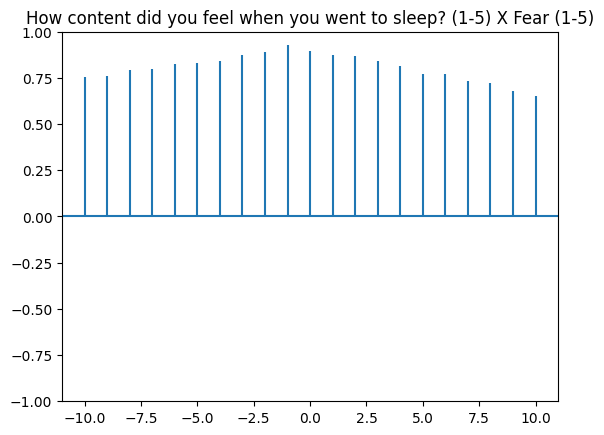

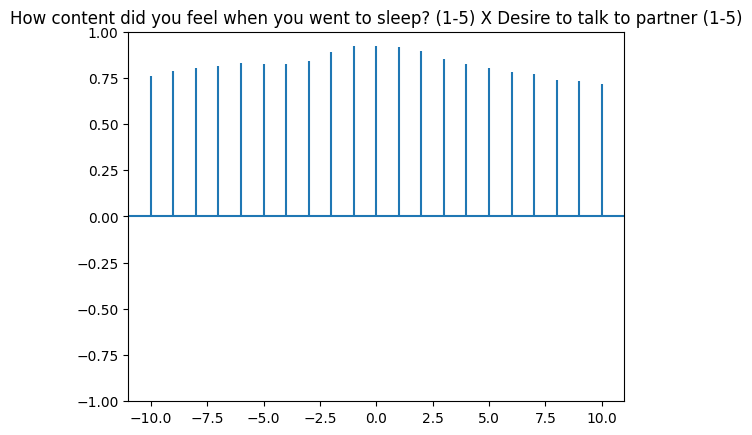

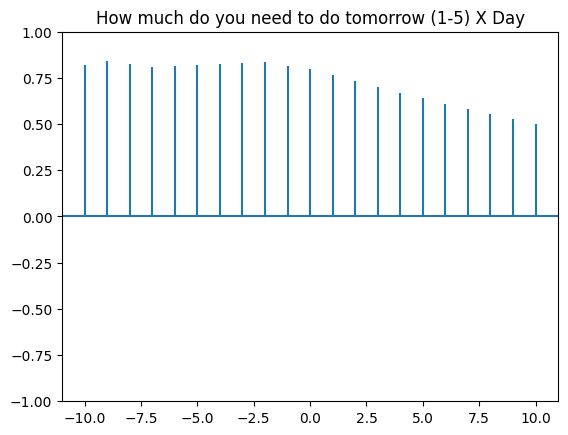

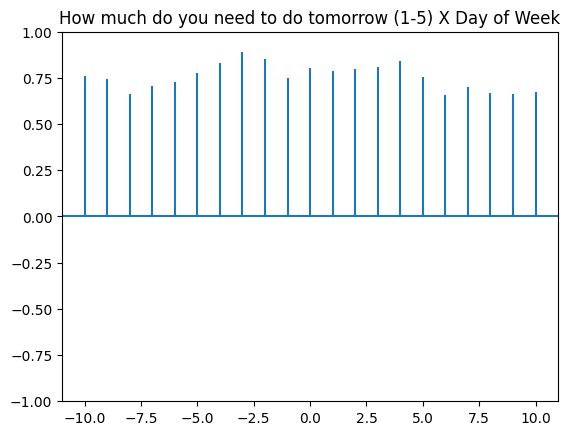

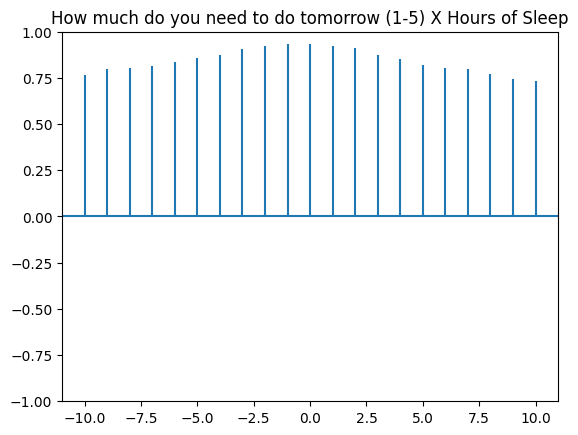

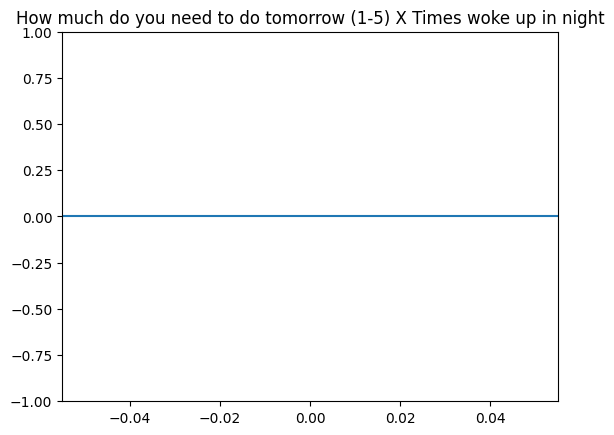

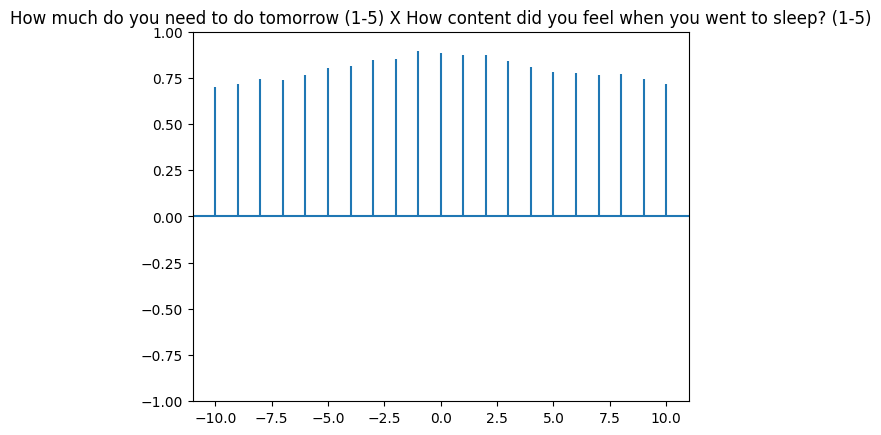

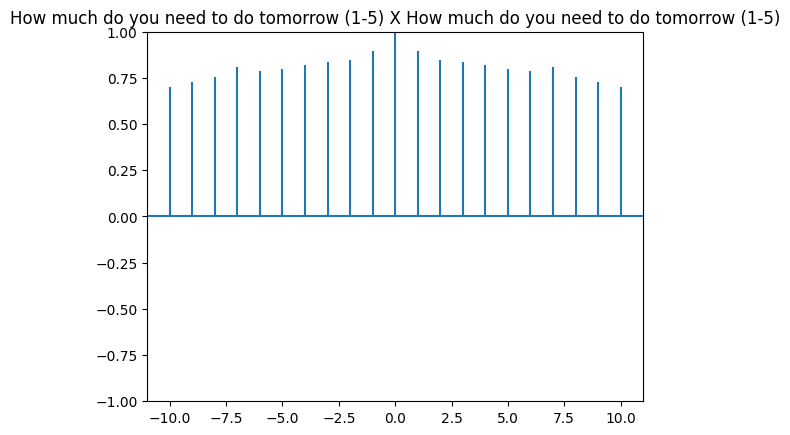

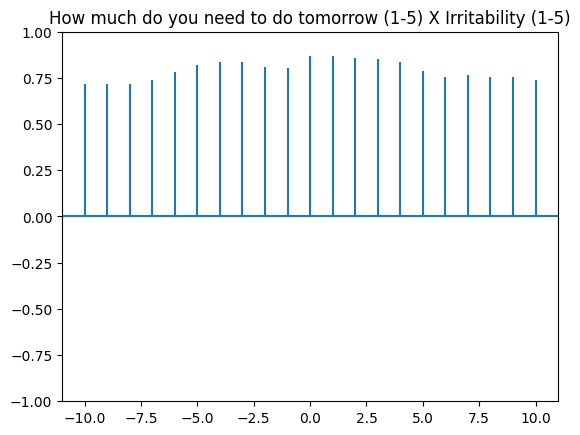

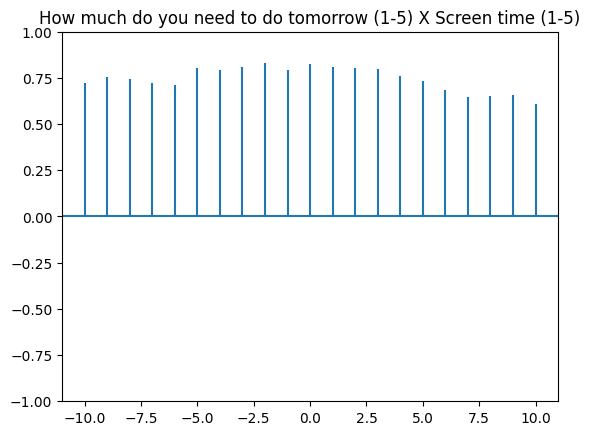

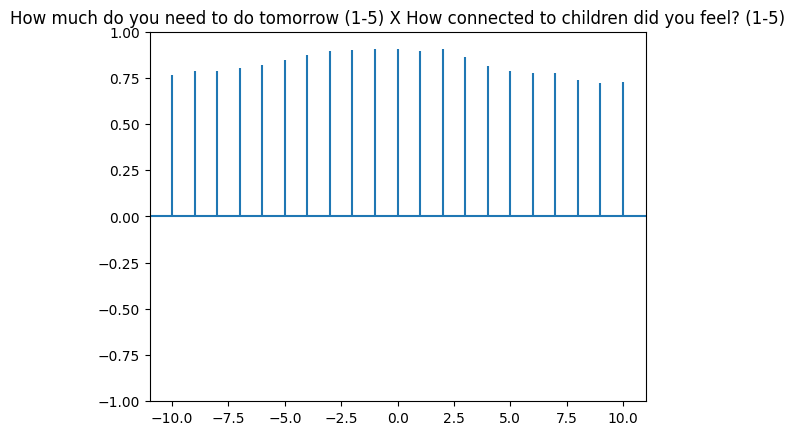

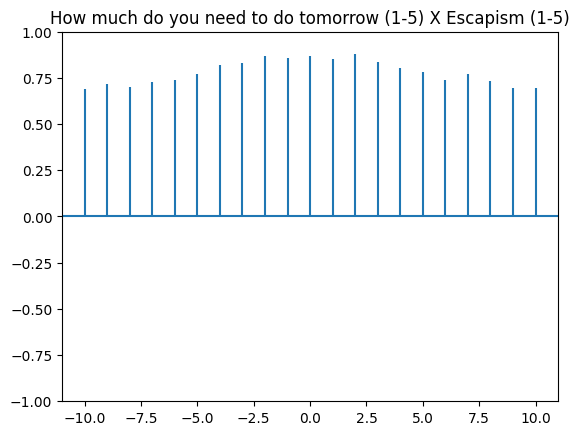

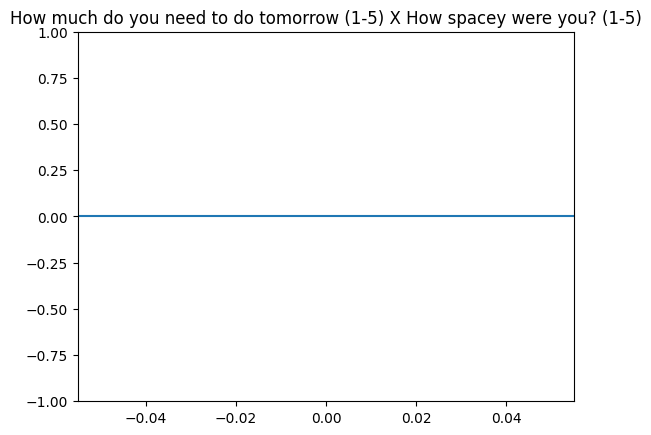

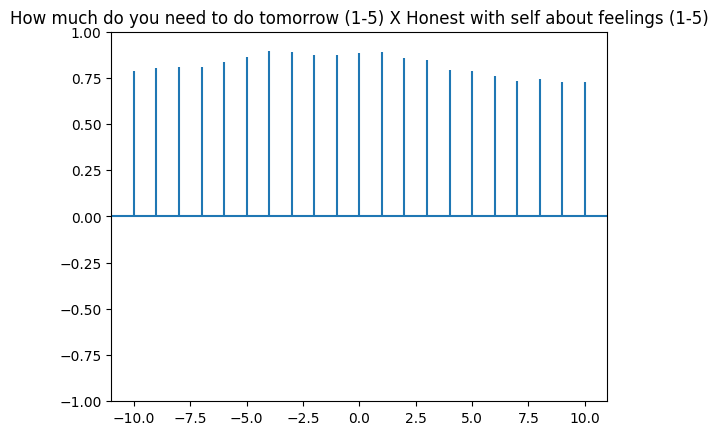

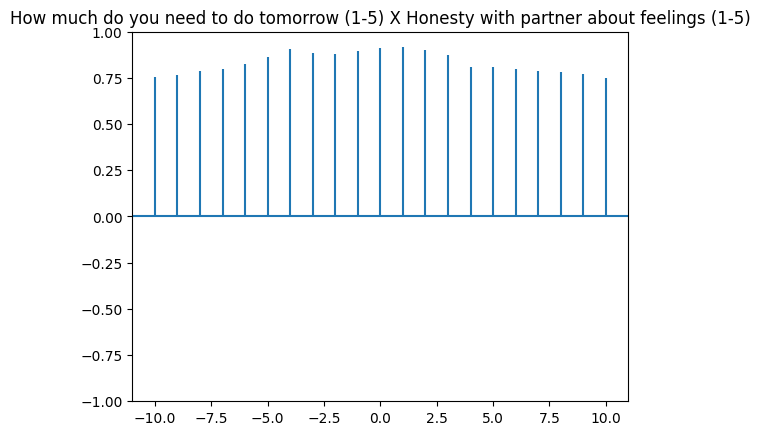

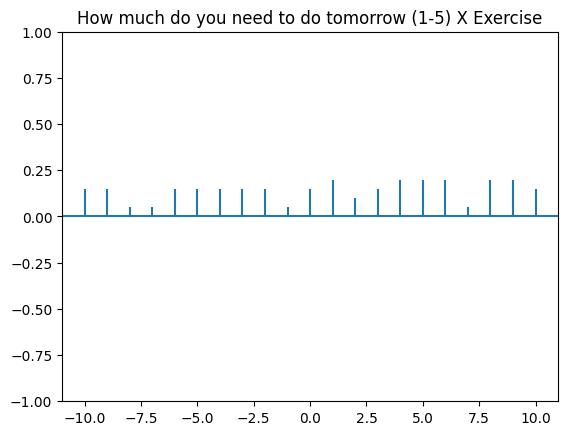

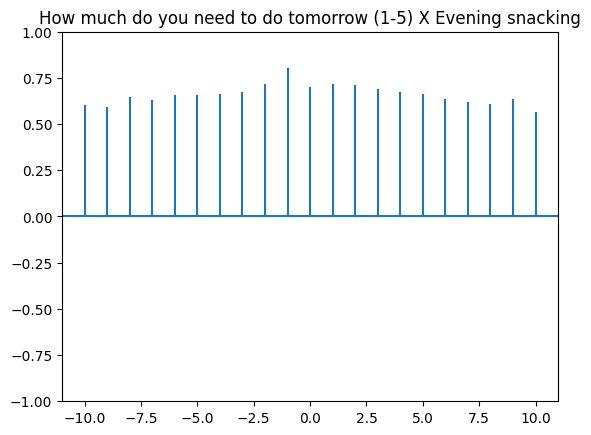

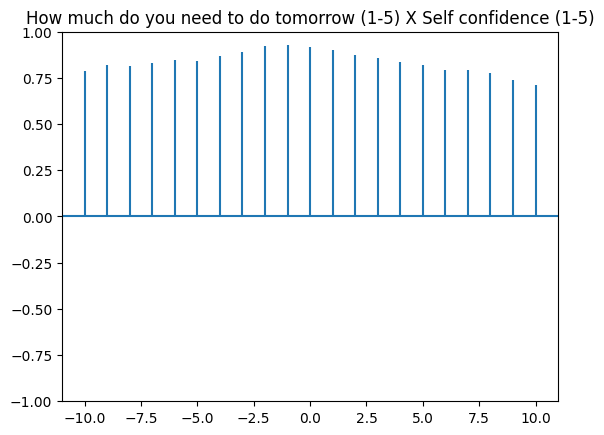

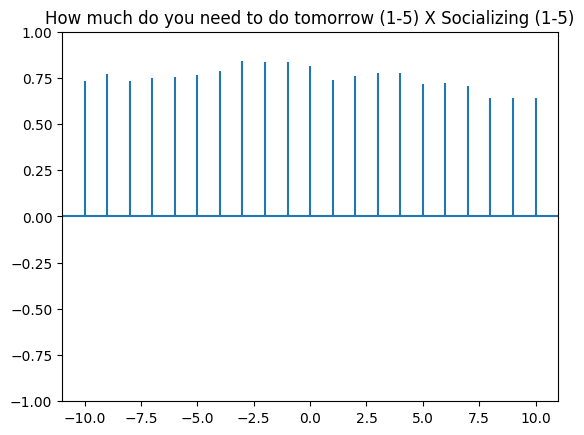

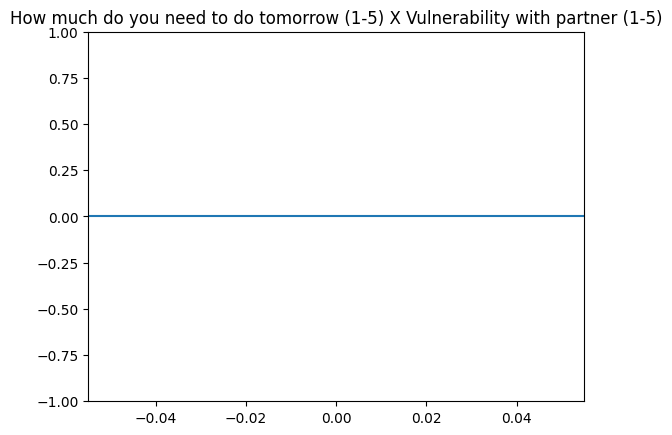

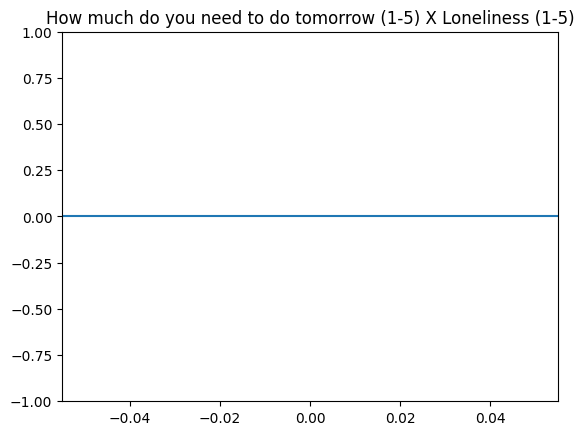

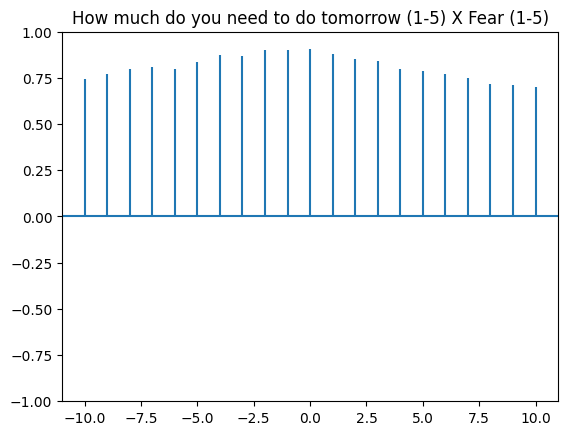

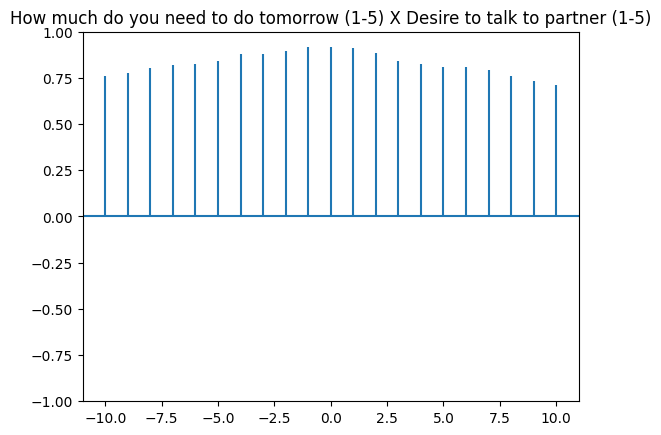

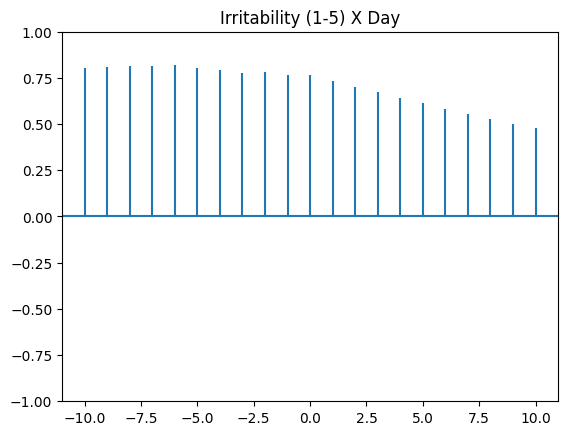

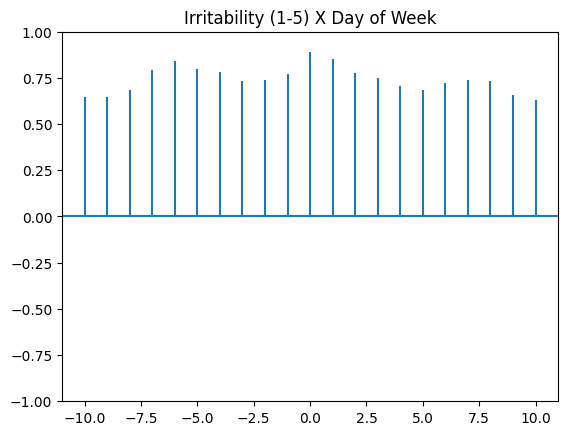

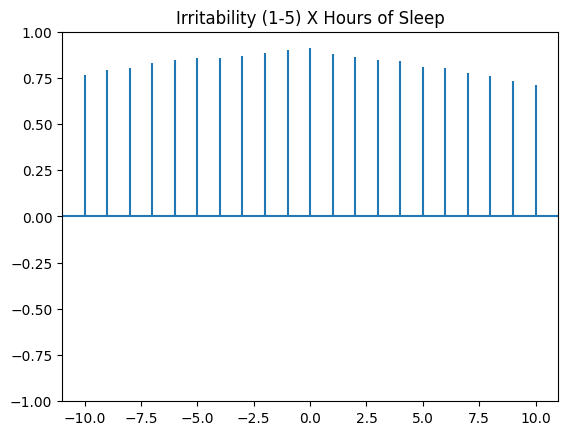

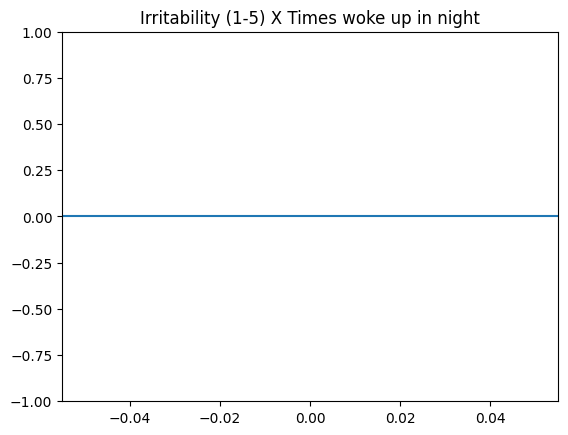

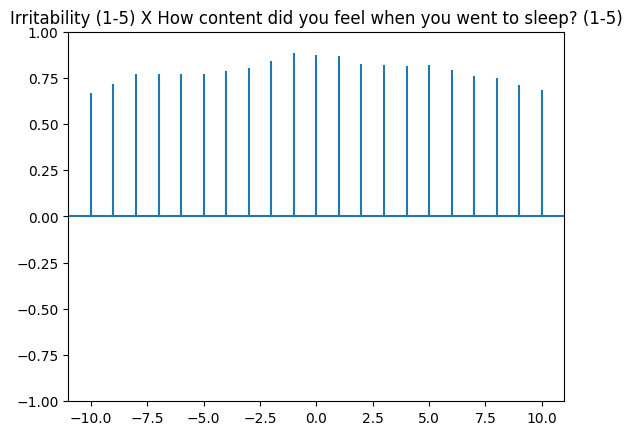

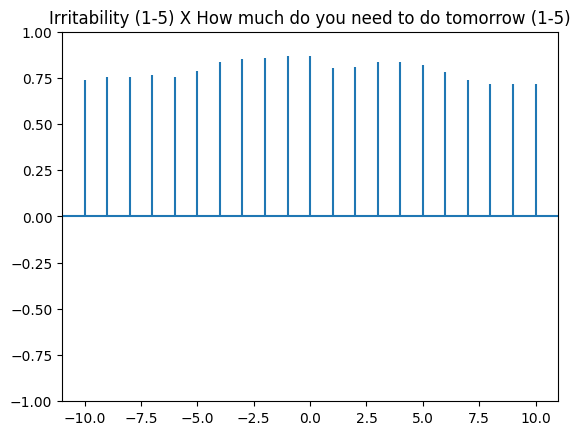

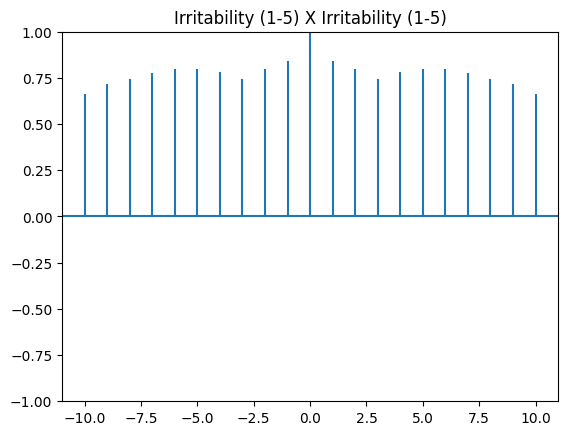

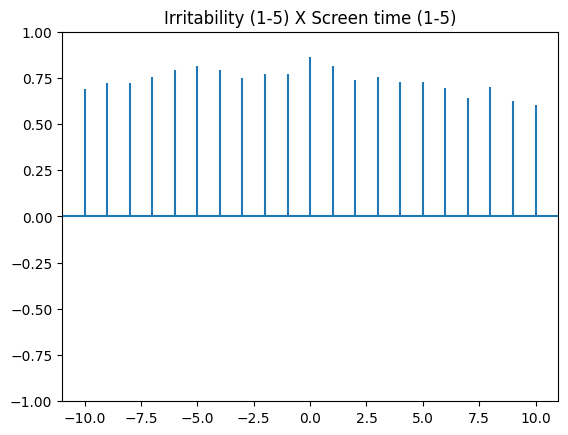

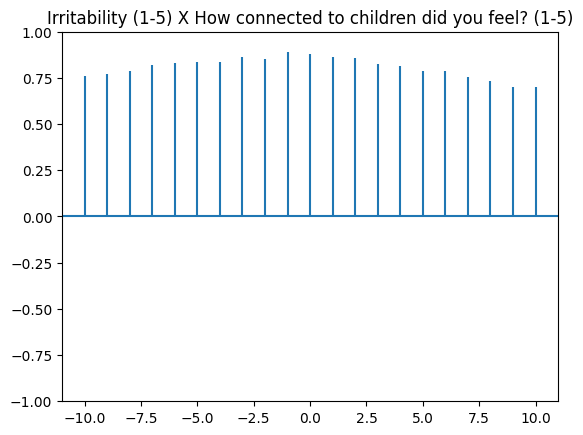

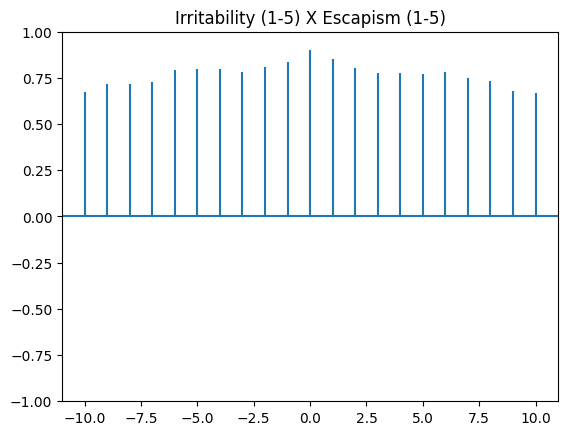

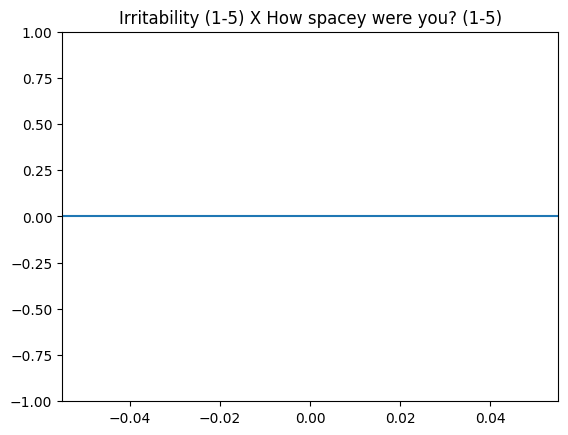

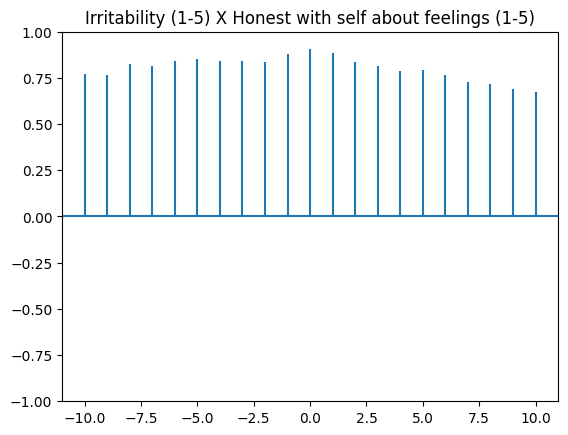

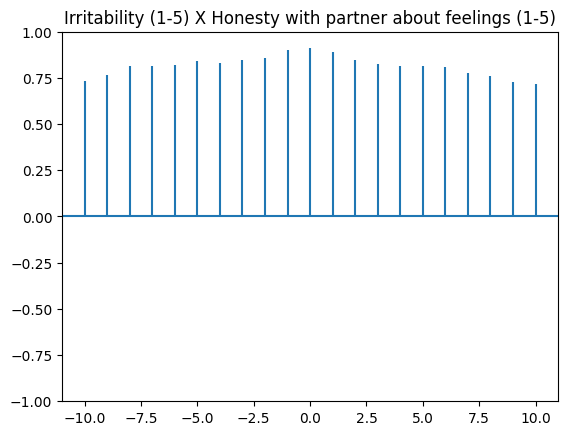

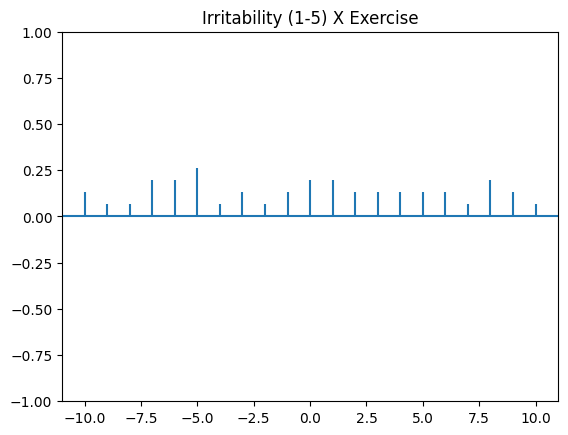

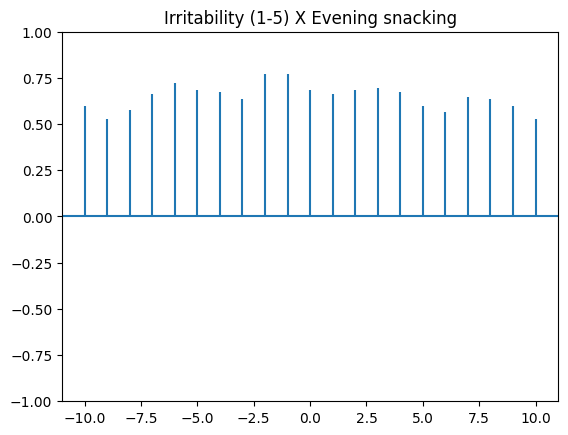

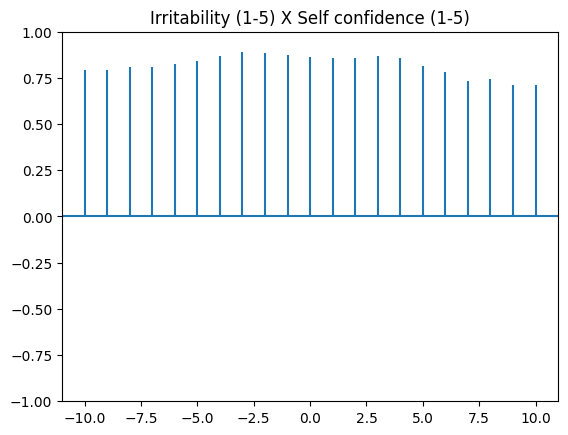

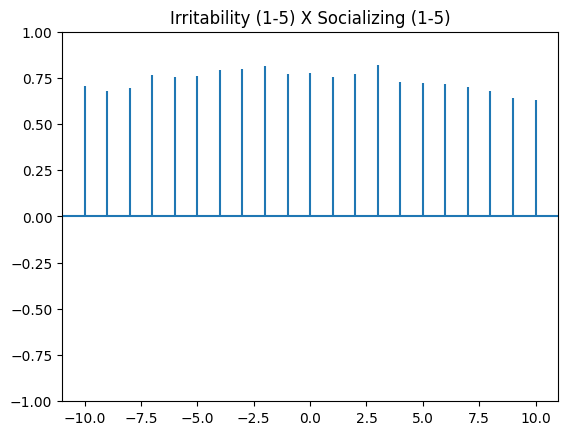

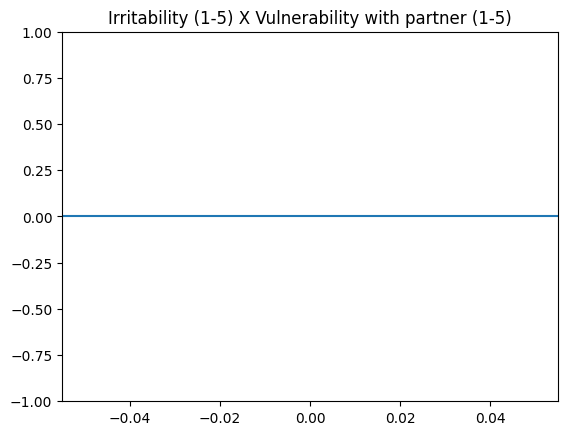

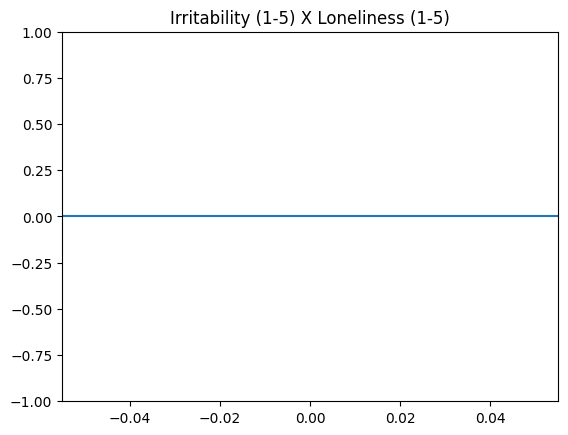

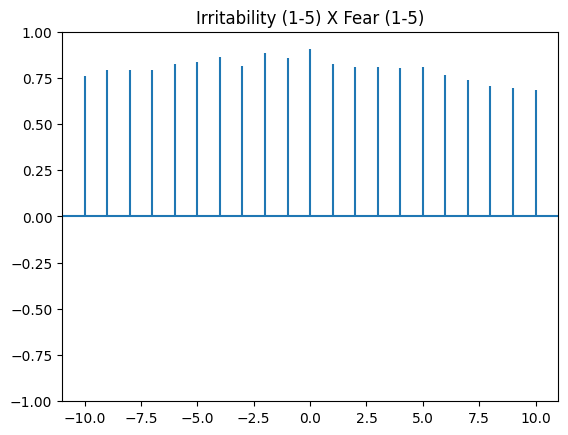

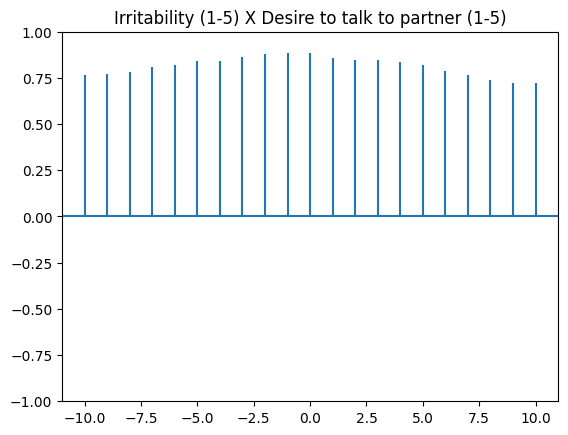

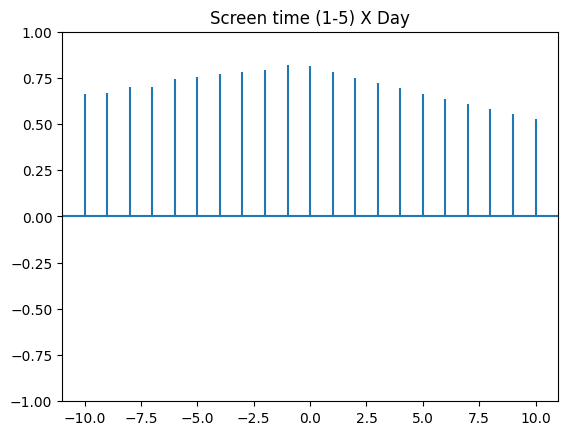

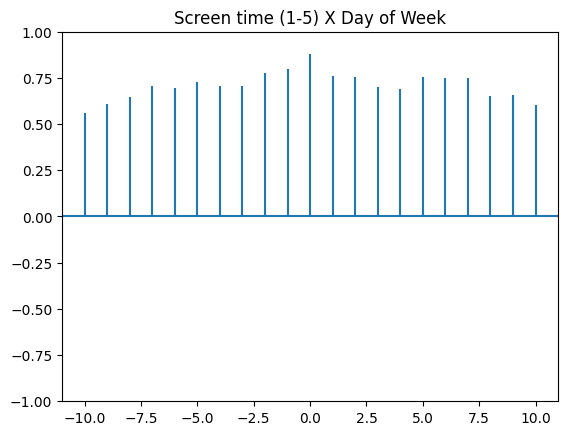

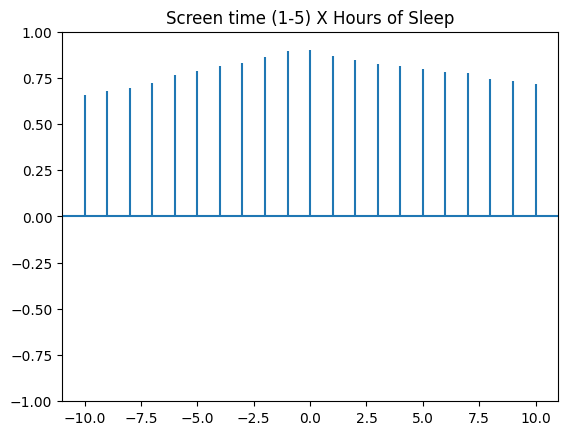

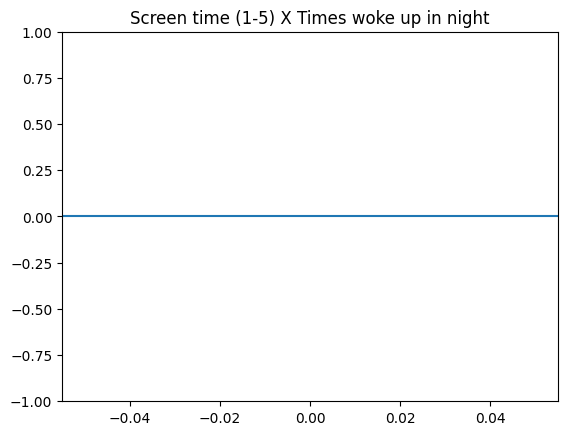

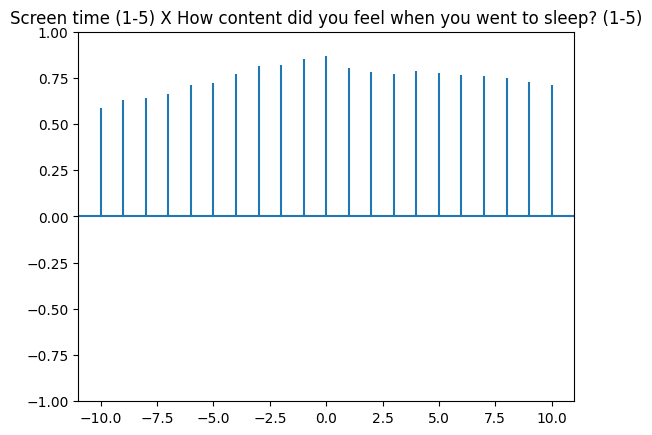

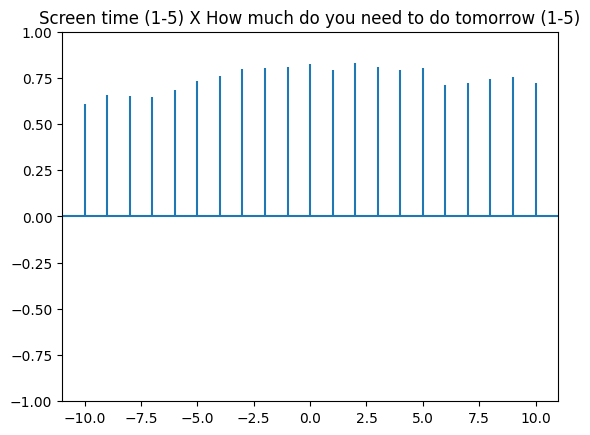

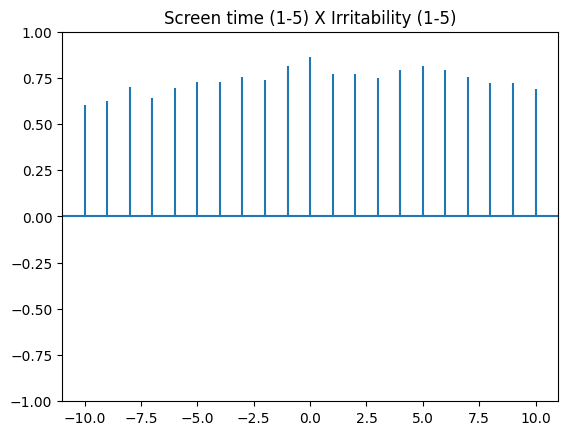

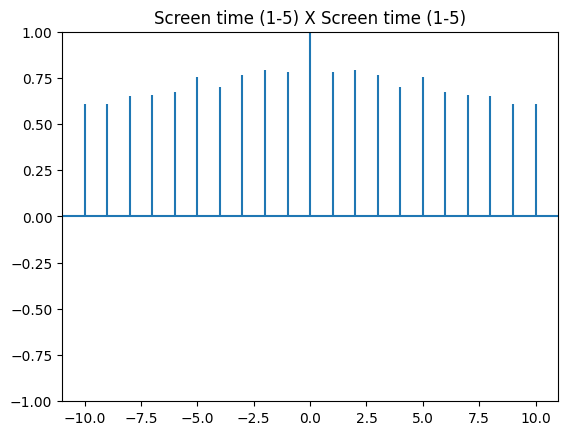

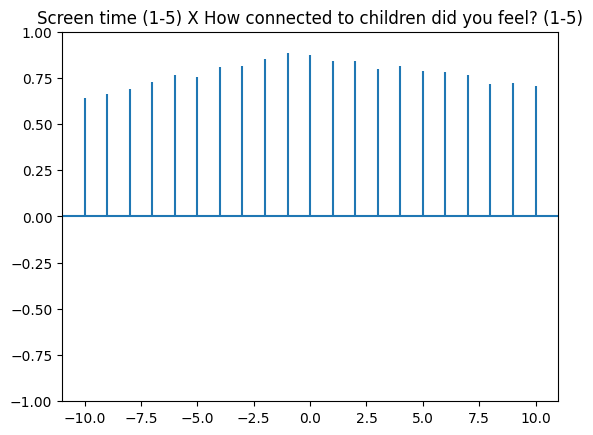

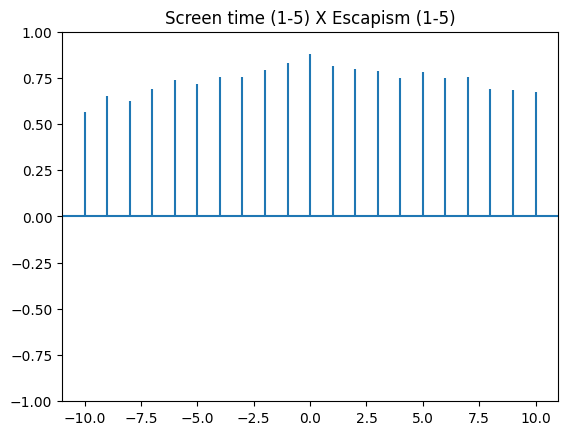

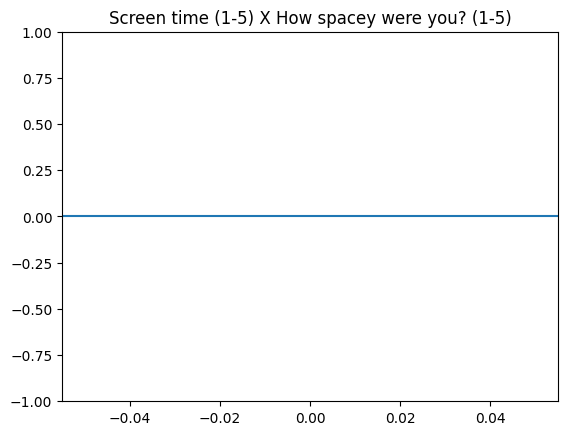

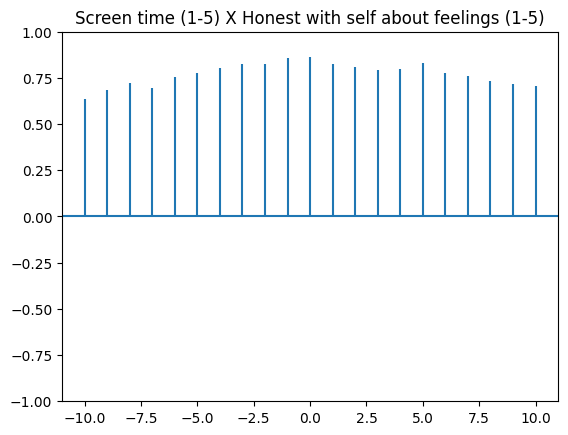

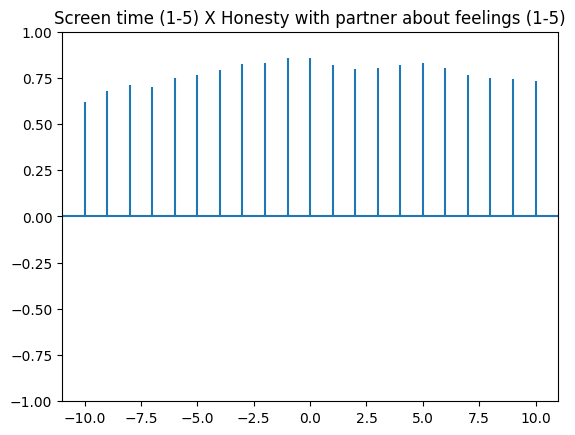

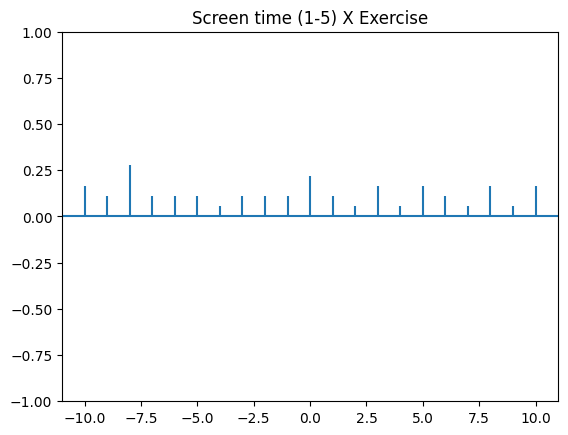

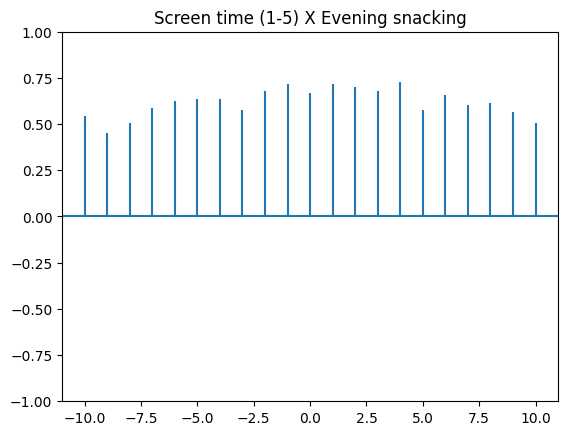

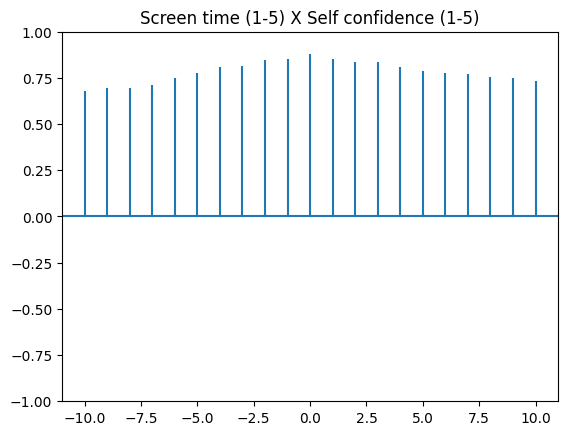

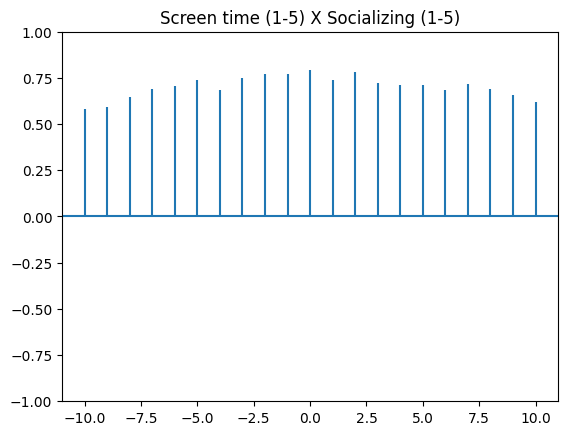

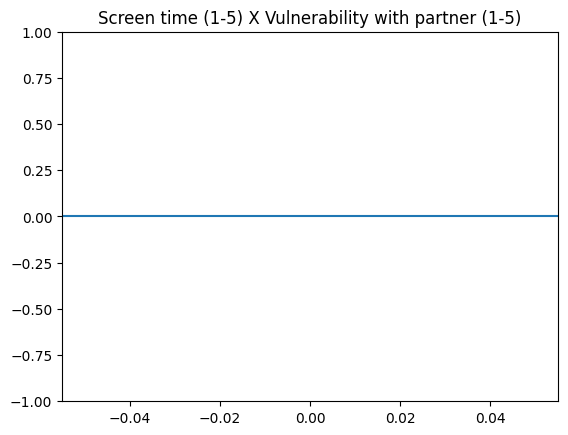

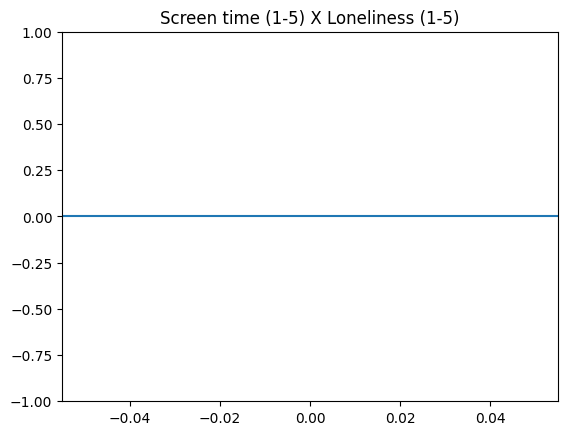

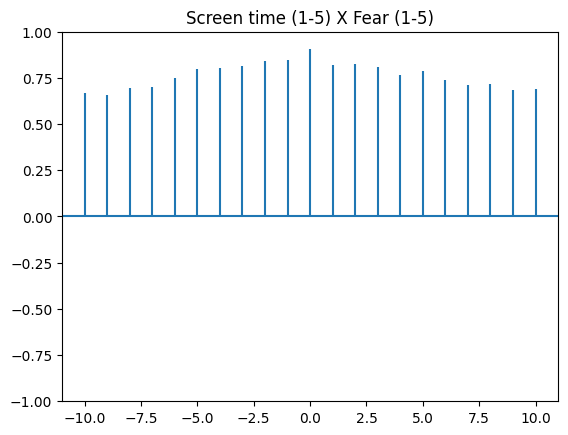

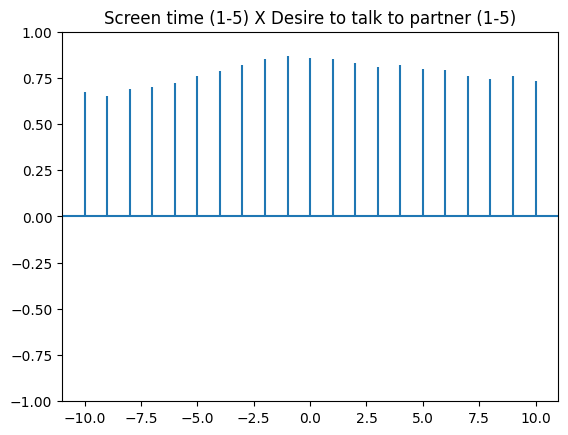

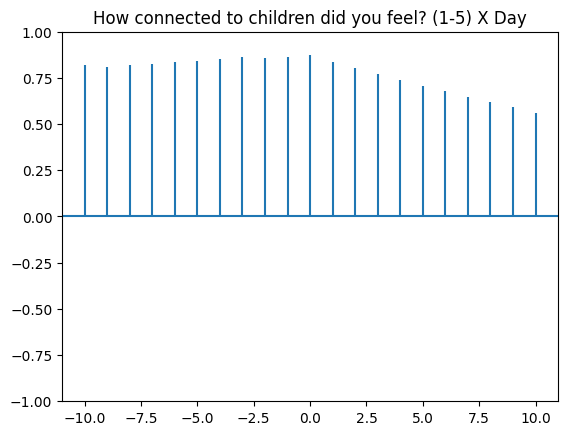

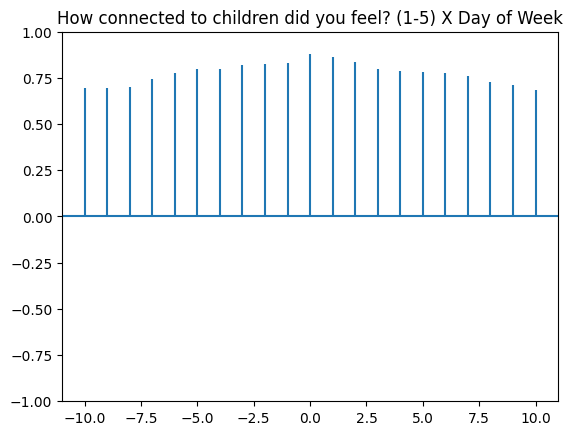

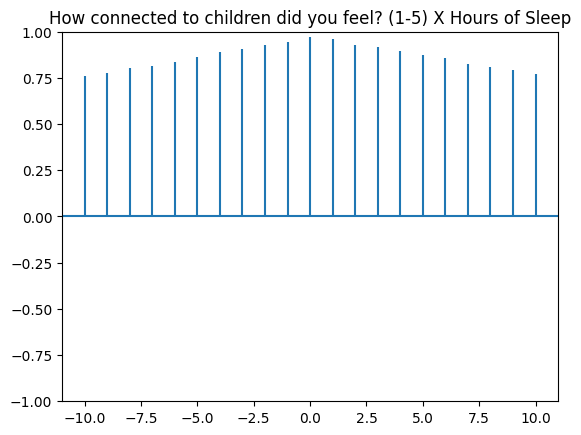

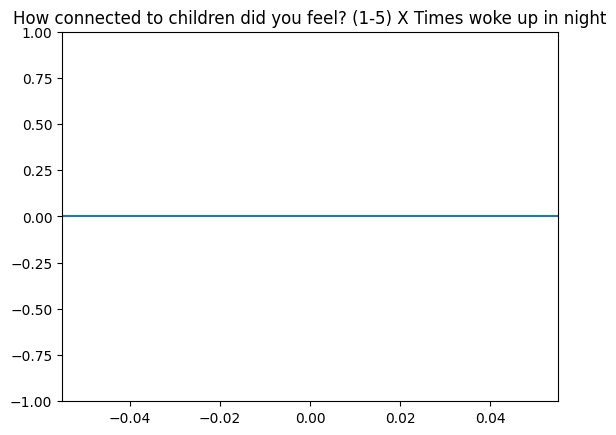

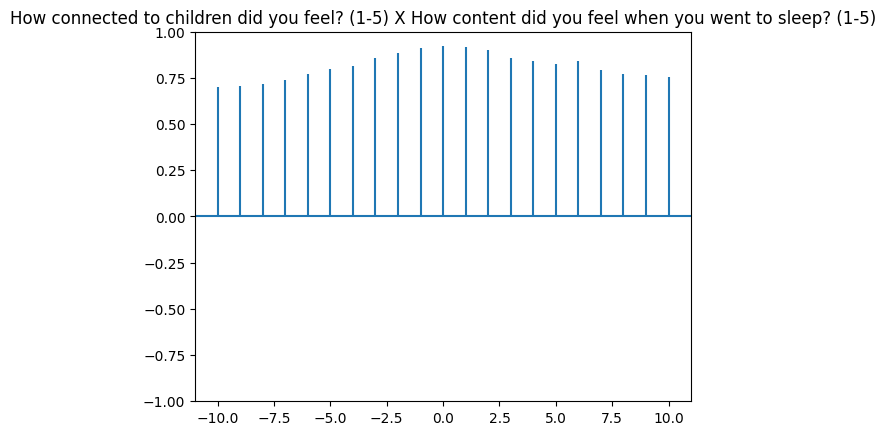

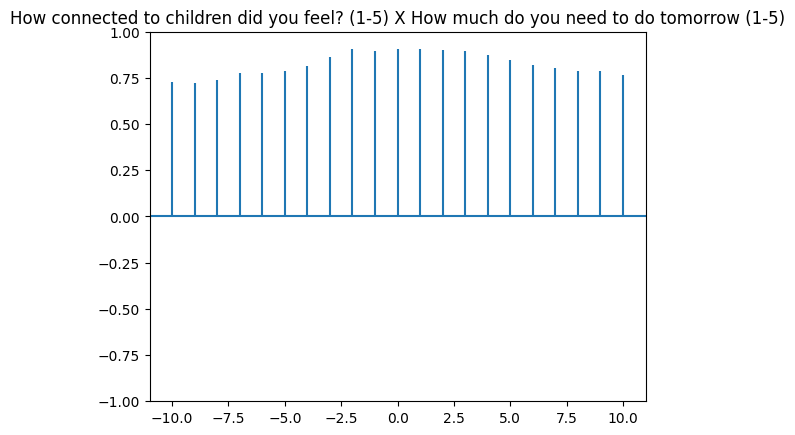

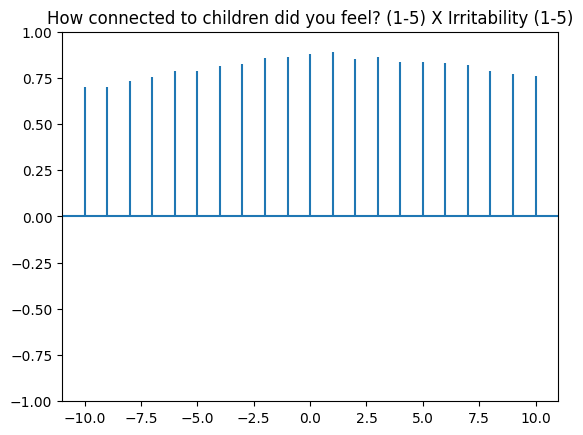

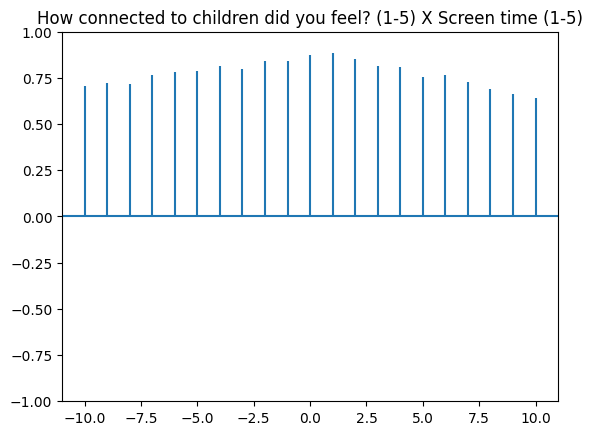

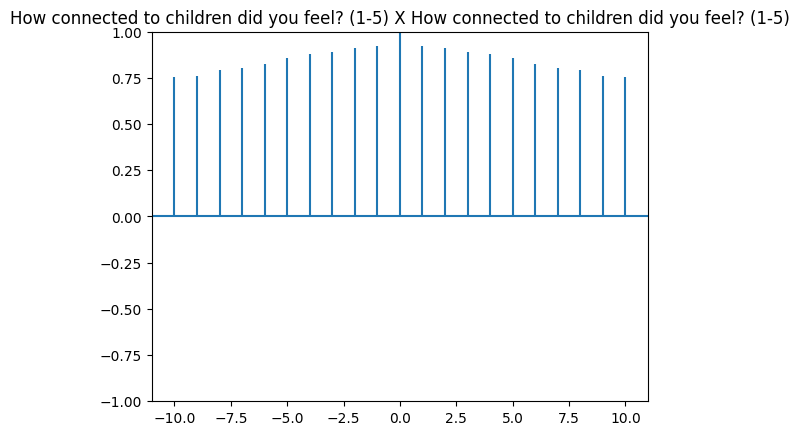

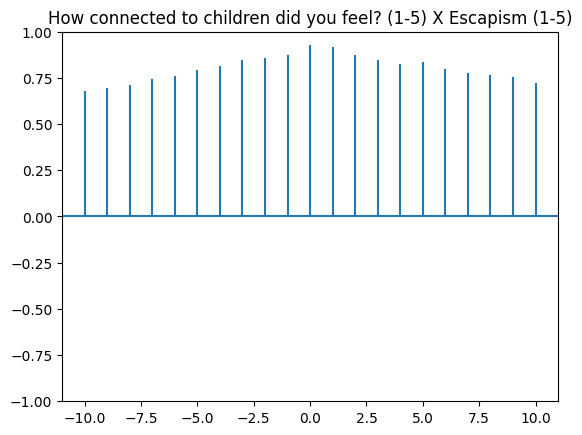

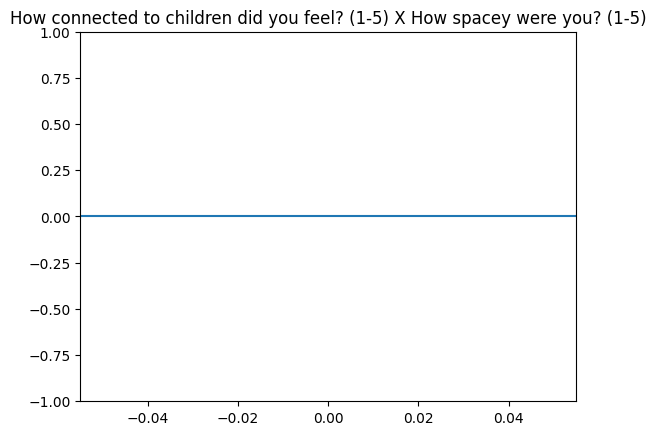

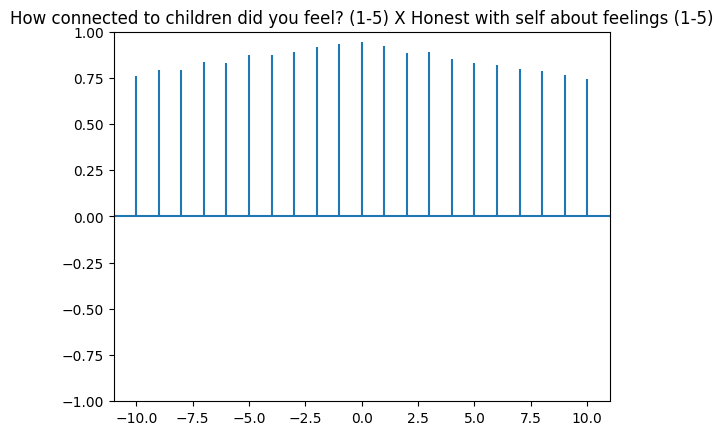

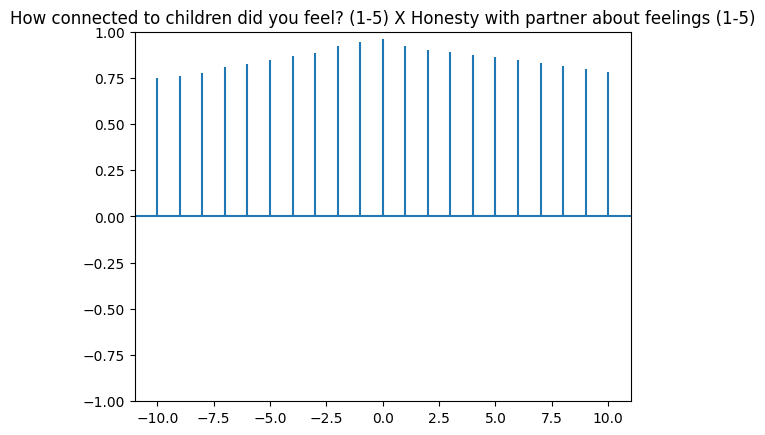

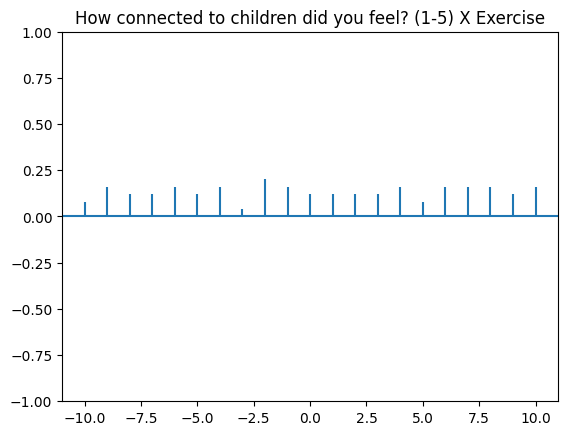

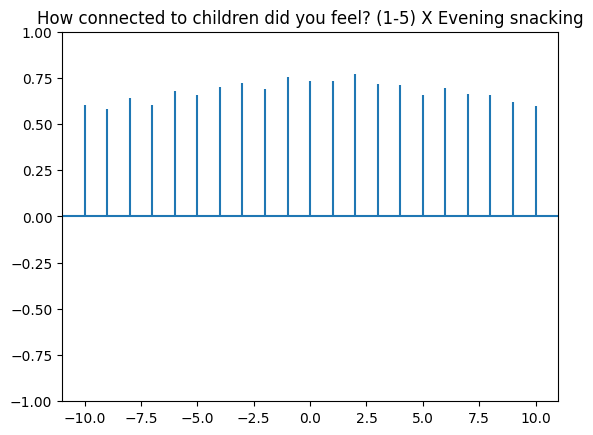

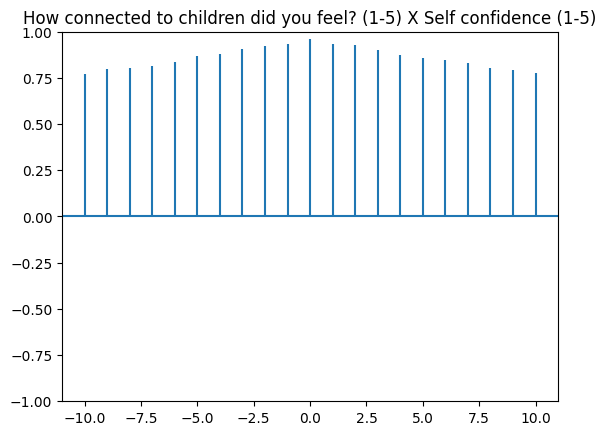

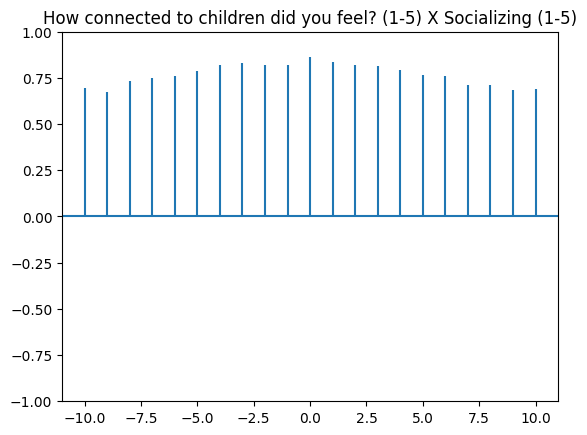

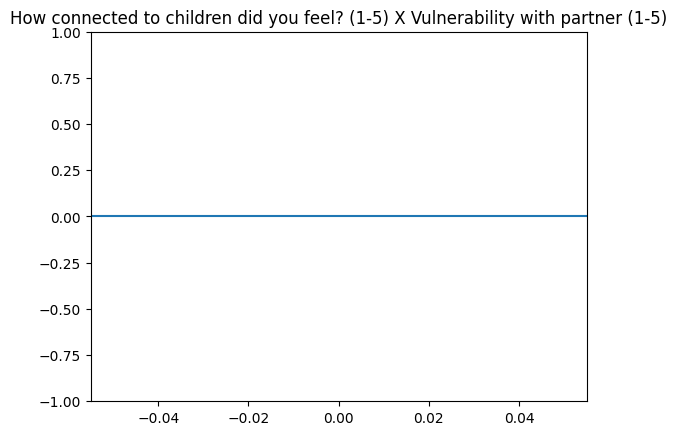

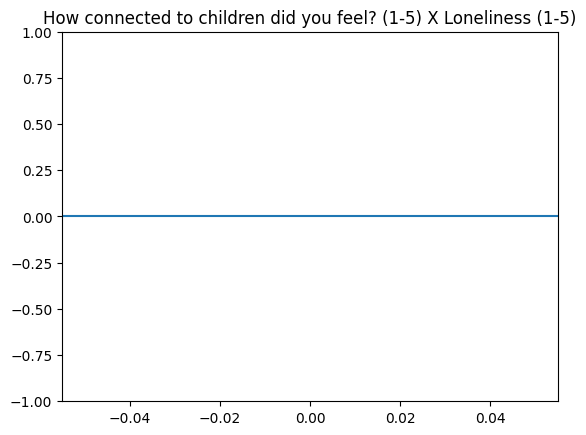

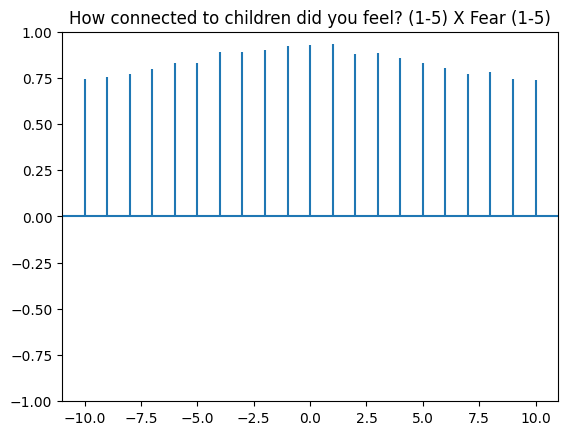

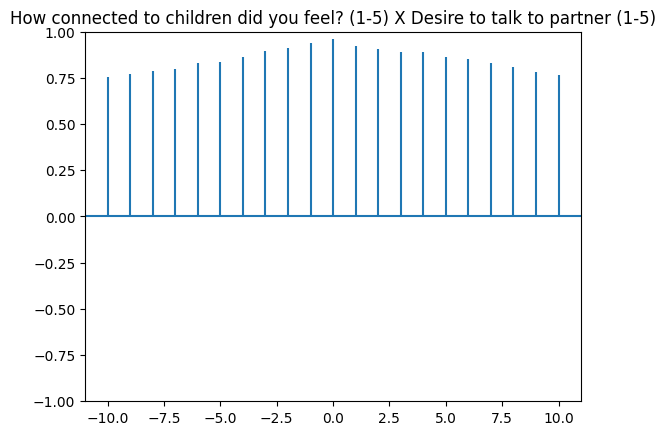

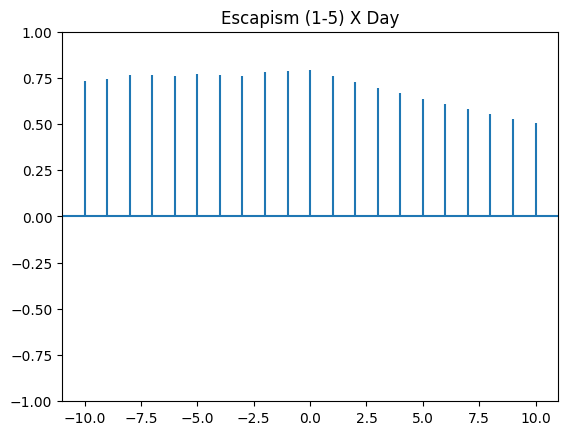

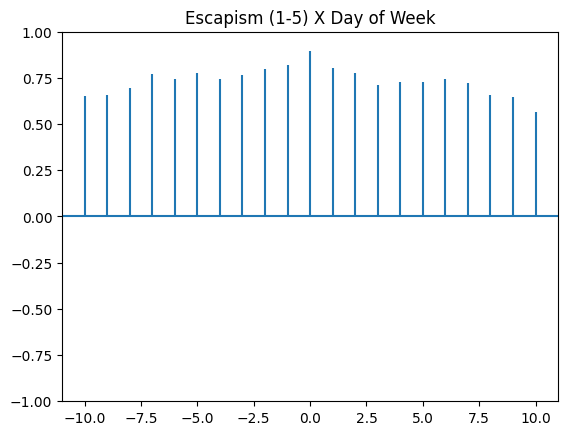

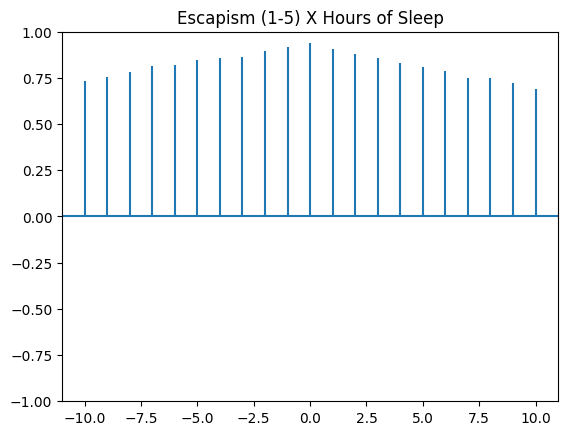

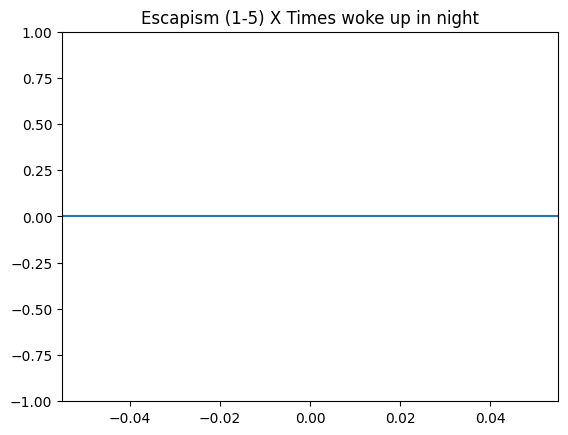

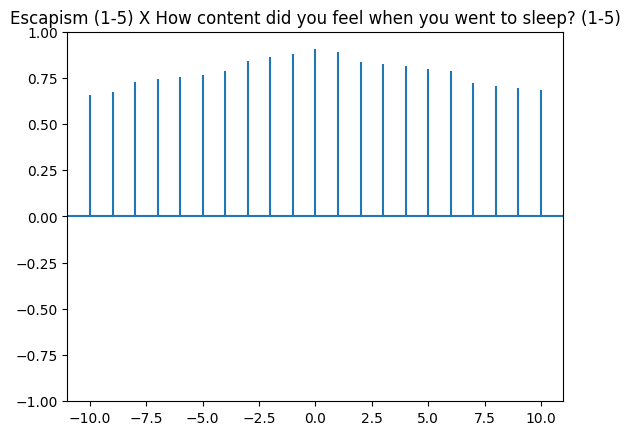

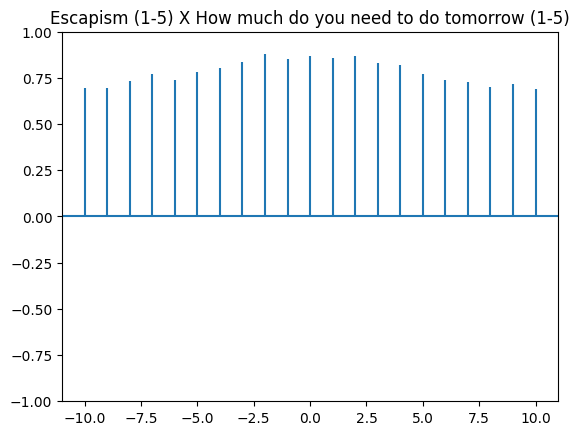

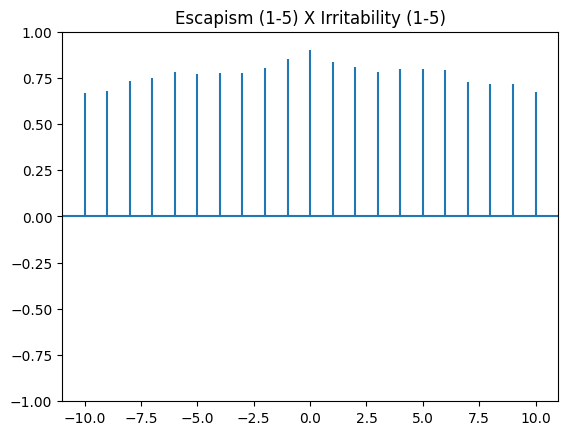

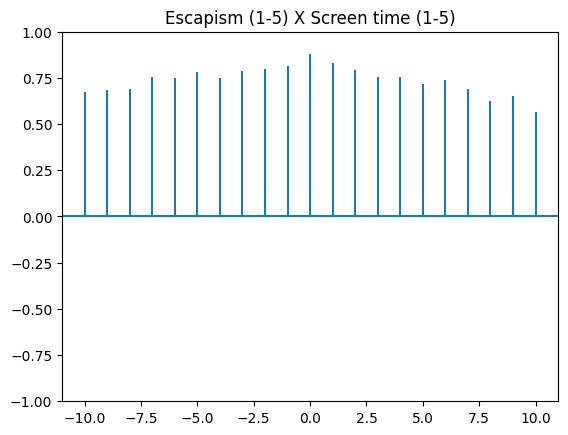

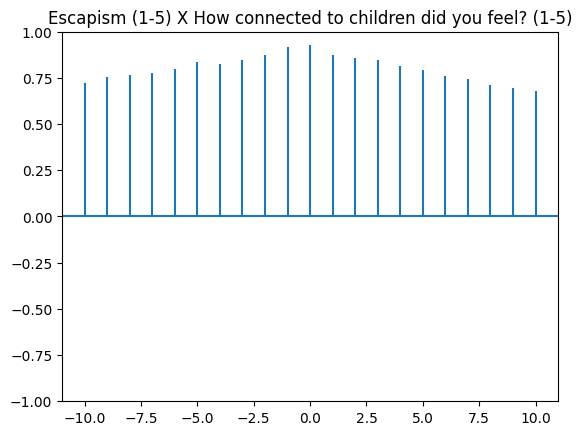

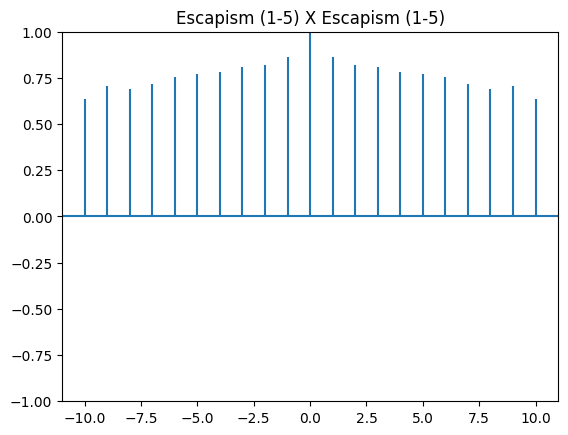

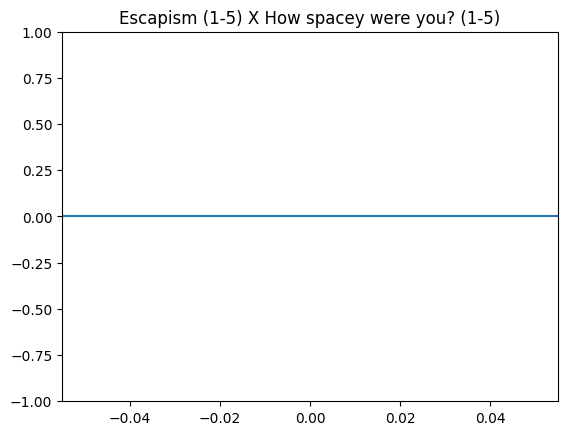

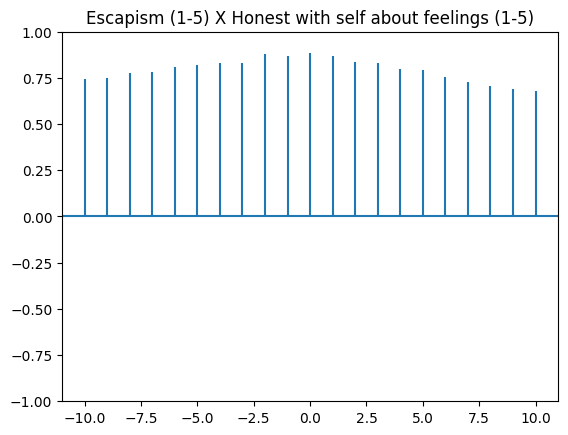

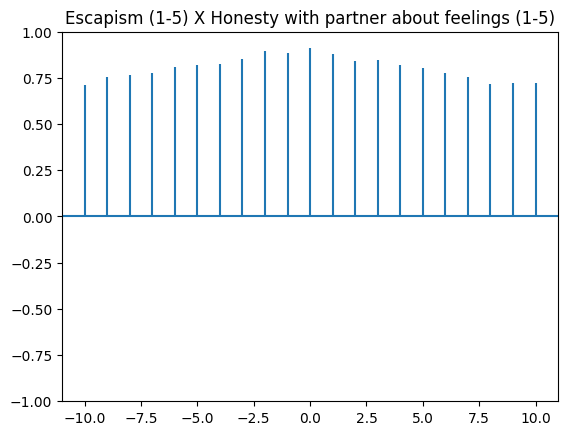

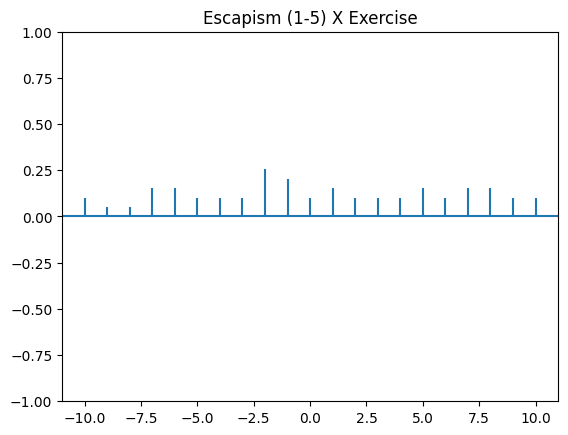

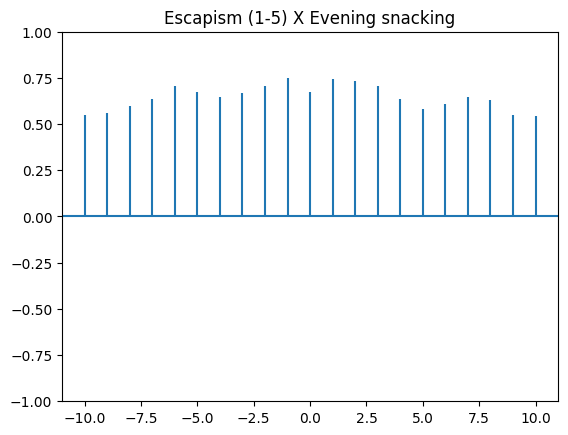

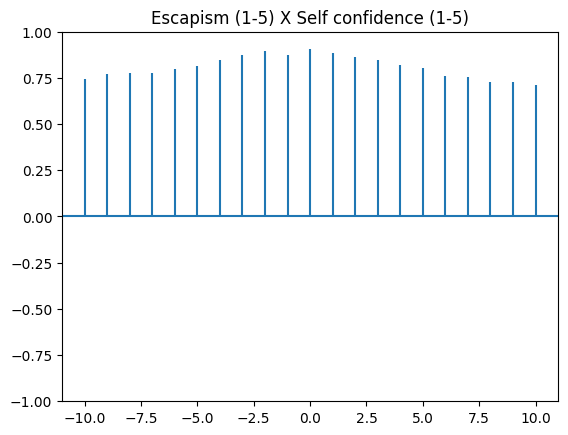

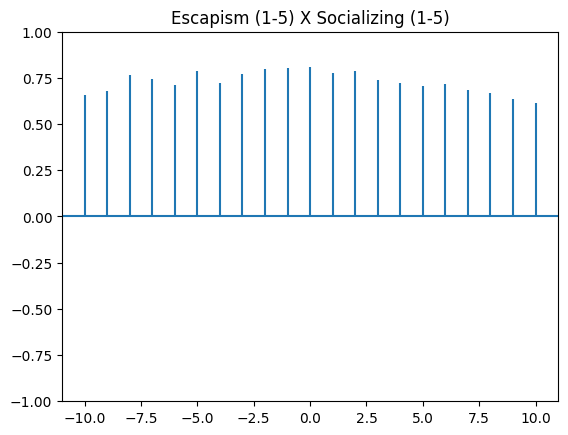

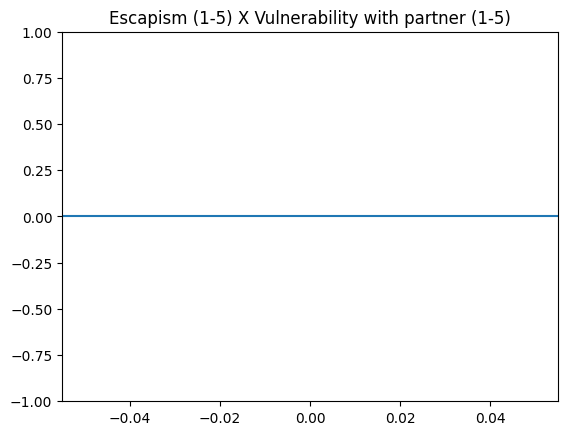

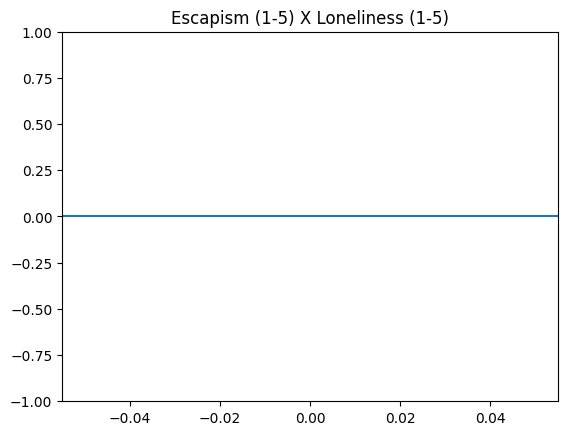

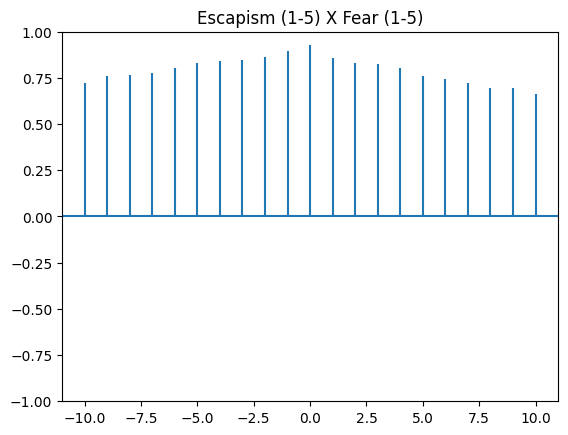

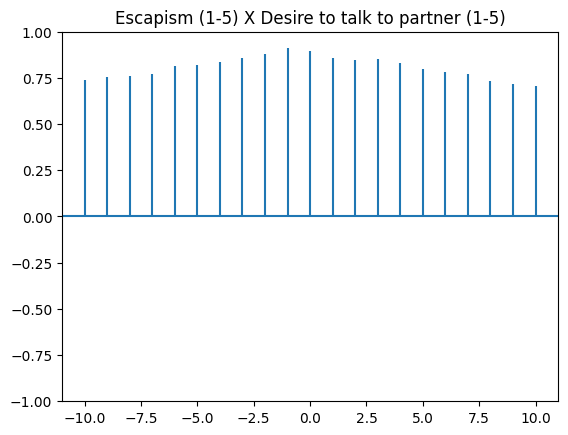

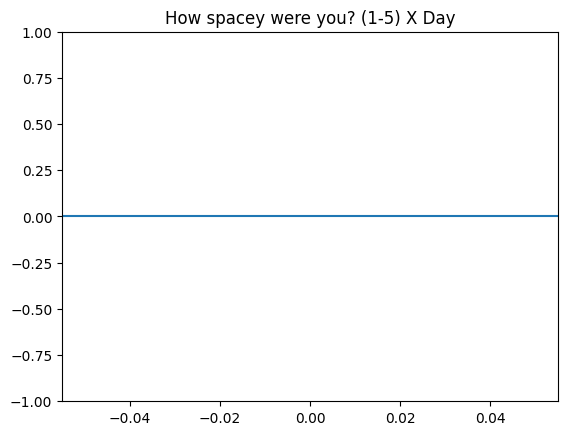

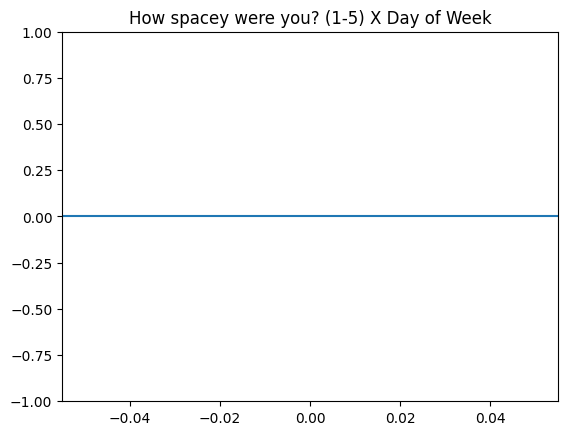

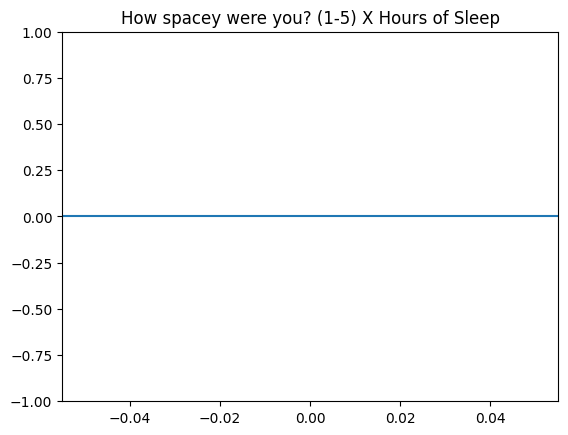

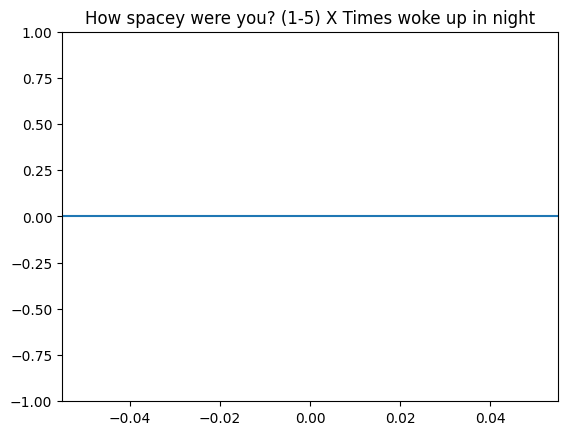

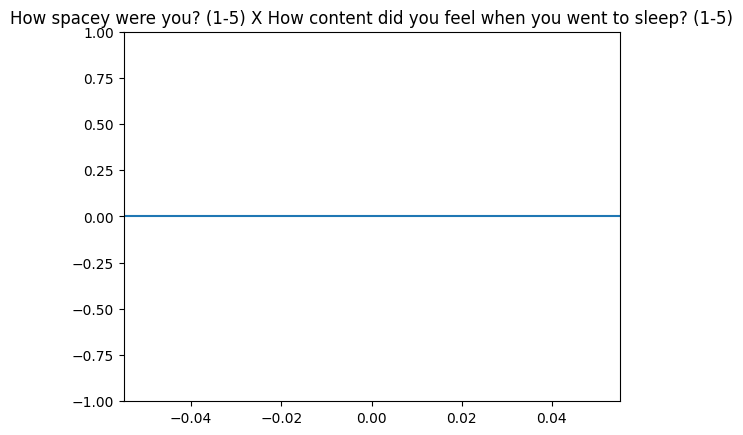

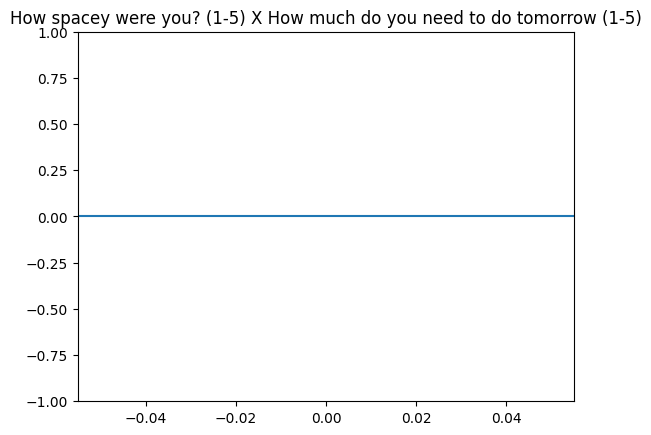

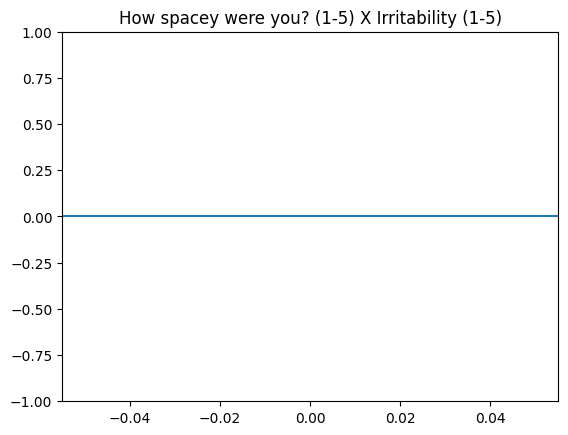

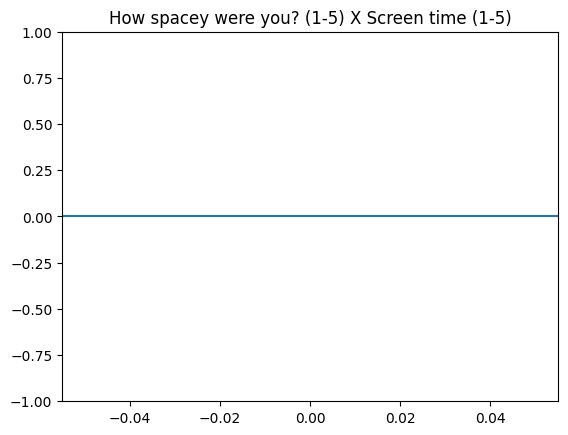

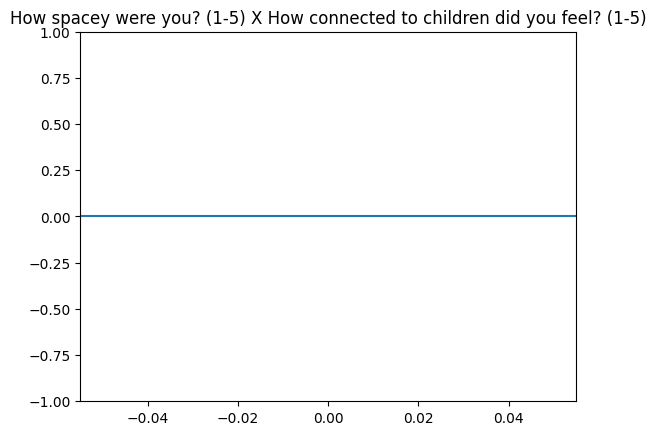

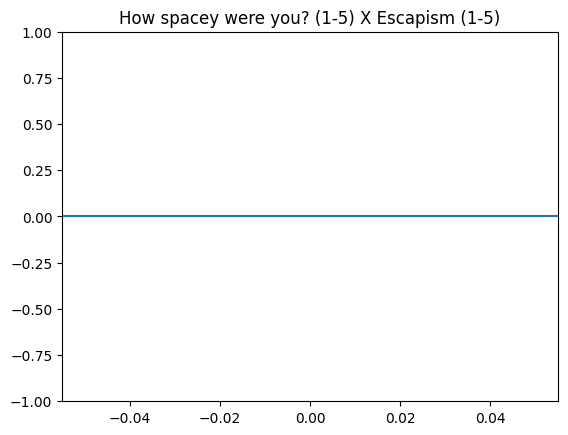

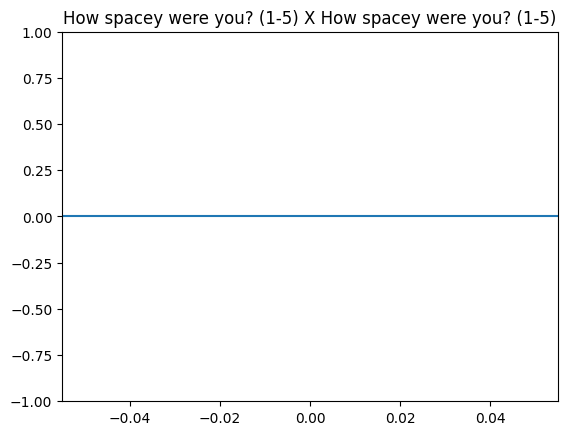

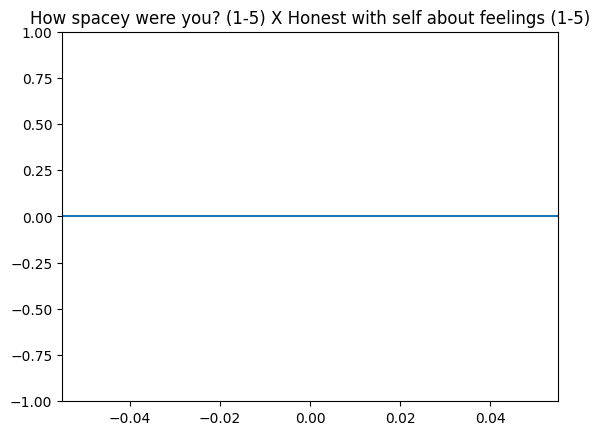

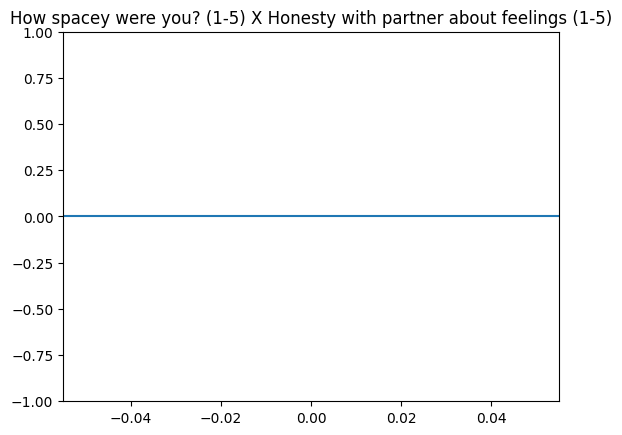

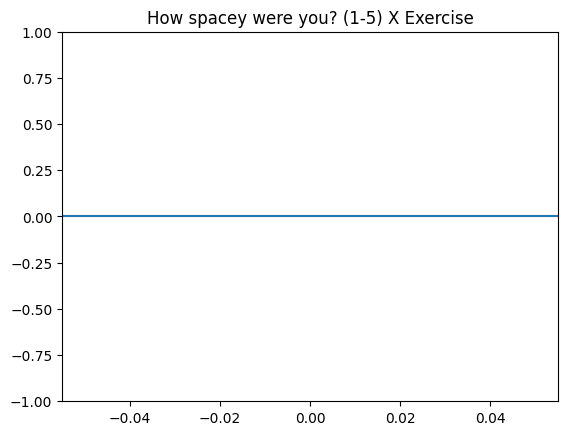

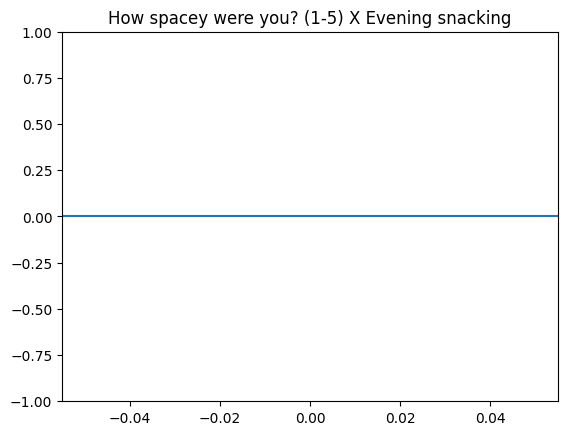

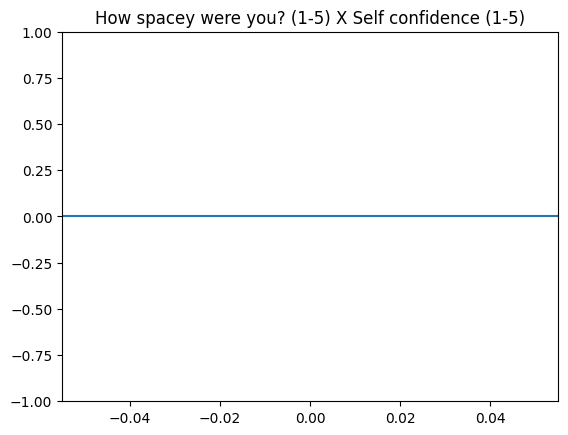

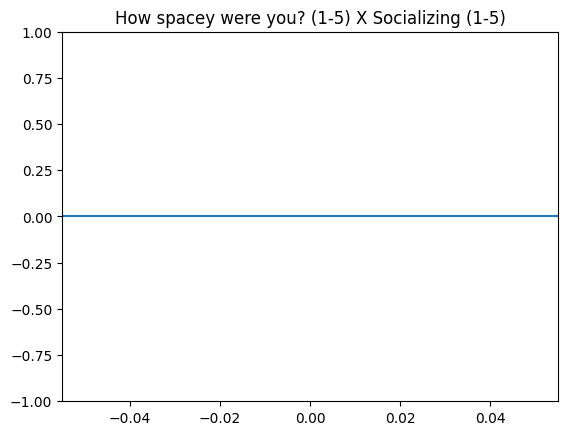

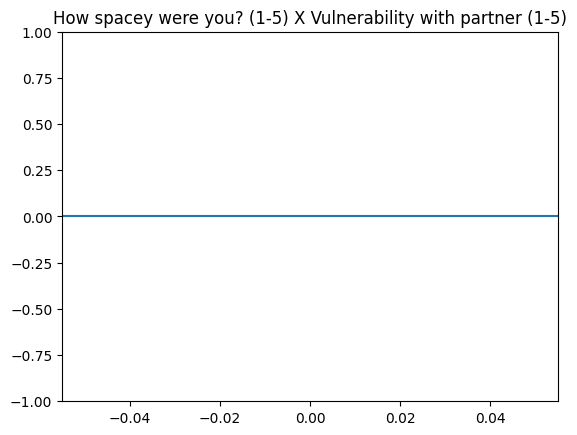

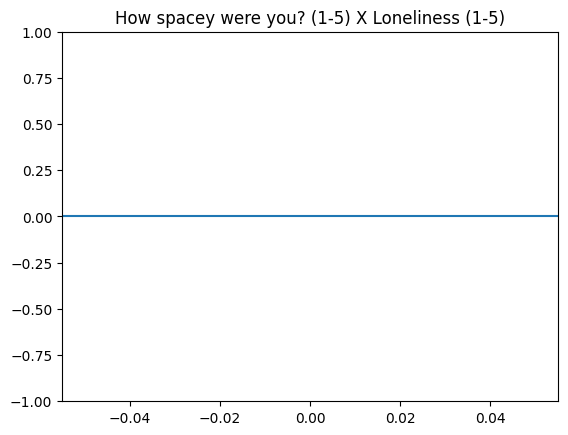

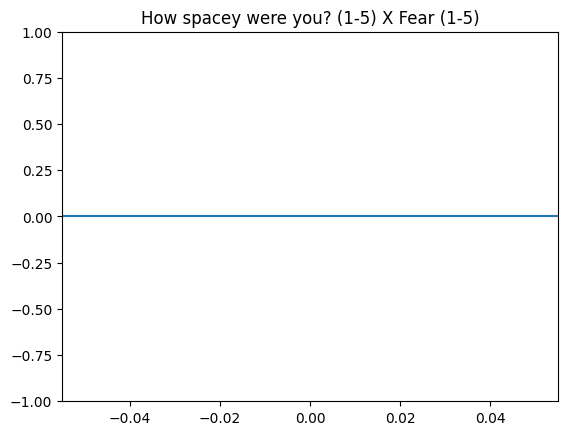

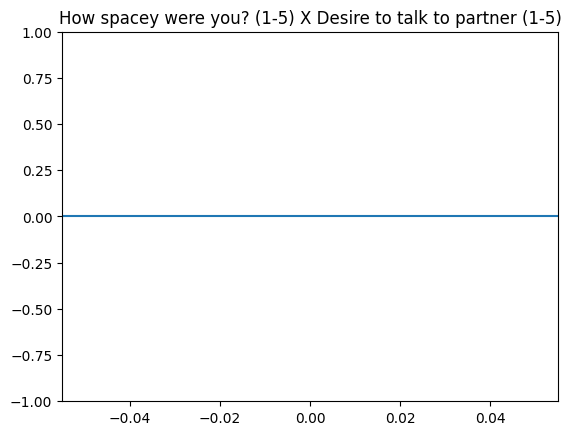

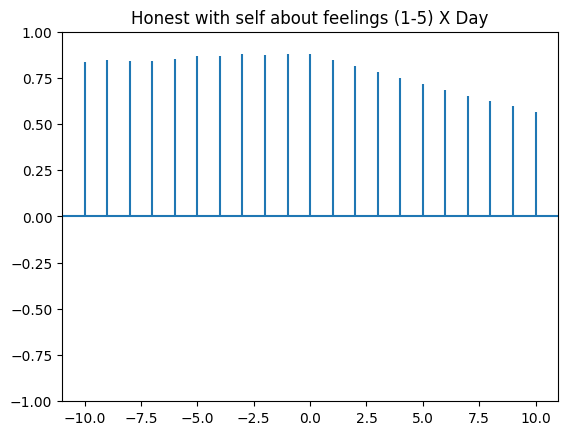

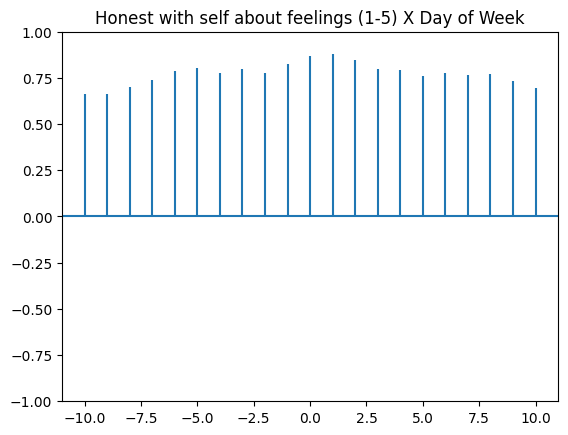

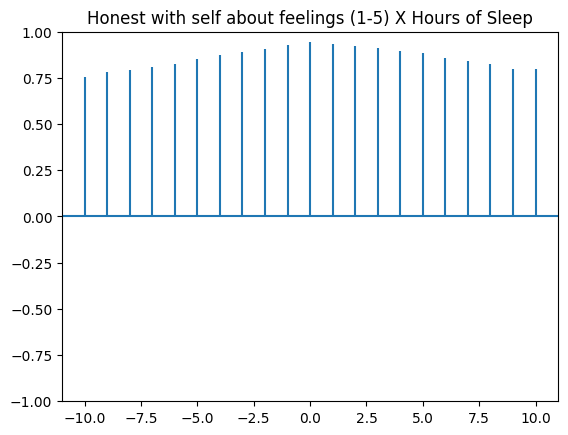

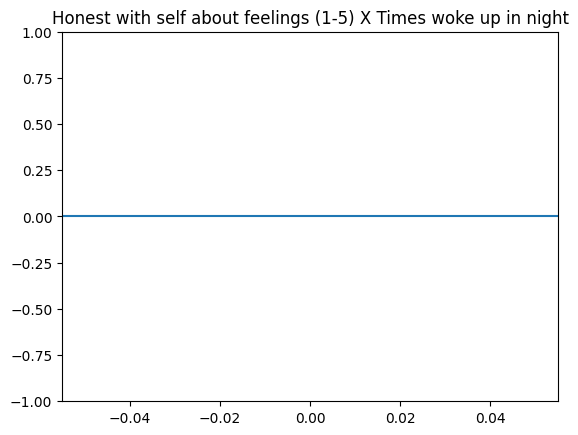

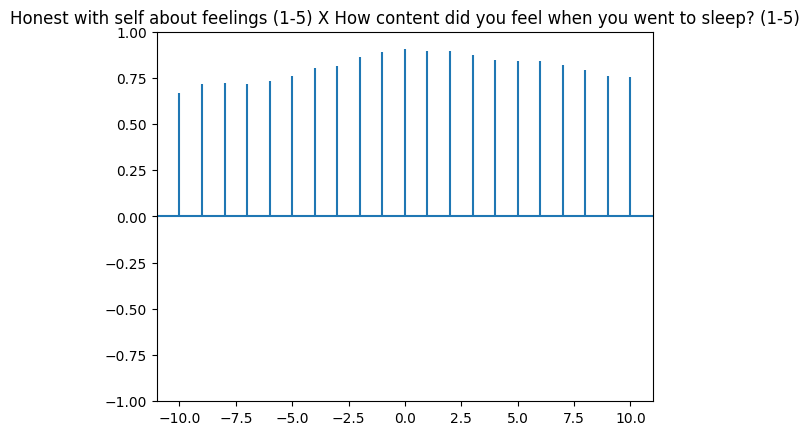

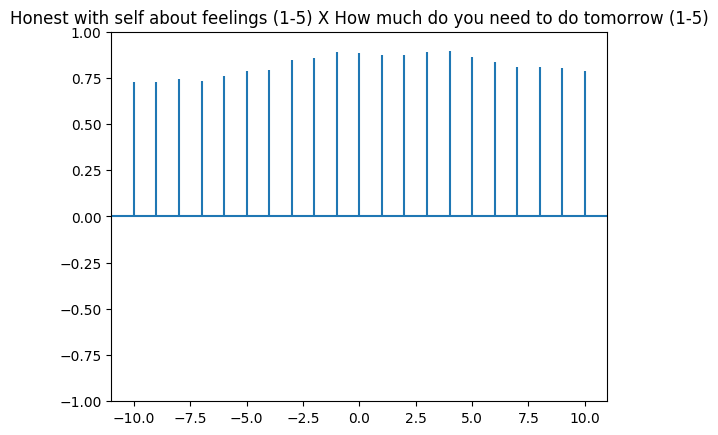

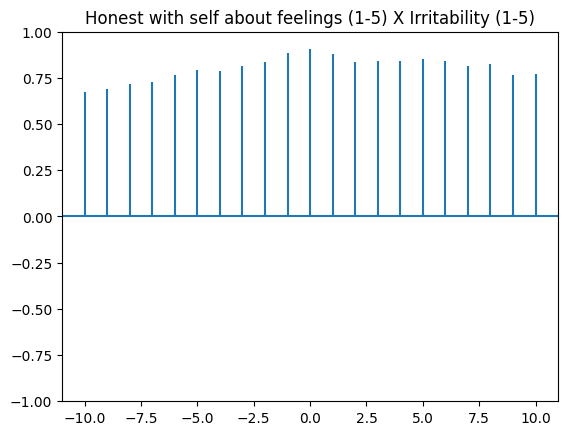

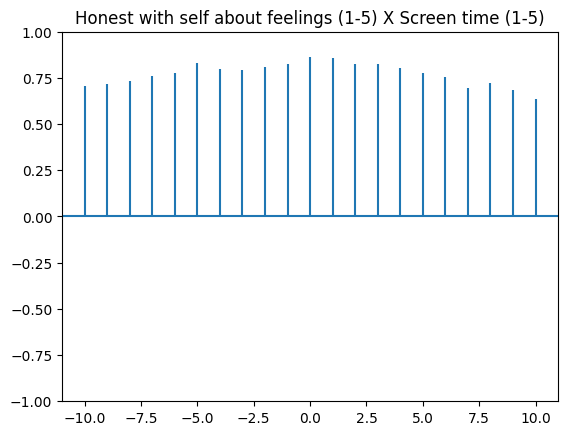

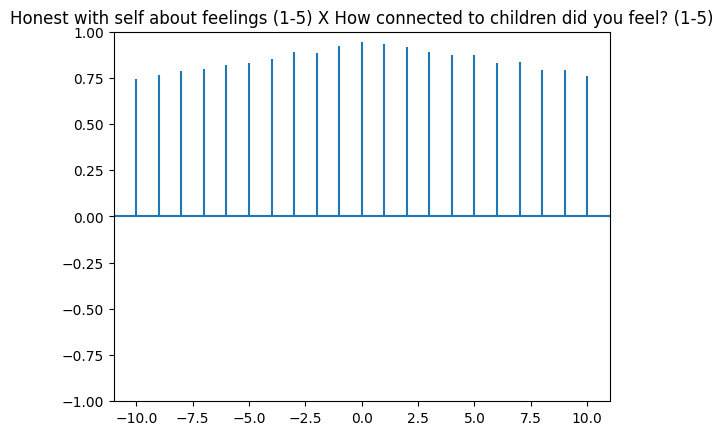

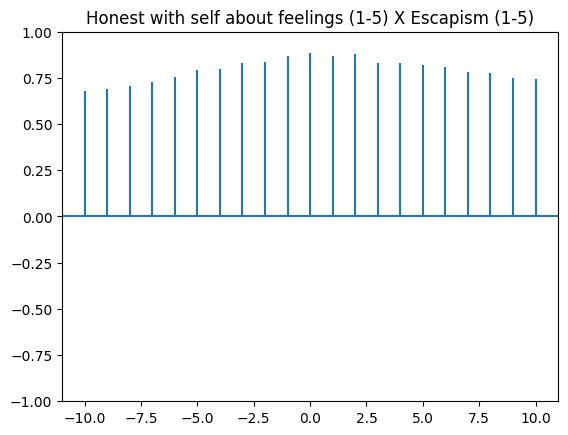

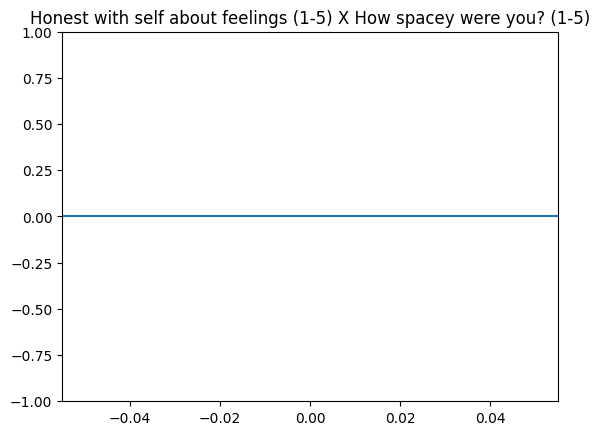

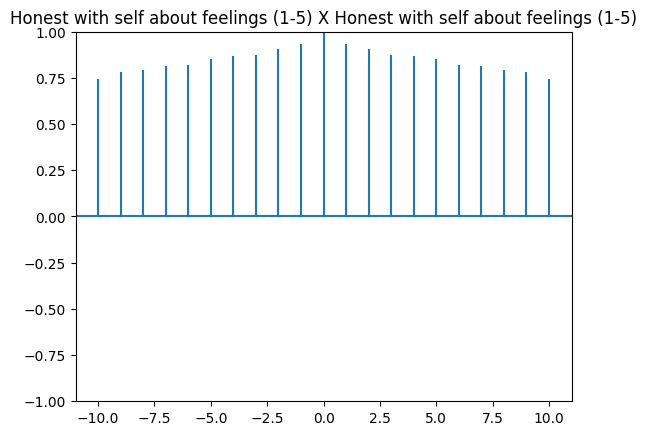

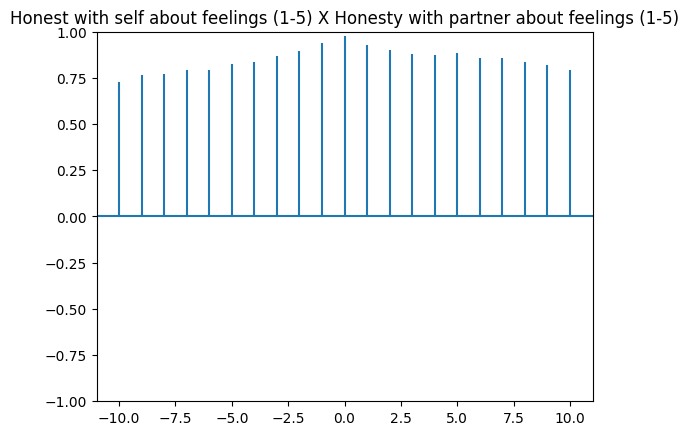

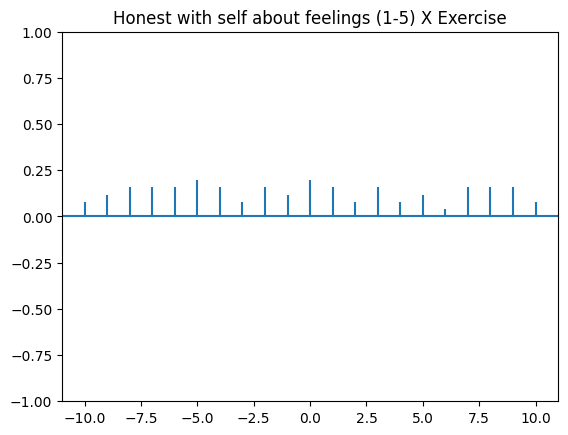

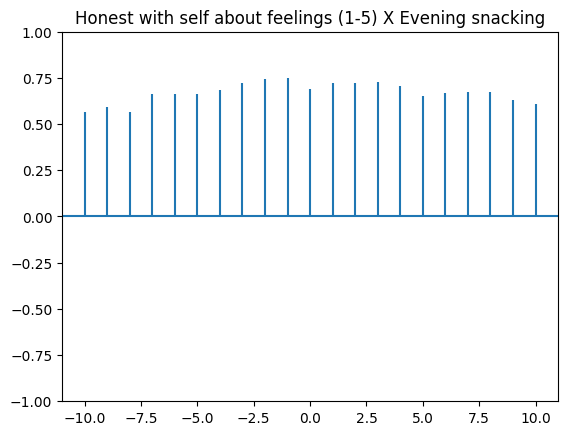

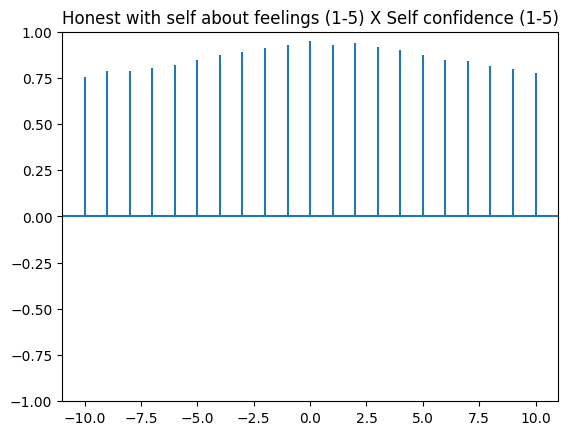

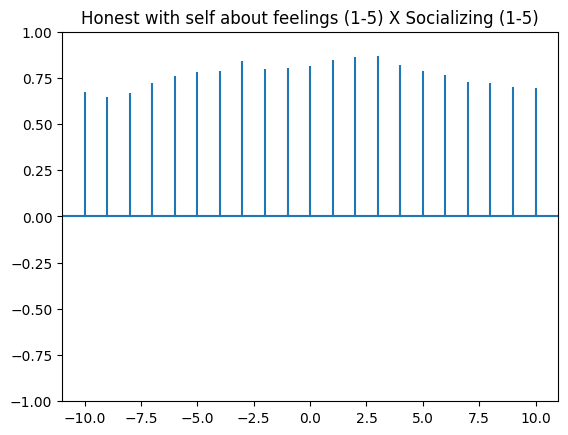

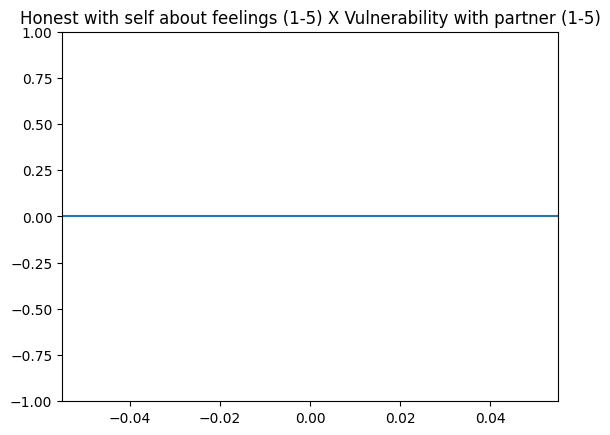

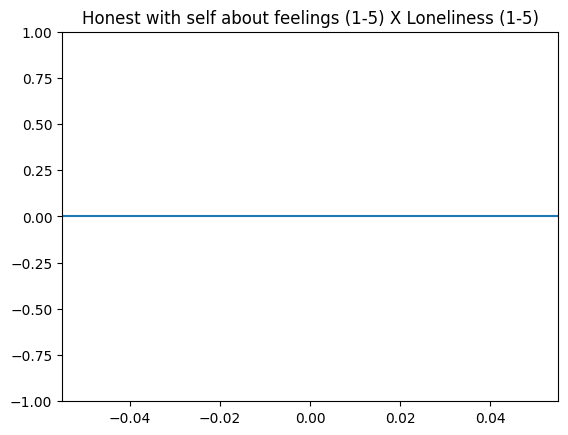

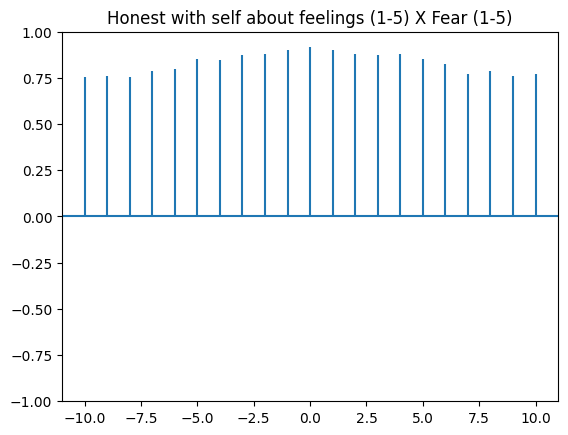

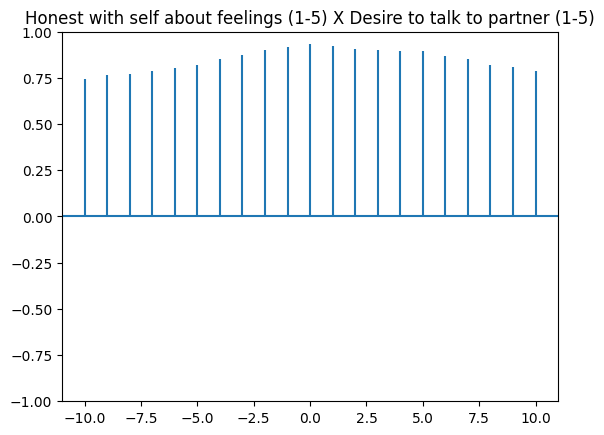

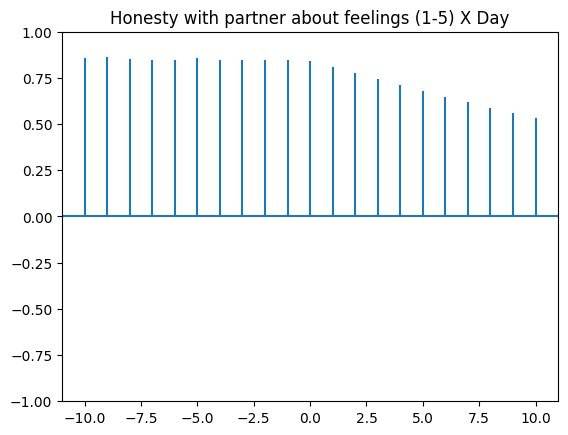

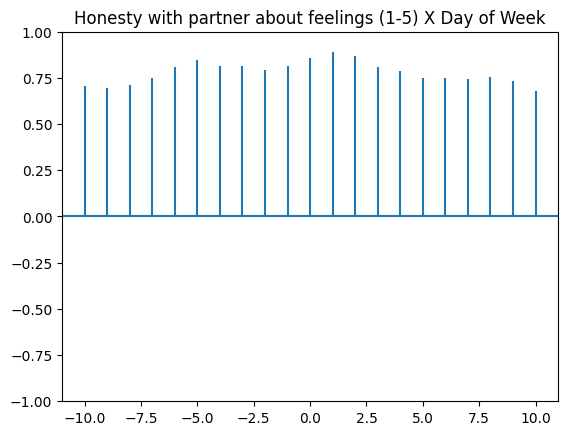

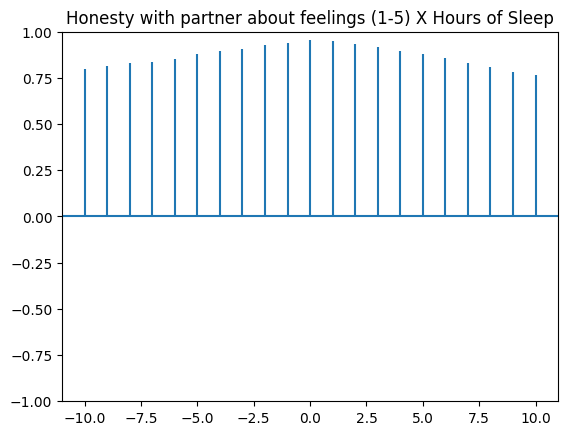

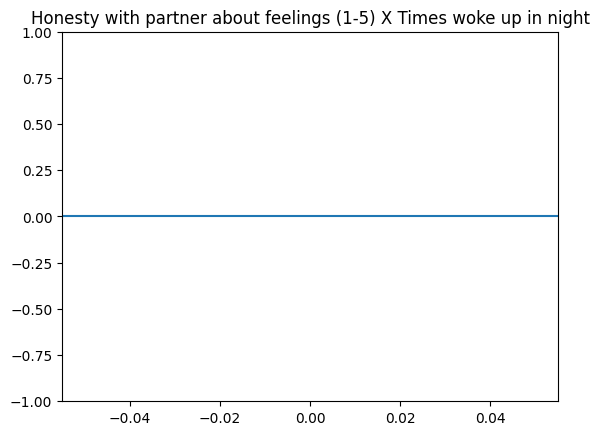

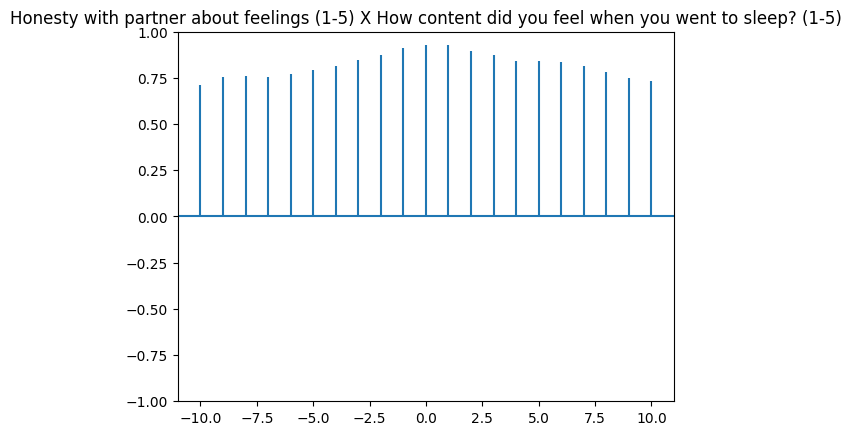

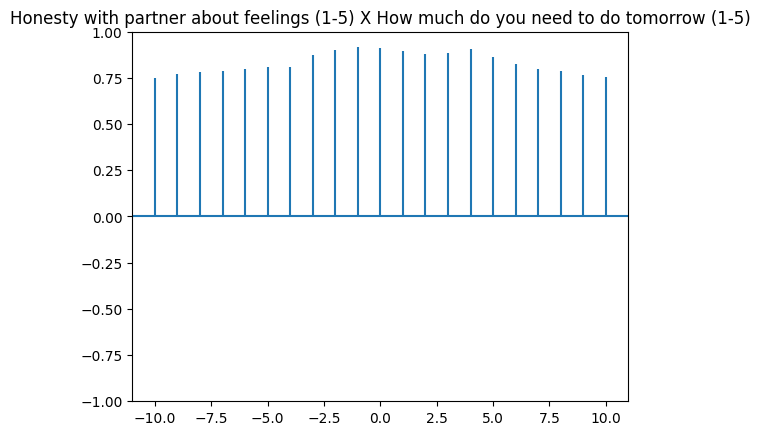

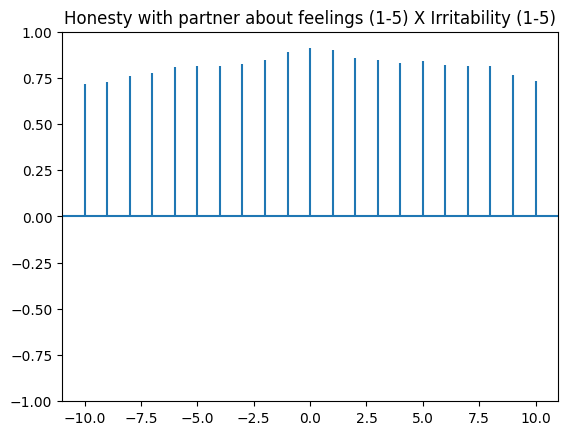

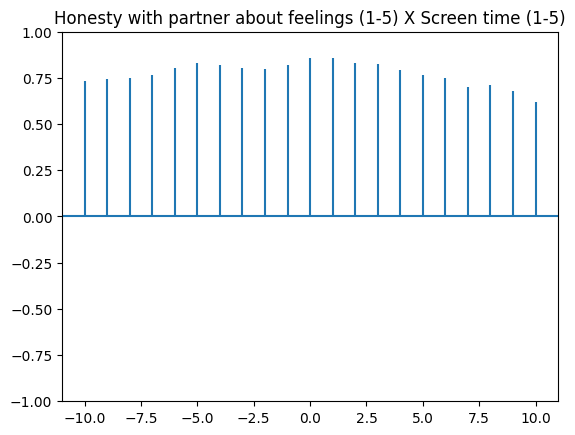

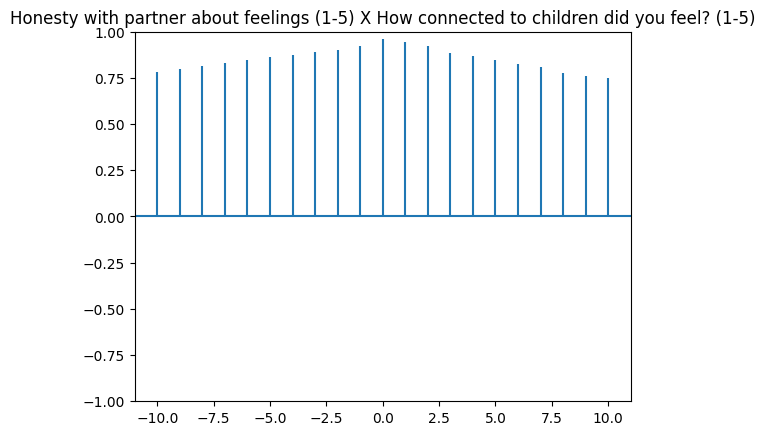

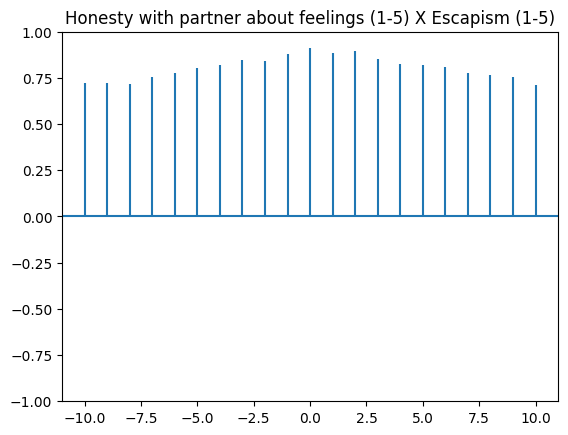

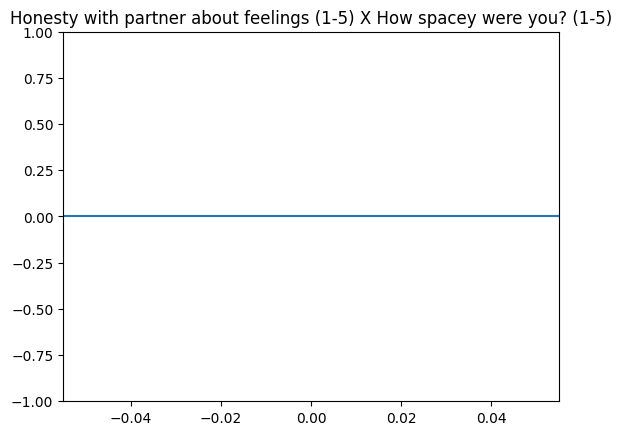

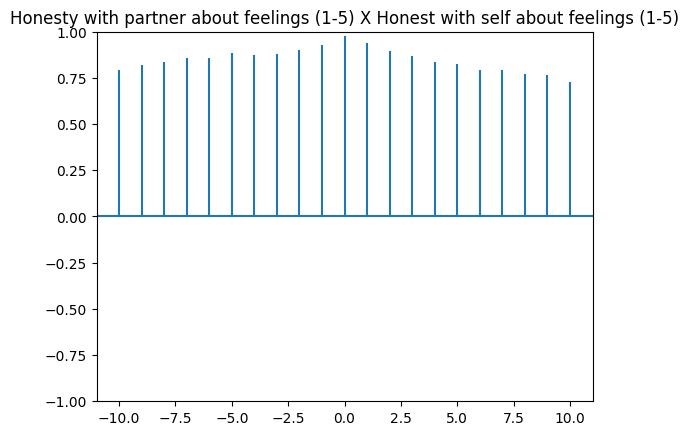

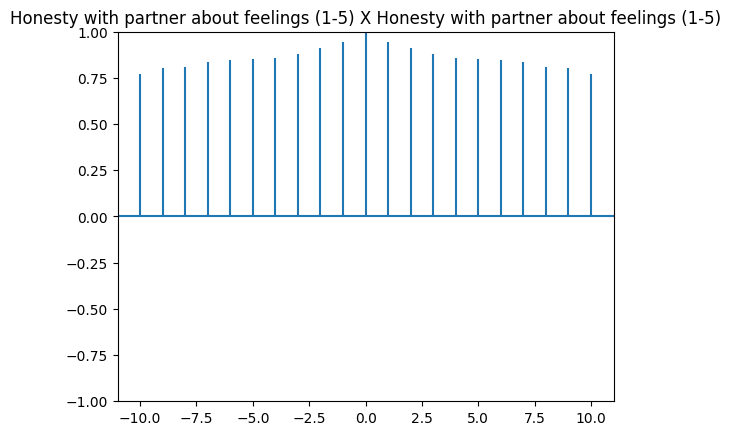

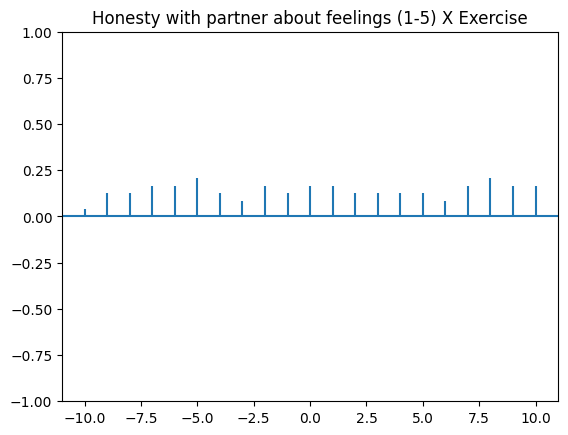

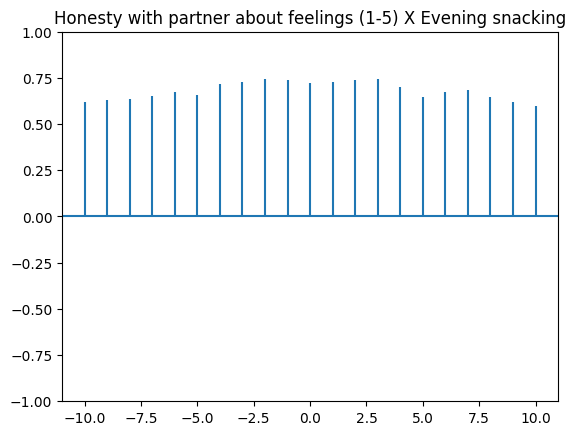

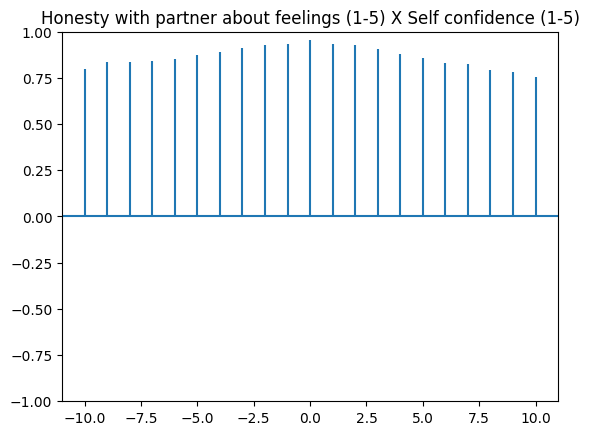

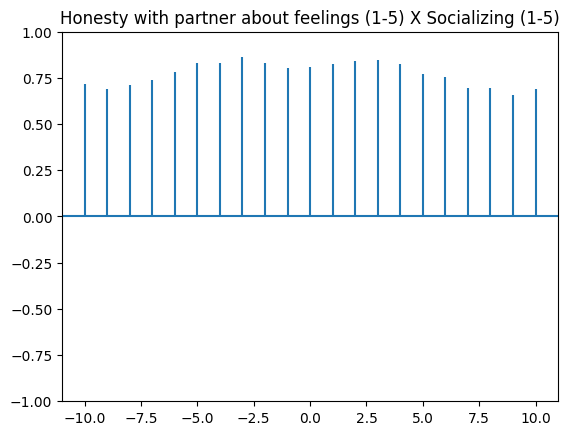

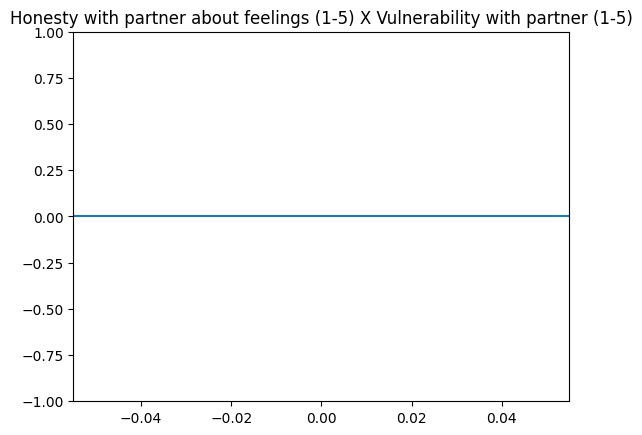

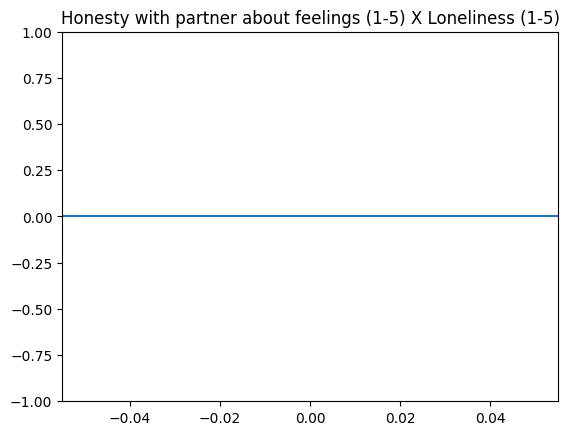

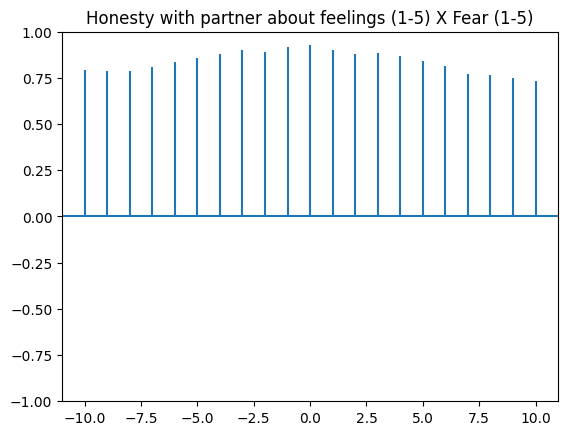

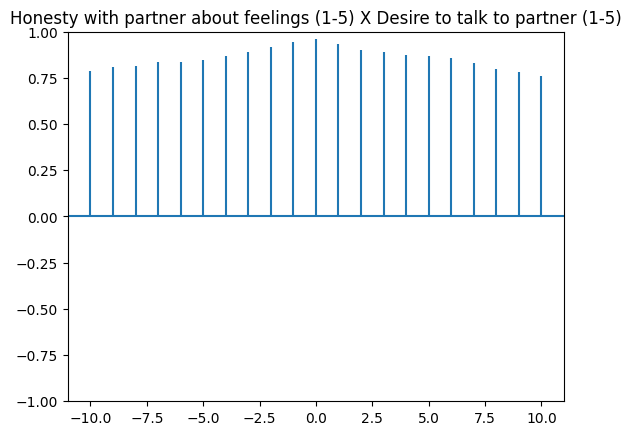

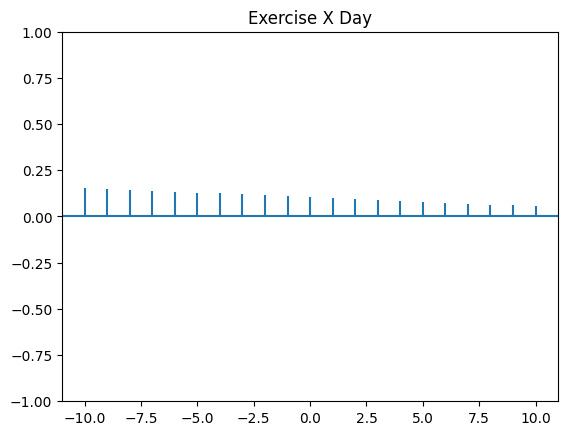

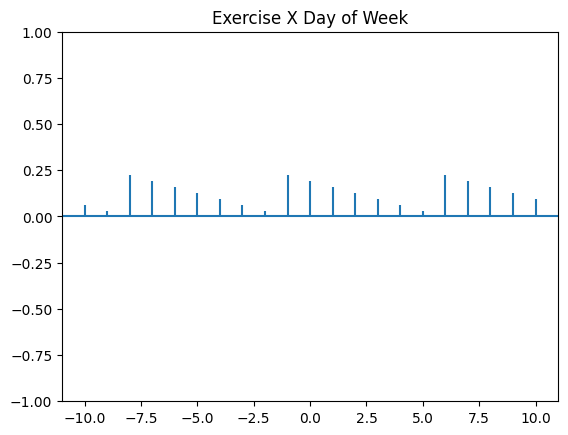

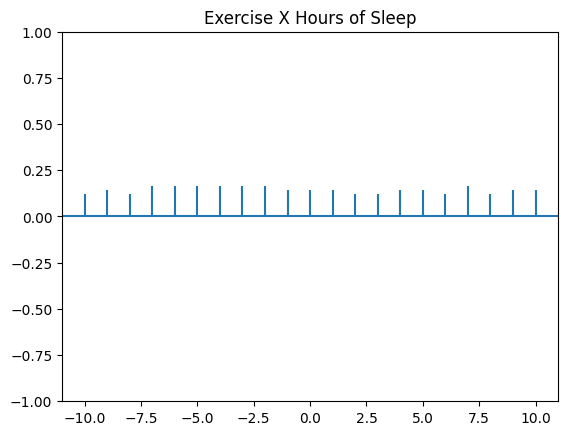

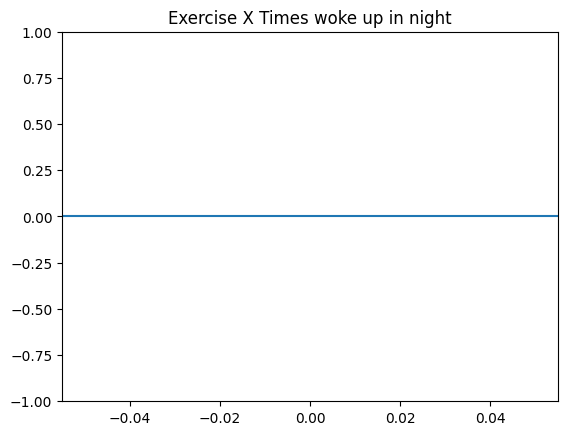

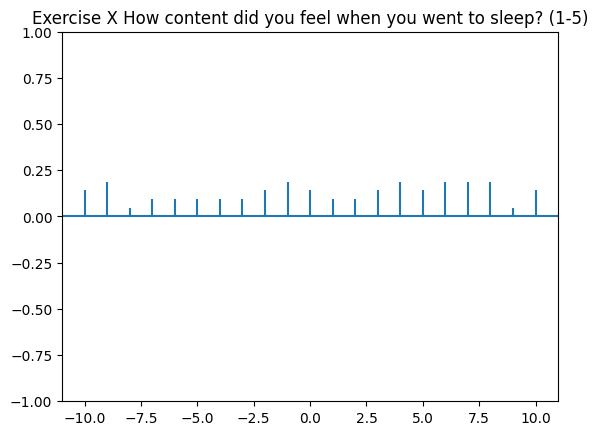

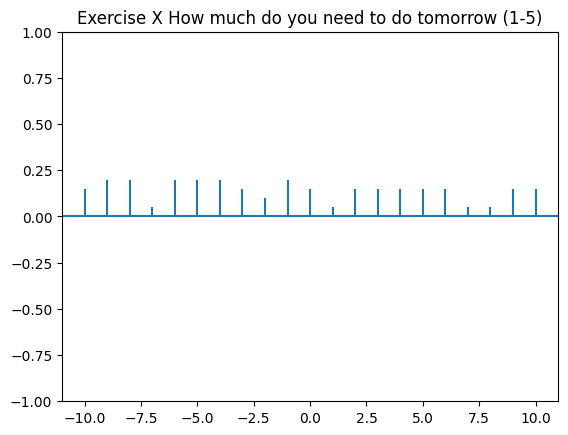

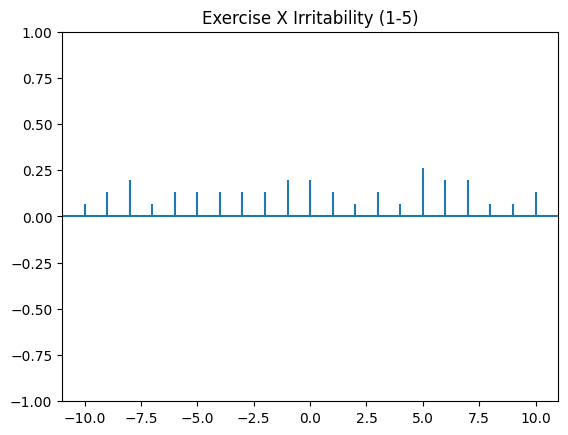

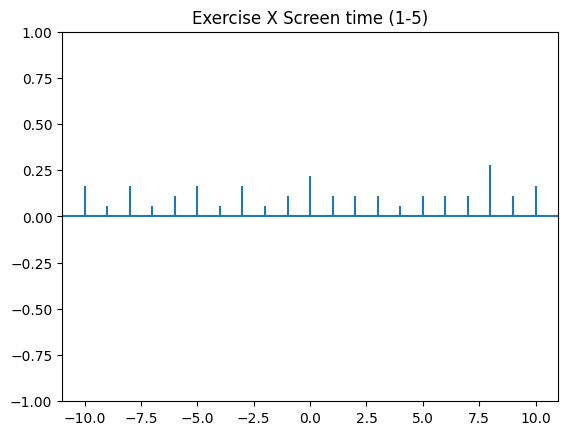

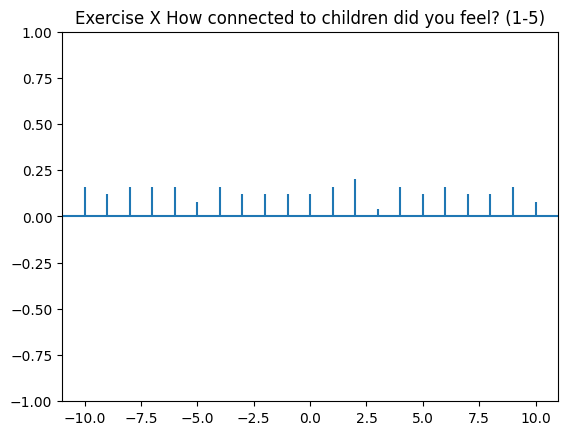

KeyboardInterrupt: 

In [63]:
n = len(df.columns)
for i in range(n):
    for j in range(n):
        x = df.iloc[:, i]
        y = df.iloc[:, j]
        plt.xcorr(x, y)
        plt.title(f"{df.columns[i]} X {df.columns[j]}")
        plt.ylim(-1, 1)
        plt.show()